<a href="https://colab.research.google.com/github/choi4490/AAA/blob/main/%EC%9E%91%EC%97%85%ED%98%953%EB%AA%A8%EC%9D%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구름체험(신규)-리지스틴 (독립T검정, F검정통계량, 로그) 20250606


제공된 데이터 (bcc.csv) 는 암 환자와 정상인의 리지스틴(염증유발인자) 수치에 대한 자료이며 , 두 집단의 **[로그]** 리지스틴 값에 차이가 있는지를 검정하려고 한다  
. 소문항별로 답을 구한 후 , 구한 답을 제시된 [ 제출 형식 ] 에 맞춰 답안 제출 페이지에 입력하시오 . ( 단 , 모델은 절편항을 포함한다 .)

- ① : 두 집단의[log 리지스틴] 값의 분산( var() )에 차이가 있는지를 알아보기 위해 F- 검정을 수행할 때 검정통계량(분산의 비율)의 값을 구하여라 . ( 단 , 분자의  자유도가 분모의 자유도보다 크도록 할 것.(1보다  큰 수치 나오도록 .)  분산이 크면.자유도도 크다
- ② : 두 집단의 로그 리지스틴 값에 대한 [합동 분산 추정량: 2개 분산의 가중평균을 의미함. 수량비중 고려해서.]을 구하여라. --------- (자유도1*분산1) + (자유도2*분산2)   / (자유도1+2) -------------   
  하지만, 우리는 표본의 분산만 아는 상태죠. 모분산을 모르니까, 표본분산을 이용해서 서로 독립적인 두 모집단들의 공통 분산의 불편추정량을 Sp^2로 나타낼 겁니다. 이 공통 분산의 불편추정량을 "합동 분산 추정량"이라고 합니다. 쉽게 말해서, 두 모집단으로부터 추출된 두 표본의 분산은 서로 다르지만, 모분산이 같다는 정보를 알았기 때문에, 두 표본의 분산을 퉁치는 하나의 분산을 생각하겠다는 겁니다. (즉, sa = sb = s와 같이 분산이 서로 동일하다고 추정합니다.) 그게 바로 "합동 분산 추정량"입니다
[출처] [통계학] 25. T-test (3) 두 모집단의 평균 차이에 대한 가설검정 (독립표본) -> 표본의 크기가 충분하지 않은 경우|작성자 kisoo



- ③ :  ② 번 문제에서 구한 합동 분산 추정량을 이용하여(?)   두 집단의 로그 리지스틴 값에 유의미한 차이가 있는지 독립표본 t- 검정을 수행하고 p- 값을 구하여라 .

In [ ]:
# F 검정 통계량을 구하는 방법은 어떤 종류의 F 검정을 수행하느냐에 따라 다릅니다. 일반적으로 F 검정은 두 분산을 비교하거나 여러 집단의 평균을 비교하는 분산 분석(ANOVA)에서 사용됩니다.
#. 두 독립 표본의 분산 비교를 위한 F 검정:
#이  경우 F 검정 통계량은 단순히 두 표본 분산의 비율입니다. 분자는 항상 분모보다 큰 분산을 가지도록 배열하는 것이 일반적입니다.
# 2. 일원 분산 분석(One-Way ANOVA)의 F 검정: scipy.stats.f_oneway(*samples) 함수를 사용하여 일원 분산 분석의 F 통계량과 p-값을 쉽게 계산할 수 있습니다

In [ ]:
# F-검정은 두 모집단의 분산이 동일한지 여부를 검정하는 통계적 방법입니다.
# F-검정은 두 집단의 분산 차이가 유의미한지 확인하고, t-검정과 함께 사용될 수 있습니다.
# F-검정은 주로 분산분석(ANOVA)에서 사용되며, 여러 집단의 평균 차이를 검정하는 데 활용됩니다.
# 리히터 규모, 데시벨, 별의 밝기 등급, pH 척도에서 로그값을 그 척도를 나타냅니다. 로그가 '비례적인 관계'를 '선형적인 관계'로 변환하기 때문입니다.
#그리고 밑을 10으로 사용하는 이유는 우리가 일반적으로 10진법을 사용하므로 에너지의 차이를 직관적으로 이해하고 비교할 수 있기 때문입니다.
# pH 값이 1 차이나면 수소 이온 농도가 10배 차이납니다. 즉, pH 6의 용액은 pH 7의 용액보다 10배 더 산성이고, pH 5의 용액은 pH 7의 용액보다 100배 더 산성입니다

In [ ]:
#최원우-20250615(일요일오전)
#두개집단비교 - 독립T검정 (샤피로검정(정규성),레빈검정(등분산성) 할 필요없다. 분산차이검정-F검정의 검정통계량인데. 아노마검정인데 마지막에는 독립T검정이라고?)
# 두개집단의 로그 리지스틴입니다. 로그를 씌우는 이유는?

F-검정은 두 집단의 분산이 같다는 귀무가설을 검정합니다 [2]. 만약 두 집단의 분산이 다르다면 F 통계량은 1에서 벗어나는 경향이 있습니다.

"분자의 자유도가 분모의 자유도보다 크도록 하라"는 요구사항은 특정 집단의 분산을 F 통계량의 분자에, 다른 집단의 분산을 분모에 놓으라는 의미입니다. F-검정에서는 일반적으로 더 큰 분산을 분자에 놓습니다. 이렇게 하면 F 통계량이 1보다 크게 계산될 가능성이 높아지고, F 분포표에서 유의미한 값을 찾기 쉬워집니다.

질문에서 언급된 독립표본 t-검정의 맥락에서는, 두 집단의 분산을 비교하기 위해 F-검정을 수행할 때 더 큰 분산을 가진 집단의 자유도를 F 통계량의 분자의 자유도로 사용하고, 더 작은 분산을 가진 집단의 자유도를 분모의 자유도로 사용하라는 지침으로 해석될 수 있습니다. 이렇게 해야 분자의 자유도가 분모의 자유도보다 크게 되는 경우가 많아지고, F 통계량을 올바르게 계산하고 해석할 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/choi4490/AAA/refs/heads/main/Resistin.csv")
#로그로 재편집
df['log_Resistin'] = np.log(df.Resistin)  # 로그칼럼 추가

df=df[ [ 'Classification', 'Resistin', 'log_Resistin' ]]
display( df.tail(5) )
조건_테스트= df.log_Resistin.between (0.9 , 1.19, inclusive="both")
조건_4444= df.log_Resistin <= 1.191419  # 1이 있는지 확인해보자.
정상인_조건    = df.Classification == 1
암환자_조건 = df.Classification == 2
암환자df =    df[암환자조건].log_Resistin  #** 조건걸고. 특정칼럼지정까지 해라. 이게 제일편리함. 특정해라.암환자의 수치를  특정해야지.
정상인df = df[정상인조건].log_Resistin


# 원래 DataFrame에 '평균수치' 새 컬럼을 추가하고, groupby 및 transform을 사용
# 이를 통해 각 'Classification' 그룹의 'Resistin' 평균을 계산하고
# 해당 그룹 내 모든 행에 그 평균을 할당합니다.
df ['평균수치'] =  df.groupby('Classification')  ['Resistin'].transform("mean" )  #이렇게 생겨난 시리즈를 추가함.
display(df.head())
# 새로 생성된 DataFrame에 '평균수치' 칼럼을 추가하고, transform("mean")을 사용하여 계산된 평균값을 해당 칼럼의 모든 행에 할당합니다


분산1=암환자df.var()  # 더 높다 (염증수치)
분산2= (정상인df.std())**2
print("\n 암환자/ 정상인 log_resistin 분산 값 : ", round(분산1, 3), " / ", round(분산2, 3))  # 분산이 더 크다 =  자유도가 크다 --> 분자로 가라.1이상 나오게
print(" 평균비교(암환자 : 정상인) : ",        정상인평균수치  , 암환자평균수치   )
print("\n F검정통계량(단순분산비율 : 암환자/정상인 수치) ", 분산1/분산2 )

from scipy import stats
print("\n 아노바분산분석 : ", stats.f_oneway( 암환자자료, 정상인자료) )
# scipy.stats.f_oneway 결과: 여러 그룹 (또는 두 그룹)의 평균이 같은지 다른지를 검정하는 데 사용됩니다.
#이는 분산 분석(ANOVA)의 핵심 결과이며, 계산 방식이 분산의 단순 비율과는 다릅니다.
#따라서 두 가지 F 검정 통계량이 다르게 나오는 것은 당연하며, 각각 다른 통계적 질문에 답하기 위한 것입니다.

#등분산성체크
stats.levene(암환자df, 정상인df)  # P값이 0.05 이상이므로. 기존 귀무가설로 간다(서로 등분산성 동일하다)

#2
# 합동분산 : 2개 분산의  가중평균임(수량비중반영한 것((자유도1 * 분산1) + (자유도2 * 분산2)) /  (자유도1+자유도2)
n1 = sum(정상인_조건)   # 참거짓 중 True의 갯수?  정상인 수
n2 = sum(암환자_조건)                                          #암환자 수
print( " 정상인 수: 암환자 수", n1, n2 )
result = (((n1-1) * 분산1) + ((n2-1) * 분산2)) / ((n1-1) + (n2-1))
print(round(result,3))


#3
from scipy import stats
result = stats.ttest_ind(df[정상인_조건] ['Resistin'], df[암환자_조건]['Resistin'], equal_var = True)
print(result)
print(round(result.pvalue,3))

,Classification,Resistin,log_Resistin
111,2,10.96,2.394252
112,2,7.32,1.990610
113,2,10.33,2.335052
114,2,3.27,1.184790
115,2,4.35,1.470176


,Classification,Resistin,log_Resistin,평균수치
0,1,7.99585,2.078923,11.614813
1,1,4.06405,1.402180,11.614813
2,1,9.27715,2.227554,11.614813
3,1,12.76600,2.546785,11.614813
4,1,10.57635,2.358620,11.614813



 암환자/ 정상인 log_resistin 분산 값 :  0.508  /  0.377
 평균비교(암환자 : 정상인) :  17.2537771875 11.61481346153846

 F검정통계량(단순분산비율 : 암환자/정상인 수치)  1.34795697690295

 아노바분산분석 :  F_onewayResult(statistic=np.float64(9.172465158846453), pvalue=np.float64(0.003039226943143336))
 정상인 수: 암환자 수 52 64
0.435
TtestResult(statistic=np.float64(-2.4922510118205365), pvalue=np.float64(0.014131367228310961), df=np.float64(114.0))
0.014


검정통계량을 어떻게 구해?

F 검정 통계량을 구하는 방법은 어떤 종류의 F 검정을 수행하느냐에 따라 다릅니다. 일반적으로 F 검정은 두 분산을 비교하거나 여러 집단의 평균을 비교하는 분산 분석(ANOVA)에서 사용됩니다.

1. 두 독립 표본의 분산 비교를 위한 F 검정:

이 경우 F 검정 통계량은 단순히 두 표본 분산의 비율입니다. 분자는 항상 분모보다 큰 분산을 가지도록 배열하는 것이 일반적입니다.

$$ F = \frac{s_1^2}{s_2^2} $$$$ F = \frac{s_1^2}{s_2^2} $$

여기서 $s_1^2$$s_1^2$은 첫 번째 표본의 분산이고, $s_2^2$$s_2^2$은 두 번째 표본의 분산입니다. 더 큰 분산을 분자에 놓습니다.

Python에서는 scipy.stats.f.sf(F값, df1, df2)를 사용하여 F 통계량에 대한 p-값을 계산할 수 있습니다. 여기서 df1은 분자의 자유도 (n1 - 1), df2는 분모의 자유도 (n2 - 1)입니다.

2. 일원 분산 분석(One-Way ANOVA)의 F 검정:

일원 분산 분석에서 F 검정은 여러 그룹의 평균이 모두 동일한지 여부를 테스트합니다. F 통계량은 그룹 간 변동과 그룹 내 변동의 비율입니다 [1].

$$ F = \frac{\text{그룹 간 변동 (MST)}}{\text{그룹 내 변동 (MSE)}} $$$$ F = \frac{\text{그룹 간 변동 (MST)}}{\text{그룹 내 변동 (MSE)}} $$

그룹 간 변동 (MST: Mean Square for Treatment): 각 그룹 평균과 전체 평균 간의 차이로 인한 변동입니다. SST / df1으로 계산됩니다.
그룹 내 변동 (MSE: Mean Square for Error): 각 그룹 내에서 개별 데이터 포인트와 해당 그룹 평균 간의 차이로 인한 변동입니다. SSE / df2로 계산됩니다.
Python에서는 scipy.stats.f_oneway(*samples) 함수를 사용하여 일원 분산 분석의 F 통계량과 p-값을 쉽게 계산할 수 있습니다. 여기서 *samples는 각 그룹에 해당하는 데이터 배열 또는 리스트입니다.

귀하의 코드에서 F 통계량을 구하는 방법:

귀하의 코드에서는 암환자와 정상인의 log_Resistin 값의 분산을 비교하고 있으며, 이는 두 독립 표본의 분산 비교에 해당합니다. 코드는 이미 다음과 같이 두 집단의 분산을 계산하고 있습니다.

분산1 = 암환자자료.var()
분산2 = (정상인자료.std())**2
코드를 사용할 때는 주의가 필요합니다.
그리고 문제에서 "분자의 자유도가 분모의 자유도보다 크도록" 하라고 했으므로, 두 분산 중 더 큰 값을 분자로 사용하여 F 통계량을 계산할 수 있습니다.

if 분산1 > 분산2:
    f_statistic = 분산1 / 분산2
    df1 = len(암환자자료) - 1
    df2 = len(정상인자료) - 1
else:
    f_statistic = 분산2 / 분산1
    df1 = len(정상인자료) - 1
    df2 = len(암환자자료) - 1

print("F 검정 통계량:", round(f_statistic, 3))
코드를 사용할 때는 주의가 필요합니다.
이렇게 하면 두 집단의 분산 중 더 큰 값을 분자로 하는 F 검정 통계량을 계산할 수 있습니다.

In [ ]:
#1
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/choi4490/AAA/refs/heads/main/Resistin.csv")


import numpy as np  # 넘파이의 로그를 활용하기 위해서임.
df['Resistin'] = np.log(df['Resistin'] )  #리지스틴수치를 로그로 변환

#정규성 및 등분산성 체크할 필요없이 F검정으로 가라고 함.(이건 분산분석인데...)
cond1 = df['Classification'] == 1     #정상인
cond2 = df['Classification'] == 2    # 암환자수치

var1 = df[cond1]['Resistin'].var()   # 분산을 의미합니다.   std() 는 표준편차입니다.
var2 = df[cond2]['Resistin'].var()

result = var2 / var1
print(round(result,3))

#두 집단의 로그 리지스틴 값에 대한 합동 분산 추정량을 구하여라.
#③ : ② 번 문제에서 구한 합동 분산 추정량을 이용하여(?) 두 집단의 로그 리지스틴 값에 유의미한 차이가 있는지 독립표본 t- 검정을 수행하고 p- 값을 구하여라 .

#2
# ((자유도1 * 분산1) + (자유도2 * 분산2)) /  (자유도1+자유도2)
n1 = sum(cond1)   # 참거짓 중 True의 갯수?  정상인 수
n2 = sum(cond2)                                          암환자 수

result = (((n1-1) * var1) + ((n2-1) * var2)) / ((n1-1) + (n2-1))
print(round(result,3))


#3
from scipy import stats
result = stats.ttest_ind(df[cond1]['Resistin'], df[cond2]['Resistin'], equal_var = True)
print(round(result.pvalue,3))

1.348
0.449
0.003


만점이 아닌 일부만 맞추기 위해서는 scipy, statsmodels을 활용해서 검정통계량, p-value 뽑을 수 있는 것만 준비해 가시면 되겠습니다. 선형회귀, 로지스틱은 반드시 준비하시고, 여기에 더해 T-test(독립, 대응표본), ANOVA(일원,이원), 카이제곱(적합도, 독립성) 검정까지만 준비하면 가장 효율적이라 생각합니다. 나머지 통계학 부분과 비모수에서 출제되면 바로 버리시구요. 특히 공식외워 수동으로 코드 짜야 하는 문제는 과감히 제거하시기 바랍니다. 안 중요한게 아니라 시간 투입대비 효과가 너무너무 떨어집니다. 그럴 시간에 pandas 전처리 연습과 유형2 확실히 하는게 더 중요하다고 생각합니다.

## 구름(체험) 작업형3 : 타이타닉 DB 분석(카이제곱, 로지스틱회귀.회귀계수), 오즈비) 2025.06.15(일)
[타이타닉호의 침몰 사건에서 승객의 생존 여부에 대한 정보]

■ 1. 독립성 검정: 성별(Gender)과 생존 여부(Survived) 간의 독립성을 검토하는데 카이제곱 통계량은?  (독립.의존.영향 chi2_contingency(df교차표)  )   260.717

■ 2.로지스틱회귀모형: 두 번째 질문에서는 성별, 형제자매/배우자 수(SibSp), 부모/자녀 수(Parch), 운임(Fare)이라는 독립 변수를 사용하여 로지스틱 회귀모형을 수행시 Parch 변수의 계수값은? (생존 확률에 대한 해당 변수의 영향도)    (정답: -0.2007 )

■ 3. 오즈비(Odds Ratio): 두 번째 문제에서 얻은 로지스틱 회귀모형 결과를 기반으로 하며, SibSp 변수가 한 단위 증가할 때 생존하는 오즈비 값을 구하십시오.
       (SibSp : 1.425 , Parch : 0.82)
-  -----------------------------------------------------------------------------------------------------------------------------------
- *** 오즈비 0.8의 의미 : 오즈비 0.8은 특정 요인이 사건 발생 가능성을 약 20% 감소시키는 경향이 있다
- 오즈비(Odds Ratio)는 정의상 음수 값을 가질 수 없습니다. 오즈비는 두 오즈(odds)의 비율이며, 오즈는 확률의 비율로 항상 0보다 크거나 같습니다. 따라서 오즈비는 항상 0보다 크거나 같은 값을 가집니다 (OR ≥ 0).
-  SibSp가 1명 증가할수록 생존할 오즈가 약 1.425배 높아진다는 뜻입니다. 즉, 형제자매나 배우자가 1명 더 있는 승객은 그렇지 않은 승객에 비해 생존할 오즈가 약 42.5% 증가한다고 해석할 수 있습니다.


■ **회귀계수(coefficient)의 의미 **:    이는 다른 모든 독립 변수들이 일정할 때, 해당 독립 변수(Xᵢ)가 1단위 증가하면 종속 변수가 특정 범주(예: 생존)에 속할 로그 오즈가 0.2만큼 감소한다는 의미입니다.

로그 오즈의 변화는 오즈비(Odds Ratio)와 관련이 있습니다. 회귀 계수(β)와 해당하는 독립 변수의 오즈비(OR) 사이의 관계는 OR = exp(β) 입니다.

따라서 회귀 계수가 -0.2인 독립 변수의 오즈비는 다음과 같습니다. OR = exp(-0.2)

exp(-0.2)는 대략 0.8187 입니다.



In [ ]:
#최원우 20250615
#1. 카이제곱독립성검증(카이제곱 통계량)  성별과 생존여부
#2. 로짓모델이고 독립변수의 회귀계수값 구하기
#3. 오즈비값 구하기

import pandas as pd
import seaborn as sns
# 타이타닉 데이터 로드
df = sns.load_dataset('titanic')
#display( df.isnull().sum() )  #결측치확인해줍니다.

df=df.drop( [ 'pclass', 'class', 'who','deck', 'alone' ] , axis=1)  # 리스트 형태로 만들어줘야 합니다.   불필요한 칼럼 제거하고 시작해라.
display(df.head())

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alive
0,0,male,22.0,1,0,7.2500,S,True,Southampton,no
1,1,female,38.0,1,0,71.2833,C,False,Cherbourg,yes
2,1,female,26.0,0,0,7.9250,S,False,Southampton,yes
3,1,female,35.0,1,0,53.1000,S,False,Southampton,yes
4,0,male,35.0,0,0,8.0500,S,True,Southampton,no


In [ ]:
#카이제곱검정.독립성(연관여부 )
df교차표 = pd.crosstab( df.sex, df.survived )
from scipy import stats
결과=stats.chi2_contingency(df교차표)
print(결과)    # 정답 : 카이제곱통계량은 260.7 입니다.

#2. 로짓모델이고 독립변수의 회귀계수값 구하기
from statsmodels.formula.api import ols,logit    # 인코딩이 필요없다.
formula  = "survived ~ sex + sibsp +parch + fare "
로짓모델 = logit(formula, data=df).fit()
print( 로짓모델.summary() )
#생존예측값 = 로짓모델.predict(새로운값 혹은 현재 데이터df) # 현재 df에 칼럼추가할 수도 있다.
df['생존예측값'] = 로짓모델.predict(df)
display( df)
df2=df [ [ 'survived' ,  '생존예측값', 'sex' , 'age' , 'parch', 'sibsp', 'fare' ]   ]
display ( df2.head()  )
#정답  Parch의  회귀계수(영향도)는 ? -0.2 이네...  1기준이니까...
#영향도 분석은 오즈비를 써야 한다고 합니다.
import numpy as np
오즈비= np.exp(-0.2007)
print (  "오즈비 : ", 오즈비)  # 오즈비 0.8이다.  그럼 약 20%의 감소역할을  한다고 보면 될 것임.
SibSp_오즈비= np.exp(-0.3539)   # 오즈비는 0.7이 나옴. 그럼 약 30%의 감소역할을 한다는 것임.
print (  "\n SibSp_오즈비 : ", SibSp_오즈비)

Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))
Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                  0.2761
Time:                        12:06:04   Log-Likelihood:                -429.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.192e-69
                  coef    std err          z      P>|z|      [

,survived,sex,age,sibsp,parch,fare,embarked,adult_male,embark_town,alive,생존예측값
0,0,male,22.0,1,0,7.2500,S,True,Southampton,no,0.125318
1,1,female,38.0,1,0,71.2833,C,False,Cherbourg,yes,0.837477
2,1,female,26.0,0,0,7.9250,S,False,Southampton,yes,0.743267
3,1,female,35.0,1,0,53.1000,S,False,Southampton,yes,0.797791
4,0,male,35.0,0,0,8.0500,S,True,Southampton,no,0.171169
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,True,Southampton,no,0.181730
887,1,female,19.0,0,0,30.0000,S,False,Southampton,yes,0.800145
888,0,female,NaN,1,2,23.4500,S,False,Southampton,no,0.630805
889,1,male,26.0,0,0,30.0000,C,True,Cherbourg,yes,0.221833


,survived,생존예측값,sex,age,parch,sibsp,fare
0,0,0.125318,male,22.0,0,1,7.2500
1,1,0.837477,female,38.0,0,1,71.2833
2,1,0.743267,female,26.0,0,0,7.9250
3,1,0.797791,female,35.0,0,1,53.1000
4,0,0.171169,male,35.0,0,0,8.0500


오즈비 :  0.8181578420930659

 SibSp_오즈비 :  0.7019451583616214


In [ ]:
#2. 로짓모델이고 독립변수의 회귀계수값 구하기
from statsmodels.formula.api import logit
model = logit('survived ~ sex +sibsp +parch + fare'     , data=df).fit()
print( model.summary() )

Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.2761
Time:                        10:26:27   Log-Likelihood:                -429.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.192e-69
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9466      0.169      5.590      0.000       0.615       1.279
sex[T.male]    -2.6422    

In [ ]:
#문제3 : 오즈비 구성  (sibsp)
import numpy as np
오즈비= np.exp(-0.3539)
오즈비
# 오즈비가 0.8 정도라는 것은 독립변수가 증가시 종속변수(생존)가 약 20% 감소한다는 의미

np.float64(0.7019451583616214)

In [ ]:
#문제3 : 오즈비 구성  (Parch)
import numpy as np
오즈비= np.exp(-0.2)
오즈비

np.float64(0.8187307530779818)

@피어슨상관계수를 2개 칼럼별로 비교도 할 수 있다.
result = train['디자인'].corr(train['pred_design'])

@스피어만_상관계수 = df['칼럼1'].corr(df['칼럼2'], method='spearman')

# 9회기출 (5문제) OLS회귀 + 로짓분류

## 9회기출-문제1. 다중 선형 회귀 (피어슨상관계수, RMSE)
주어진 데이터에서 id를 기준으로 다음과 같이 데이터를 분할하여 아래 소문제를 해결한다.
- train 데이터: 1 ≤ id ≤ 140.......→ iloc(1:141)  X  loc를 이용해서 행번로
- test 데이터: id > 140..............→ iloc(141:  )  X  

### 문제1-1
■ 문제 1-1
train 데이터에서 c1, c2, c3, c4, c5를 독립변수로, design을 종속변수로 하는 OLS 다중회귀모형을 적합한 후, 절편을 제외한 독립변수 중 p-value가 0.05보다 작은 변수(의미있는 변수)의 개수를 구하시오.
(정답 : C1,2,4 가 의미있는 변수입니다. P값 0.05 미만)   


■ 문제1-2
[피어슨상관계수] 문제 1-1에서 적합한 회귀모형의 결과를 바탕으로, p-value가 0.05 이하인 유의한 독립변수만을 선택하여 새로운 다중 회귀모형을 적합한 후, train 데이터에서 design의 예측값을 산출하고 예측값과 실제 design 값 사이의 피어슨 상관계수와 RMSE를 구해라 (왜 예측값과 실제값사이의 상관계수를 구하는거지?)

■문제1-3
문제 1-2에서 적합한 회귀모형을 이용하여 test 데이터에서 design의 예측값을 산출한 후, 예측값과 실제 design 값 사이의 피어슨상관계수와 RMSE (Root Mean Squared Error)를 구하시오.

In [ ]:
# 최원우연습-250606
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/9_3/design.csv")
df.head()
train = df.loc[0:139, : ]  # 행번호가 아닌, ID를 정확히 체크할 것.
test = df.loc[140:,   :   ]      # loc를 이용해서 행번호로 정확히 id확인하는 것이 낮ㅅ다
display( train.head(3)  )
display( train.tail(3)  )
display( test.head(3)  )

,id,design,c1,c2,c3,c4,c5
0,1,58.962471,0.374540,0.642032,0.103124,0.168935,0.707239
1,2,42.006534,0.950714,0.084140,0.902553,0.278590,0.152539
2,3,55.831980,0.731994,0.161629,0.505252,0.177010,0.576288


,id,design,c1,c2,c3,c4,c5
137,138,63.945956,0.703019,0.703658,0.247348,0.816599,0.914299
138,139,54.083051,0.363630,0.474174,0.450544,0.439135,0.117751
139,140,55.031334,0.971782,0.097834,0.129159,0.376944,0.576516


,id,design,c1,c2,c3,c4,c5
140,141,66.574168,0.962447,0.491616,0.954051,0.462680,0.274055
141,142,48.521635,0.251782,0.473472,0.606175,0.301378,0.554178
142,143,57.754669,0.497249,0.173202,0.228643,0.747609,0.651420


In [ ]:
# 최원우연습-250606
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/9_3/design.csv")
df.head()

train = df.iloc[1:141, : ]
test = df.iloc[141:, : ]
display( train.tail(3)  )
display( test.head(3)  )

#문제1.  OLS학습모델 생성 (전체기준) ------------------------
from statsmodels.formula.api import ols
formula = "design ~ c1 + c2 + c3 + c4 + c5"
OLS학습모델 = ols(formula, data=train).fit()
print(OLS학습모델.summary()  )

#문제2.  OLS모델2 생성 및 예측값 확보 ---------------------
from statsmodels.formula.api import ols
formula = "design ~ c1 + c2 + c4 "
OLS학습모델2 = ols(formula, data=train).fit()
print(OLS학습모델2.summary()  )
train['디자인예측값_train'] = OLS학습모델2.predict(train) # Train 칼럼인 df에 design 칼럼이 있지만 상관없다. (함수로는 100% 동일할 수 없다)
test['디자인예측값_test'] = OLS학습모델2.predict(test)
display(train.tail())
display(test.head())
print(OLS학습모델.pvalues.sort_values)


,id,design,c1,c2,c3,c4,c5
138,139,54.083051,0.363630,0.474174,0.450544,0.439135,0.117751
139,140,55.031334,0.971782,0.097834,0.129159,0.376944,0.576516
140,141,66.574168,0.962447,0.491616,0.954051,0.462680,0.274055


,id,design,c1,c2,c3,c4,c5
141,142,48.521635,0.251782,0.473472,0.606175,0.301378,0.554178
142,143,57.754669,0.497249,0.173202,0.228643,0.747609,0.651420
143,144,52.072094,0.300878,0.433852,0.671701,0.502720,0.829742


                            OLS Regression Results                            
Dep. Variable:                 design   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     9.554
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           8.16e-08
Time:                        07:34:55   Log-Likelihood:                -469.35
No. Observations:                 140   AIC:                             950.7
Df Residuals:                     134   BIC:                             968.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.8717      2.306     22.931      0.0

<ipython-input-16-1871389889>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['디자인예측값_train'] = OLS학습모델2.predict(train) # Train 칼럼인 df에 design 칼럼이 있지만 상관없다. (함수로는 100% 동일할 수 없다)
<ipython-input-16-1871389889>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['디자인예측값_test'] = OLS학습모델2.predict(test)


,id,design,c1,c2,c3,c4,c5,디자인예측값_train
136,137,66.020866,0.518791,0.855461,0.849647,0.392445,0.018391,63.236429
137,138,63.945956,0.703019,0.703658,0.247348,0.816599,0.914299,63.335089
138,139,54.083051,0.363630,0.474174,0.450544,0.439135,0.117751,59.962035
139,140,55.031334,0.971782,0.097834,0.129159,0.376944,0.576516,52.605835
140,141,66.574168,0.962447,0.491616,0.954051,0.462680,0.274055,57.588104


,id,design,c1,c2,c3,c4,c5,디자인예측값_test
141,142,48.521635,0.251782,0.473472,0.606175,0.301378,0.554178,59.606135
142,143,57.754669,0.497249,0.173202,0.228643,0.747609,0.651420,57.902345
143,144,52.072094,0.300878,0.433852,0.671701,0.502720,0.829742,60.189992
144,145,65.085687,0.284840,0.398505,0.618128,0.232213,0.206421,58.187724
145,146,49.939884,0.036887,0.615850,0.358163,0.899575,0.010996,65.887928


<bound method Series.sort_values of Intercept    3.168729e-48
c1           2.170181e-02
c2           1.556406e-07
c3           1.331166e-01
c4           9.308450e-03
c5           4.376234e-01
dtype: float64>


In [ ]:
# 각각의 상관계수 구하기 train 및 test
#시리즈일때만, 칼럼별 상관계수 비교 가능하고, DataFrame 일 때는 전체 테이블 대상이라서 불가능하다.
display( train.corr().design)
print( test.corr().design)
print( " # ----------- 개별 시리즈로 1:1 비교 진행할 때  ------------------ #  ")
print ( train.design.corr(train.디자인예측값_train)  )
print ( test.design.corr(test.디자인예측값_test)  )
# RMSE (실제값, 예측값) 구하기
from sklearn.metrics import root_mean_squared_error
RMSE_train = root_mean_squared_error(train.design, train.디자인예측값_train)
RMSE_test = root_mean_squared_error(test.design, test.디자인예측값_test)
print(" ---RMSE-( TRAIN  VS TEST-----------------")
print(RMSE_train, RMSE_test)

,design
id,0.148362
design,1.000000
c1,-0.172597
c2,0.413550
c3,0.102931
c4,0.227805
c5,-0.091283
디자인예측값_train,0.495438


id             0.062382
design         1.000000
c1            -0.155641
c2             0.374727
c3            -0.009651
c4             0.182489
c5            -0.064180
디자인예측값_test    0.406623
Name: design, dtype: float64
 # ----------- 개별 시리즈로 1:1 비교 진행할 때  ------------------ #  
0.49543808090288427
0.4066228079025856
 ---RMSE-( TRAIN  VS TEST-----------------
6.994818283117033 8.490083719144499


In [ ]:
#시험정답  ---------------------------------------------------------
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/9_3/design.csv")
df.head()
df.rename( columns = { 'design' : '디자인' }, inplace=True )
# 열 이름을 딕셔너리를 사용하여 변경합니다.
# 딕셔너리의 키는 현재 열 이름이고, 값은 새로운 열 이름입니다.
# df.rename( columns = { 'design' : '디자인' }, inplace=True )
# 'id' 열을 삭제하는 간결한 방법입니다.
#df.drop(['id'], axis=1, inplace=True)

df.head()

,id,디자인,c1,c2,c3,c4,c5
0,1,58.962471,0.374540,0.642032,0.103124,0.168935,0.707239
1,2,42.006534,0.950714,0.084140,0.902553,0.278590,0.152539
2,3,55.831980,0.731994,0.161629,0.505252,0.177010,0.576288
3,4,64.458592,0.598658,0.898554,0.826457,0.088703,0.606715
4,5,61.342792,0.156019,0.606429,0.320050,0.120636,0.424131


■ average='macro' 에서 그냥 average=macro 로 하면 에러나는가?

네, average='macro'에서 'macro' 대신 macro로 따옴표 없이 사용하면 에러가 발생합니다.

Python에서 문자열 리터럴은 반드시 작은따옴표(')나 큰따옴표(")로 감싸야 합니다. f1_score 함수의 average 매개변수는 특정 문자열 값을 기대하며, 이 문자열들은 계산 방식을 지정하는 키워드 역할을 합니다. 'macro', 'weighted', 'micro' 등이 이러한 문자열 값입니다.

macro와 같이 따옴표 없이 사용하면 Python은 이를 변수 이름으로 인식하려고 합니다. 만약 macro라는 이름의 변수가 사전에 정의되어 있지 않다면 NameError가 발생하고, 설사 정의되어 있다고 하더라도 f1_score 함수는 average 매개변수에 대해 특정 문자열 값을 기대하므로 올바르게 동작하지 않습니다.

따라서 f1_score 함수를 사용할 때는 average='macro'와 같이 macro를 반드시 따옴표로 묶어서 문자열로 전달해야 합니다.

In [ ]:
cond1 = df['id'] <= 140
cond2 = df['id'] > 140

# train = df['cond1']  # 칼럼명이 아니므로 따옴표 아님.
print(cond1)
print( df[cond2].head() )
print(" -----------------------")
print(" 총 갯수: ", sum(cond1))   # 조건절은 항상 참.거짓만 보여준다. 큰 의미없다.

#train.head()
#train.describe()

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: id, Length: 200, dtype: bool
      id        디자인        c1        c2        c3        c4        c5
140  141  66.574168  0.962447  0.491616  0.954051  0.462680  0.274055
141  142  48.521635  0.251782  0.473472  0.606175  0.301378  0.554178
142  143  57.754669  0.497249  0.173202  0.228643  0.747609  0.651420
143  144  52.072094  0.300878  0.433852  0.671701  0.502720  0.829742
144  145  65.085687  0.284840  0.398505  0.618128  0.232213  0.206421
 -----------------------
 총 갯수:  140


In [ ]:
# 1) train, test 데이터 분리
cond1 = df['id'] <= 140
cond2 = df['id'] > 140

print(cond1)  #  이렇게 프린트하면 참. 거짓 여부만 나오고. sum하면 갯수가 나오는 파이썬만의 정말 희한한 규칙이 있다.
sum(cond1)  # 140개 나오네...
train = df[cond1]
test = df[cond2]
# train.shape, test.shape
# train = df[cond1] : df의 View를 생성 (원본 데이터 변경 가능성)
# train = df[cond1].copy() : df의 복사본을 생성 (원본 데이터 보호)
# train DataFrame을 생성한 후에 train 데이터만 수정하고 싶은 경우에는 copy()를 사용하는 것이 안전합니다.(조심해야겠다.)
test.head()

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: id, Length: 200, dtype: bool


,id,디자인,c1,c2,c3,c4,c5
140,141,66.574168,0.962447,0.491616,0.954051,0.462680,0.274055
141,142,48.521635,0.251782,0.473472,0.606175,0.301378,0.554178
142,143,57.754669,0.497249,0.173202,0.228643,0.747609,0.651420
143,144,52.072094,0.300878,0.433852,0.671701,0.502720,0.829742
144,145,65.085687,0.284840,0.398505,0.618128,0.232213,0.206421


In [ ]:
from statsmodels.formula.api import ols
formula = "디자인 ~     c1 + c2 + c3 + c4 + c5"
OLS모델 = ols(formula, data=train).fit()
print(OLS모델.summary()  )
print(OLS모델.summary_frame(alpha=0.05)  )   # 평균 및 신뢰구간을 구하는 함수
# ols.summary_frame()
#반환 타입: DataFrame 객체
#출력 형태: 계수 정보만 표 형태로 구성
#내용: 회귀계수, 표준오차, t-값, p-값, 신뢰구간
#사용 목적: 계수 정보를 프로그래밍적으로 활용하거나 추가 분석할 때
# 예측값상세전환 = 예측값.summary_frame(alpha=0.05)   # 평균 및 신뢰구간을 구하는 함수 (기출7회2에 있네

                            OLS Regression Results                            
Dep. Variable:                    디자인   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     9.697
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           6.37e-08
Time:                        00:35:36   Log-Likelihood:                -468.72
No. Observations:                 140   AIC:                             949.4
Df Residuals:                     134   BIC:                             967.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0220      2.294     23.112      0.0

AttributeError: 'OLSResults' object has no attribute 'summary_frame'

In [ ]:
# 문제1 정답: P값이 0.05을 초과하는, 의미없는 변수는 C3,5 2개입니다.

lambda 함수는 이렇게 이름까지 붙일 필요 없이, 간단한 작업을 바로 그 자리에서 만들어서 쓰고 싶을 때 사용합니다.

lambda x: format(x, '0.4f') 는 다음과 같은 의미입니다.

lambda: "지금부터 이름 없는 함수를 만들 건데..."
x: "...이 함수는 x라는 입력을 받을 거야." (여기서 x는 OLS모델.pvalues.apply()에 의해 시리즈의 각 요소(p-값)가 하나씩 전달될 때 그 요소 하나를 가리킵니다.)
: format(x, '0.4f'): "...그리고 이 함수는 x를 받으면 format(x, '0.4f') 이 작업을 해서 결과를 돌려줄 거야." (즉, x라는 숫자를 받아서 소수점 넷째 자리까지 포맷팅하는 작업을 한다는 뜻입니다.)
따라서 OLS모델.pvalues.apply(lambda x: format(x, '0.4f'))는 "OLS모델.pvalues 시리즈의 각 요소(x)에 대해, 그 요소를 소수점 넷째 자리까지 포맷팅하는 함수를 적용해줘" 라는 명령이 됩니다.

즉, lambda x: format(x, '0.4f')는 format_to_4f 함수를 정의하고 사용하는 것과 같은 역할을 하지만, 훨씬 간단하게 그 자리에서 필요한 함수를 정의하고 바로 사용하는 방식입니다.

간단한 작업을 수행하는 작은 함수를 정의할 때 lambda를 사용하면 코드를 더 간결하게 만들 수 있습니다.

이해가 되셨기를 바랍니다! 혹시 또 궁금한 점이 있으면 언제든지 물어보세요.



In [ ]:
   # 지수표기법 문제는 라운드 명령어로 다 정리가능할 것 같다.
print(format(OLS모델.pvalues , '0.4f') )
# df 아닌, 시리즈 형태입니다. 시리즈가 처리를 못해서 에러나네...


TypeError: unsupported format string passed to Series.__format__

In [ ]:
# 3) 상수항(Intercept)은 제외하고, p-value가 0.05보다 작은 독립변수의 개수를 계산
print(model.pvalues[1:] < 0.05)  # 결과가 참,거짓여부를 보여주는구나.... 갯수는 True 인 것을 찾아서 그 갯수를 합산하는구나.
# 1번행부터 전체헹을 의미한다(0을 제외한 이유: 상수항(intercept)는 제외하기 위해서임.
sum(model.pvalues[1:] < 0.05)   # SUM를 사용하면 True는 1로 변환되고. False는 0으로 변환된다.



c1    True
c2    True
c4    True
dtype: bool


3

### (9회) 문제1-2 : 문제 1-1에서 적합한 회귀모형의 결과를 바탕으로, p-value가 0.05 이하인 유의한 독립변수만을 선택하여 새로운 OLS다중회귀 모형을 적합한 후, train 데이터에서 design의 예측값을 산출하고 예측값과 실제 design 값 사이의 피어슨 상관계수를 반올림하여 소수 셋째 자리까지 계산하시오.

In [ ]:
# 방법1
# 1) 유의한 변수만 사용한 회귀 분석
from statsmodels.formula.api import ols
formula = "디자인 ~ c1 + c2 + c4"  # C3,C5제외함.
OLS다중회귀분석모델2 = ols( formula , data=train).fit()
print(OLS다중회귀분석모델2.summary() )
# summary2()를 사용하여 소수점 자릿수 지정 (예: 소수점 4자리)
# print(OLS다중회귀분석모델2.summary2(float_format='%.4f')) 잘 안됨.
# 2) train 데이터에서 design의 예측
train['pred_design'] = OLS다중회귀분석모델2.predict(train) # 모델예측값을 Train에 칼럼 추가한다는 것임.
print( train.head())

# 3) 피어슨 상관계수 계산 (실제값과 예측값을 같은 테이블에 두고. 실제칼럼.corr(예측테이블))로 구성한다. 특적칼럼간의 피어슨 상관계수 구할 수 있구나.
result = train['디자인'].corr(train['pred_design'])
print("-------------------------------------------")
print("예측값" , round(result, 3))
print("-------------------------------------------")

                            OLS Regression Results                            
Dep. Variable:                    디자인   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     15.17
Date:                Tue, 20 May 2025   Prob (F-statistic):           1.43e-08
Time:                        03:45:00   Log-Likelihood:                -470.14
No. Observations:                 140   AIC:                             948.3
Df Residuals:                     136   BIC:                             960.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6637      1.808     29.686      0.0

<ipython-input-47-6b0de5a197a6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred_design'] = OLS다중회귀분석모델2.predict(train) # 모델예측값을 Train에 칼럼 추가한다는 것임.


2개 칼럼간의 피어슨상관계수를 구하는 코딩 작성해줘

네, Pandas 데이터프레임에서 두 개 칼럼 간의 피어슨 상관계수를 계산할 때 dataframe['column1'].corr(dataframe['column2'])와 같이 표현하는 것이 올바르고 흔하게 사용되는 방법입니다.

result = train['디자인'].corr(train['pred_design']) 이 코드는 다음을 의미합니다:

train['디자인']: train 데이터프레임에서 '디자인'이라는 이름의 칼럼(Series)을 선택합니다.
.corr(train['pred_design']): 선택된 '디자인' 칼럼(Series)에 .corr() 메서드를 호출합니다. 이 메서드는 기본적으로 피어슨 상관계수를 계산하며, 인자로 전달된 또 다른 Series(train['pred_design'])와의 상관관계를 계산합니다.
따라서 이 코드는 train 데이터프레임 내의 '디자인' 칼럼과 'pred_design' 칼럼 사이의 피어슨 상관계수를 계산하고, 그 결과를 result 변수에 저장하는 것입니다.

corr() 메서드는 Pandas Series와 DataFrame 모두에 사용할 수 있으며, 기본값으로 피어슨 상관계수를 계산합니다. 필요하다면 method='spearman' 또는 method='kendall'와 같이 method 매개변수를 사용하여 다른 종류의 상관계수를 계산할 수도 있습니다 [1].

In [ ]:
import pandas as pd

# 예시 데이터프레임 생성
data = {'칼럼1': [1, 2, 3, 4, 5],
        '칼럼2': [2, 4, 5, 4, 6]}
df = pd.DataFrame(data)

# 두 칼럼 간의 피어슨 상관계수 계산
correlation = df['칼럼1'].corr(df['칼럼2'])    #스피어만상관계수correlation = df['칼럼1'].corr(df['칼럼2'], method='spearman')
스피어만_상관계수correlation = df['칼럼1'].corr(df['칼럼2'], method='spearman')
# 결과 출력
print( f"  칼럼1과 칼럼2의 피어슨 상관계수: {correlation}  ")
print()
print( f"  칼럼1과 칼럼2의 스피어만 상관계수: {스피어만_상관계수correlation}  ")

  칼럼1과 칼럼2의 피어슨 상관계수: 0.8528028654224418  

  칼럼1과 칼럼2의 스피어만 상관계수: 0.8207826816681233  


코드를 사용할 때는 주의가 필요합니다.
설명:

데이터프레임 생성: pd.DataFrame()을 사용하여 예시 데이터프레임 df를 생성합니다.
상관계수 계산: df['칼럼1'].corr(df['칼럼2'])를 사용하여 '칼럼1'과 '칼럼2' 간의 피어슨 상관계수를 계산합니다.
결과 출력: print() 함수를 사용하여 계산된 상관계수를 출력합니다.
주의 사항:

계산하려는 두 칼럼은 숫자형 데이터여야 합니다.
corr() 함수는 기본적으로 피어슨 상관계수를 계산합니다. 다른 상관계수 (예: 스피어만 상관계수)를 계산하려면 method 매개변수를 사용해야 합니다. (예: df['칼럼1'].corr(df['칼럼2'], method='spearman'))
실제 데이터에 적용:

위 코드에서 '칼럼1'과 '칼럼2'를 실제 데이터프레임의 칼럼 이름으로 바꿔서 사용하면 됩니다. 예를 들어, '기온'과 '판매량' 칼럼 간의 상관계수를 계산하려면 다음과 같이 코드를 수정하면 됩니다.

## 문제1-3 (RMSE)
문제 1-2에서 적합한 회귀모형을 이용하여 test 데이터에서 design의 예측값을 산출한 후, 예측값과 실제 design 값 사이의 RMSE (Root Mean Squared Error)를 반올림하여 소수 셋째 자리까지 계산하시오.

In [ ]:
# 1) test데이터에서 design값 계산
test['pred_design'] = OLS다중회귀분석모델2.predict(test)  # 예측칼럼이 추가되었음
print(test.head())
# 2) test데이터에 대한 RMSE 계산
from sklearn.metrics import root_mean_squared_error          # 2025년 신설됨. RMSE 이제는 쉽네(모두 소문자)
RMSE = root_mean_squared_error(test['디자인'], test['pred_design'])  # 실제값 vs 예측치
print("  ---------------------------------------- ")
print(" RMSE차이값: ", round(RMSE, 3))
print("  ---------------------------------------- ")

      id        디자인        c1        c2        c3        c4        c5  \
140  141  66.574168  0.962447  0.491616  0.954051  0.462680  0.274055   
141  142  48.521635  0.251782  0.473472  0.606175  0.301378  0.554178   
142  143  57.754669  0.497249  0.173202  0.228643  0.747609  0.651420   
143  144  52.072094  0.300878  0.433852  0.671701  0.502720  0.829742   
144  145  65.085687  0.284840  0.398505  0.618128  0.232213  0.206421   

     pred_design  
140    57.350734  
141    59.608992  
142    57.831803  
143    60.180171  
144    58.178462  
  ---------------------------------------- 
 RMSE차이값:  8.488
  ---------------------------------------- 


<ipython-input-52-b8bbacb4d7b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_design'] = OLS다중회귀분석모델2.predict(test)


## (9회) 문제2. 로지스틱 회귀( 분류)
- 종속 변수 (타겟 변수): Churn (고객 이탈 여부;   0: 유지,   1: 이탈  ......)
- 독립 변수 (설명 변수):
    - MonthlyCharges (월 사용 요금)
    - CustomerTenure (고객 유지 기간)
    - HasPhoneService (전화 서비스 이용 여부)
    - HasTechInsurance (기술 보험 가입 여부)
    
■문제 2-1 : 주어진 데이터를 사용하여 고객 이탈(Churn)을 예측하는 로지스틱 회귀 모형을 적합한 후, [월요금]  변수의 p-value 구해라.

■문제 2-2
적합한 로지스틱 회귀모형을 바탕으로, 전화 서비스를 받지 않은 고객이 이탈할 확률 대비 전화 서비스를 받은 고객이 이탈할 확률에 대한 오즈비(Odds Ratio)를 계산하시오.  --> 전화서비스 여부가 고객이탈율에 끼치는 영향도를 판단하는 것이고. 이때 오즈비를 사용하네.
이탈고객중에서 전화서비스 유무의 영향도 라고 보면 되는가?

*** 오즈비 0.7의 의미는 뭔가요?  기준 그룹 대비 특정 요인(독립 변수)을 가진 그룹에서 사건이 발생할 오즈가 0.7배 낮다. 즉, 특정 요인이 사건 발생 가능성을 감소시키는 것으로 해석할 수 있습니다.

구체적인 감소율: 오즈비가 1 미만일 경우, 1에서 오즈비를 뺀 값에 100을 곱하면 대략적인 위험 감소율을 파악할 수 있습니다. 따라서 0.7의 오즈비는 (1 - 0.7) * 100 = 30%의 위험 감소를 시사할 수 있습니다.

&&& 반대로, 흡연여부에 대한 폐암발생의 오즈비는 1.5라고 하면. 흡연하면 1.5배 증가한다.? 50% 증가한다고 판단.

■ 문제 2-3
적합한 로지스틱 회귀모형을 이용하여 각 고객의 이탈 확률을 예측한 후, 예측된 이탈 확률이 0.3 초과하는 고객의 수를 구하시오.

In [ ]:
회귀계수(regression coefficient)는 독립변수가 종속변수에 미치는 영향력의 크기와 방향을 나타냅니다.
기본 개념: 독립변수 X가 1단위 증가할 때, 종속변수 Y가 평균적으로 얼마나 변하는지 보여줍니다
예시: 키와 몸무게 관계에서 회귀계수가 0.7이라면, 키가 1cm 증가할 때 몸무게는 평균 0.7kg 증가한다는 의미입니다(단, P값이 0.05미만일 때만)
만약 P값이 터무니없이 높은 경우라면... 위의 케이스는 우연일 확률이 높습니다. 라고 말해야 합니다. !!! (구글)

In [ ]:
■ 오즈비(승산비) 이해하기
오즈비(Odds Ratio)는 로지스틱 회귀에서 많이 사용되며, 특정 사건이 발생할 확률과 발생하지 않을 확률의 비율입니다.
기본 개념: 독립변수 X가 1단위 증가할 때, 사건이 발생할 오즈(승산)가 몇 배 변하는지를 나타냅니다

계산: exp(특정항목의 회귀계수) = 오즈비
예시: 흡연과 폐암 관계에서 오즈비가 3이라면, 흡연은 비흡연자보다 폐암에 걸릴 확률을  3배 높인다는 의미입니다
-----------------------------
관적 해석: 오즈비 = exp(회귀계수) → 독립변수가 1단위 증가할 때 오즈가 exp(회귀계수)배 변화합니다

이렇게 로그 변환을 통해 확률 범위의 제한을 극복하고, 선형 예측 모델을 만들 수 있게 됩니다!

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/9_3/retention.csv")
df.head()
df.columns=[  'ID', '월요금', '기간', '서비스유무', '기술보증여부', '고객이탈1'  ]
df.head()
# 그리고 ID 컬럼은 예측 모델에 의미 없는 식별자이므로 수식에서 제외하는 것이 좋습니다.
df.drop(columns=['ID'], inplace=True) # ID 컬럼 제거
df.head()

,월요금,기간,서비스유무,기술보증여부,고객이탈1
0,77.450712,47,1,1,1
1,67.926035,68,1,1,0
2,79.715328,45,0,1,1
3,92.845448,2,1,0,1
4,66.487699,27,1,1,0


In [ ]:
crosstab=pd.crosstab(  df['HasPhoneService'], df['Churn'] )  #
crosstab             # 이런 교차표 없어도 그냥 오즈비 구해지는구나....

Churn,0,1
HasPhoneService,,
0,18,19
1,20,23


In [ ]:
# 로짓분석모델 및 예측값?     ' 'ID', '월요금', '기간', '서비스유무', '기술보증여부', '고객이탈(1)'
# 1) 로지스틱 회귀분석 수행  * 특수문자.빈칸 범주형 변수는 C ()로 감싸는 것 절대 잊지말것. (감쌀필요없던데?)
# 월 요금과 같이 컬럼 이름에 공백이 있는 경우에는 이를 C()로 감싸는 것이 아니라, 백틱 ` (물결표 옆에 있는 키)으로 감싸서 하나의 컬럼 이름으로 인식하도록 해야 합니다.
# 알아서 pd.get_dummies() 를 수행함.
from scipy import stats
from statsmodels.formula.api  import  logit
formula = " 고객이탈1 ~ 월요금 +기간+ 서비스유무+기술보증여부 "
로짓모델 = logit(formula, data = df).fit()
df['월요금예측'] = 로짓모델.predict(df)
display(df.head())
# 2) 학습된 모델의 회귀 분석 결과 출력
print(로짓모델.summary())

# 3) '월요금' 변수의 p-value 확인  (바로 확인가능하지만. 아래의 정식방법 : 로짓모델.pvaues['월요금']
print("\n 월요금 계수 :",  로짓모델.pvalues.월요금)
print("----------------------------------------")
# print(" 피어슨상관계수

Optimization terminated successfully.
         Current function value: 0.582234
         Iterations 6


,월요금,기간,서비스유무,기술보증여부,고객이탈1,월요금예측
0,77.450712,47,1,1,1,0.643397
1,67.926035,68,1,1,0,0.733174
2,79.715328,45,0,1,1,0.725944
3,92.845448,2,1,0,1,0.480867
4,66.487699,27,1,1,0,0.306304


                           Logit Regression Results                           
Dep. Variable:                  고객이탈1   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                  0.1585
Time:                        06:30:25   Log-Likelihood:                -46.579
converged:                       True   LL-Null:                       -55.352
Covariance Type:            nonrobust   LLR p-value:                  0.001513
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4731      1.437     -3.114      0.002      -7.289      -1.657
월요금            0.0503      0.019      2.640      0.008       0.013       0.088
기간             0.0428      0.014      3.016      0.0

### 문제2-2 (오즈비 3   vs   0.7)
적합한 로지스틱 회귀모형을 바탕으로, 전화 서비스를 받지 않은 고객이 이탈할 확률 대비 전화 서비스를 받은 고객이 이탈할 확률에 대한 오즈비(Odds Ratio)를 계산하시오. (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
# 2-2. 오즈비 계산 ----------------------------------------------------------------
import numpy as np
result = np.exp(0.3558) #    * 오즈비 = np.exp(독립변수의 계수)  이렇게 이해해야 한다.  0.701
#result = np.exp(model.params['HasPhoneService'])
#print(round(result, 3))   # 1.427
1/0.701


1.4265335235378032

In [ ]:
회귀계수와 오즈비(승산비) 설명

회귀계수 쉽게 이해하기

회귀계수(regression coefficient)는 독립변수가 종속변수에 미치는 영향력의 크기와 방향을 나타냅니다.
기본 개념: 독립변수 X가 1단위 증가할 때, 종속변수 Y가 평균적으로 얼마나 변하는지 보여줍니다

부호: + 는 X가 증가하면 Y도 증가, - 는 X가 증가하면 Y는 감소

예시: 키와 몸무게 관계에서 회귀계수가 0.7이라면, 키가 1cm 증가할 때 몸무게는 평균 0.7kg 증가한다는 의미입니다



### 문제2-3
적합한 로지스틱 회귀모형을 이용하여 각 고객(기존데이터의 기존고객)의 이탈 확률을 예측한 후, 예측된 이탈 확률이 0.3 초과하는 고객의 수를 구하시오.

In [ ]:
# 1) 각 고객의 이탈 확률을 예측
#pred = 로짓모델.predict_proba(df)   # 로직결과분석에는 predict_proba 명령어를 인식하지못한다.
pred = 로짓모델.predict(df)    # 확률이 나오다니... 이건 정말....
pred

조건1 = pred > 0.3
#print( pred[cond1] )     # 조건에는 ' ' 을 쓸 필요없음에 유의할 것.

print( pred > 0.3 )   # 불리언 시리즈에 SUM()을 적용하면, True 값은 1로 계산되고 False 값은 0으로 계산되어 결과적으로 조건이 참인 항목의 총 개수를 얻게 됩니다.
#print( pred.head() )
# 2) 예측한 이탈 확률이 0.3 초과하는 고객의 수 *조건이긴한데... 왜 SUM 을 하는가?
sum(pred > 0.3)   # 이탈확률이 0.3초과한ㄴ 것들만 나오게 하고. 그 갯수를 다 더한다는 개념이네....
# Python과 NumPy/Pandas에서 불리언 값은 산술 연산에서 정수 1 (True)과 0 (False)으로 자동 변환되는 특성이 있습니다.


0     0.643397
1     0.733174
2     0.725944
3     0.480867
4     0.306304
        ...   
75    0.516097
76    0.810504
77    0.355781
78    0.556763
79    0.166611
Length: 80, dtype: float64


NameError: name 'pred' is not defined

In [ ]:

True 는 1 과 같습니다.
False 는 0 과 같습니다.
따라서, 불리언 Series 또는 배열에 대해 sum() 함수를 적용하면, True 값은 1로 계산되고 False 값은 0으로 계산되어 결과적으로 조건이 참인 항목의 총 개수를 얻게 됩니다.

예를 들어, "예측된 이탈 확률이 0.3 초과하는 고객의 수"를 구하는 코드에서 sum(pred > 0.3)과 같이 사용되었다면, 이는 다음과 같은 과정으로 작동합니다.

pred > 0.3: 예측 확률(pred)이 0.3보다 큰지 확인하는 조건입니다. 이 결과는 각 고객별로 True 또는 False 값을 가지는 불리언 Series가 됩니다.
sum(...): 이 불리언 Series에 sum() 함수를 적용하면, True는 1로, False는 0으로 계산되어 최종적으로 조건(pred > 0.3)을 만족하는 고객의 총 개수가 구해집니다.
따라서, 특정 조건을 만족하는 항목의 총 개수를 구하기 위해 sum() 함수를 사용하는 것은 Pandas/NumPy에서 표준적이고 효율적인 방법입니다.

# (분류-logit.오즈비) 2개-----------------------

-----------------------------------------------------------------------------------------------------
## 8회기출1 : 로지스틱회귀(분류) , 회계계수합계. 오즈비 (10월 21일)1107
-----------------------------------------------------------------------------------------------------
- 문제1-1 (같은 데이터셋)
주어진 데이터에서 로지스틱 회귀 분석(분류인데?)을 수행해 유의확률(p-value)이 0.05 이상인 유의하지 않은 독립변수의 개수를 구하시오.
의미없는 독립변수의 갯수를 구해라. (종속변수 Y : Churn) .summary() 를 하면 다 값이 나온다.
정답:8개  DataUsage, DayMins를 제외한 모든 변수  

- 문제1-2 :유의확률(p-value)이 0.05 미만인 유의한 변수만을 사용해 다시 로지스틱 회귀 분석하고, 이 회귀식의 유의한(?) 회귀 계수(상수항 포함)의 합계를 구하시오.

- 문제1-3 : 문제 1-2에서 수행한 로지스틱 회귀식에서 ‘DataUsage’ 변수가 5만큼 증가할 때 오즈비(Odds Ratio)를 구하시오. (    (정답:  0.428)
"  오즈비가 변하는건가? (그렇다. 변수 증가폭에 따라 변화한다.)

 - 1증가시: 0.844
 - 2증가시: 0.712
 - 3증가시: 0.601
 - 4증가시: 0.507
 - 5증가시: 0.428
----------------------------------------------------------------------------------------------------

---------------------------------------------------------
*문제 8-1-1 (같은 데이터셋) 주어진 데이터에서 로지스틱 회귀 분석(분류인데?)을 수행해 유의확률(p-value)이 0.05 이상인 유의하지 않은 독립변수의 개수를 구하시오. 의미없는 독립변수의 갯수를 구해라. (종속변수 Y : Churn) .summary() 를 하면 다 값이 나온다. 정답:8개 DataUsage, DayMins를 제외한 모든 변수*

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/churn.csv")
display( df.head(3) )
# 분석결과. 모두 숫자이므로 C() 할 필요는 없다.
\
df.isnull().sum()      #결측치확인할 것.

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,51,1,0,1.0,0,303.7,83,72.5,9.3,3.8
1,1,61,1,0,-0.2,2,194.8,89,66.3,10.9,13.3
2,0,84,1,1,-1.3,2,157.6,109,35.7,10.0,12.5


,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [ ]:
from scipy import stats
from statsmodels.formula.api import logit
formula = " Churn ~ AccountWeeks+ ContractRenewal	+DataPlan	+ DataUsage	+ DataPlan	+ DataUsage	+ CustServCalls	+  DayMins	+  DayCalls	+ MonthlyCharge	+ OverageFee	+ RoamMins  "
로짓모델1 = logit(formula, data=df).fit()
display( 로짓모델1.summary() )
print(" ---------------------" )

조건1= 로짓모델1.pvalues > 0.05        # True,False로 보여지며, sum() 혹은  astype(int)
# 파이썬에서 True는 숫자 1로, False는 숫자 0으로 처리됩니다.
# 따라서, 불리언 Series에 sum() 함수를 적용하면 True인 요소들의 개수가 계산됩니다.
print ("P값이 0.05초과한 갯수 : ",  조건1.sum() )   # 1인 갯수가 나온다. 8개
print(로짓모델1.pvalues.sort_values()  )  # ()을 반드시 넣어야 함. 순차 혹은 역순 모두 넣어줘야 한다.

# 다시 모델링후 회귀계수의 총합 구하기
formula2 = "Churn ~DataUsage + DayMins"
로짓모델2= logit(formula2, data=df).fit()
print( 로짓모델2.summary())
print("모델2 회귀계수합계(상수항포함):", 로짓모델2.params.sum()   )  # 속성값은 () 안한다.

# 특정변수 5배일 때의  오즈비 구하기
from numpy as np
DataUsage_5배_오즈비= np.exp( 로짓모델2.params.DataUsage * 5 )
print( "(분류) 잔차이탈도 : " ,  393.60*2)

Optimization terminated successfully.
         Current function value: 0.393603
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                 0.02367
Time:                        12:11:59   Log-Likelihood:                -393.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                   0.03924
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2146      0.913     -2.425      0.015      -4.005      -0.424
AccountWeeks        0.0026      0.002      1.114      0.265      -0.002       0.007
ContractRenewal     0.1603      0.325      0.493      0.622      -0.477       0.798
DataPlan            0.2874      0.198      1.454      0.146      -0.100       0.675
DataUsage          -0.1698      0.072     -2.343      0.019      -0.312      -0.028
CustServCalls       0.1374      0.074      1.858      0.063      -0.008       0.282
DayMins            -0.0036      0.002     -2.092      0.036      -0.007      -0.000
DayCalls            0.0023      0.004      0.526      0.599      -0.006       0.011
MonthlyCharge       0.0042      0.005      0.778      0.436      -0.006       0.015
OverageFee         -0.0127      0.036     -0.352      0.725      -0.084       0.058
RoamMins            0.0098      0.034      0.292      0.770      -0.056       0.076
===================================================================================
"""

 ---------------------
P값이 0.05초과한 갯수 :  8
Intercept          0.015322
DataUsage          0.019118
DayMins            0.036410
CustServCalls      0.063182
DataPlan           0.145825
AccountWeeks       0.265370
MonthlyCharge      0.436350
DayCalls           0.598956
ContractRenewal    0.621969
OverageFee         0.724826
RoamMins           0.770181
dtype: float64
Optimization terminated successfully.
         Current function value: 0.397599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                 0.01375
Time:                        12:11:59   Log-Likelihood:                -397.60
converged:                       True   LL-Null:          

In [ ]:
로짓모델2.params.sum()
# np.float64(-1.2130918821991281)
# 오즈비 구하기

import numpy as np
오즈비=np.exp(로짓모델2.params['DataUsage'])  # 데이터사용량이 칼럼처럼 보여지는데. 문제없나???
print(오즈비)   # 0.8438

0.8438890063288566


----------------------------------------
문제 8-1-2 :유의확률(p-value)이 0.05 미만인 유의한 변수만을 사용해 다시 로지스틱 회귀 분석을 수행하시오. 이 회귀식의 유의한 회귀 계수(상수항 포함)의 합계를 구하시오. (반올림하여 소수 셋째 자리까지 계산) "

-----------------------------------------
문제 8-1-3. 문제 1-2에서 수행한 로지스틱 회귀식에서 ‘DataUsage’ 변수가 5만큼 증가할 때 오즈비(Odds Ratio)를 구하시오. (반올림하여 소수 셋째 자리까지 계산)
1증가시의 오즈비 / 2증가시 오즈비 / 3증가시의 오즈비


문제1-2 :유의확률(p-value)이 0.05 미만인 유의한 변수만을 사용해 다시 로지스틱 회귀 분석을 수행하고, 유의한 회귀 계수(상수항 포함)의 합계를 구해라.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# DataFrame 생성
data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# StandardScaler 객체 생성
scaler = StandardScaler()

# 스케일링 적용
scaled_data = scaler.fit_transform(df)
df2=scaled_data
df3=pd.DataFrame(df2, columns=df.columns)
df3




,feature1,feature2
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214



## 8회기출2 : 다중선형회귀(OLS)분석, 결정계수.P값 작은 것  10.21(월)  1107
- 문제 2-1 : 주어진 데이터를 이용해 종속변수(PIQ=동작성지능지수)와 독립변수(Brain, Height, Weight)로 ***다중 선형 회귀 분석***을 수행 하시오. 이때 유의확률(p-value)이 가장 작은 변수의 회귀 계수(가장 영향력 큰 것) 값을 구하시오.
- 문제 2-2 : 이 모델의 결정계수(R-squared) ,(최원우) RMSE 값은?(기존값과 학습모델예측값 기준) (0.37, 허용오차수치값: 18.66 )
- 문제 2-3 : 뇌 크기(Brain)가 90, 키(Height)가 70, 몸무게(Weight)가 150일 때의 PIQ 과 신뢰구간(최원우)를 예측하시오. (정답 :106)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/piq.csv")
df.head()
display(df.isnull().sum())
# df=df.rename(columns = {"Height":"키"})
#df.rename(columns = { "Height" : "키" }, inplace = True )  # inplace= True : 신규테이블이 아니라, 원래 테이블값을 교체한다.
df.head()

,0
PIQ,0
Brain,0
Height,0
Weight,0


,PIQ,Brain,Height,Weight
0,132,85.78,62.5,127
1,96,86.54,68.0,135
2,84,90.49,66.3,134
3,134,79.06,62.0,122
4,86,88.91,70.0,180


In [ ]:
# 1) 다중 선형 회귀 분석  (OLS는 최소제곱법을 의미하는 것으로 선형회귀의 기본이 된다.)
from statsmodels.formula.api import ols
formula = "PIQ ~ Brain + Height + Weight"
OLS학습모델 = ols(formula, data=df).fit()     # PIQ값을 새로 예측하려는 모델 완성.
PIQ예측값 = OLS학습모델.predict(df)          # 학습모델로 PIQ를 예측한 결과 보여줌.

# 2) 가장 작은 p-value를 가진 변수의 회귀계수(coef) 찾기 -----------------------
print(OLS학습모델.summary() )
print("\n ----------------------------------------------------")
print(OLS학습모델.params.   Brain )
# 정답: 독립변수는 Brain이며, 회귀계수(coef)는 2.3431 입니다
# 이 학습모델의 결정계수와 RMSE는?
#결정계수 0.37이고
from sklearn.metrics import  root_mean_squared_error
#RMSE= root_mean_squared_error(실제값 , 예측값) --------------
RMSE= root_mean_squared_error(df.PIQ , PIQ예측값)
# 근데. df는 원 데이터라서  성능은 100점 나올 수 밖에 없지 않나? test가 있는 것도 아니고.
print("허용오차수치값 :   ", format(RMSE, '0.3f'))

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     9.024
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           8.25e-05
Time:                        07:58:46   Log-Likelihood:                -217.27
No. Observations:                  50   AIC:                             442.5
Df Residuals:                      46   BIC:                             450.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5114     50.564      1.474      0.1

In [ ]:
신규 = [ [90, 70, 150] ]
신규df= pd.DataFrame( 신규 ,  columns=['Brain', 'Height','Weight'])
신규예측값= OLS학습모델.predict(신규df)
print(신규예측값)
print(" ------------------" )
# --------------------예측값 +신뢰구간 ---------------------------------------#
신규예측값2= OLS학습모델.get_prediction(신규df)
신뢰구간 = 신규예측값2.summary_frame(alpha=0.05)
display(신뢰구간)    # 예측값은 106.38이며, 신뢰구간 99.23 ~ 113.53

0    106.38302
dtype: float64
 ------------------


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,106.38302,3.552557,99.232094,113.533947,66.5759,146.190141


In [ ]:
# 1) 새로운 데이터 생성  (신규의 특정한 데이터를 기준)
# new_data = pd.DataFrame({ 'Brain':[90],
# 1) 새로운 데이터 생성  (신규의 특정한 데이터를 기준)
# new_data = pd.DataFrame({ 'Brain':[90],
import pandas as pd
import numpy as np
#data = np.array (  [[90,70,150], [1,2,3],[9,9,9] ] )# 이건 데이터프레임은 아니다.
data =   [ [90, 70, 150],
                [1, 2, 3],
                [9, 9, 9]         ] # 이건 데이터프레임은 아니다.

# Change columns to a list instead of a set
new_data = pd.DataFrame( data, columns=['Brain', '키','Weight'],
                                                             index=['1행', '2행', '3행']
                                              )
# list로 바꿔준다.
data2
new_data

# [90]: 숫자 90을 담고 있는 리스트 (숫자형 데이터)
# ['90']: 문자열 '90'을 담고 있는 리스트 (문자열 데이터)


# [90]: 숫자 90을 담고 있는 리스트 (숫자형 데이터)
# ['90']: 문자열 '90'을 담고 있는 리스트 (문자열 데이터)

,Brain,키,Weight
1행,90,70,150
2행,1,2,3
3행,9,9,9


문제 2-3 :뇌 크기(Brain)가 90, 키(Height)가 70, 몸무게(Weight)가 150일 때의 PIQ를 예측하시오. (반올림하여 정수로 계산)

In [ ]:

import pandas as pd
신규값 = [[90,70,150]]   # 행유지하려면 이렇게  [[    ]] 으로 두번 감싸야 합니다. 주의하세용!!!
df2 = pd.DataFrame(신규값, columns=['Brain', '키','Weight'])
# 혹은 ew_data = pd.DataFrame({'Brain':[90], 'Height':[70], 'Weight':[150]})  이건 너무 어려운데????

신규예측값 = OLS모델.predict(df2)
신규예측값
print(round(신규예측값,0))
print(round(신규예측값[0]))        # 정수표시에 이런 기능도 있네? 신기하네...

0    106.0
dtype: float64
106


# 7회 기출 -------------------------

## 7회기출1. 전복의 성별 분석하여 무게1g증가시의 오즈비(무게의 영향도= p/(1-p)를 구해라.

문제1. 주어진 조개 데이터 300개 중 앞에서부터 210개는 train 데이터로 만들고, 나머지 90개는 test데이터로 만든다.
- 모델을 학습(적합)할 때는 train데이터를 사용하고, 예측할 때는 test데이터를 사용한다.
- 모델은 로지스틱 회귀(LOGIT분석)를 써서 TEST의 성별(gender)을 예측하되, *패널티는 부과하지 않는다.* (L1,L2규제를 통한 정규화(패널티부과)하지말고, 기본적인 형태의 로지스틱 회귀모델을 사용하는 세부지침을 준 것으로 이해)
- 로지스틱회귀(X:연속형(몸무게), Y:이진분류(합격여부 등 0,1로만 구성)일때 사용합니다.. 오즈비는 분류에만 사용함에 주의
- 문제1: 연속형 weight를 독립변수로 gender(범주형)를 종속변수로 사용하여 로지스틱 회귀 모형을 만들고,
 weight 변수가 한 단위 증가할 때 수컷일 오즈비 값를 구해라. (반올림하여 소수 넷째자리까지 계산)

종속변수: gender (0:암컷, 1:수컷)

In [ ]:
#최원우 - 20250615(일)
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_3/clam.csv")

train =df.iloc [:210]  # 210개 0-219
test =df.iloc [210:]   # 90개   210~끝까지

display( train.tail(3) )
#df.columns = ['전복나이', '길이', '직경', '높이', '무게', '성별'] #칼럼명칭변경은 그냥 쉽게
#display( df.head(3) )

,age,length,diameter,height,weight,gender
207,6,0.262202,0.283700,0.110018,71.407627,1
208,1,0.440058,0.250145,0.114510,52.637451,0
209,9,0.497767,0.321139,0.168125,88.668743,0


In [ ]:
# 로짓분류로 성별예측하고자한다.
# 1. 오즈비  로짓모델생성후 써머리하고. np.exp(회귀계수)
# 2. 잔차이탈도
# 3. 오류율( 1-정확도)

import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
공식 = "gender ~ weight"
로짓모델 = logit(공식, data= train).fit()
print(로짓모델.summary() )
수컷1_오즈비=np.exp(0.0047)
암컷0_오즈비=np.exp(-0.0047)
print( " weight 수컷1_오즈비", 수컷1_오즈비)
print( " weight 암컷0_오즈비", 암컷0_오즈비)
#2----------------- 잔차이탈도 ------------ -2배 하면 됨.   Log-Likelihood:                -143.47 *2
공식2 = "gender ~ age + length + diameter + height + weight "
로짓모델2 = logit(공식2, data= train).fit()
print(로짓모델2.summary() )
#3 -------1번모델로 test 의 성별예측하고 오류율을 구해라------------------------
test['성별예측값_확률']=로짓모델.predict(test)  # 0,1이 아닌 확률이 나오네? 맞아 로짓은 그렇다. 랜덤포레스트는 0,1 이 나온다..

# 로짓모델.predict(test)는 예측된 확률을 반환하며, 이는 0과 1 사이의 연속적인 값입니다.
# accuracy_score를 계산할 때, 이진 형태의 실제 레이블(test.gender)과 연속적인 예측 확률(test.성별예측값)을 비교하고 있습니다.
# accuracy_score와 같은 분류 평가지표는 실제 레이블과 예측 레이블 모두 동일한 형식, 일반적으로 이진 또는 다중 클래스 이산(discrete) 레이블 형태를 기대합니다.
# 이진 레이블을 연속적인 확률과 직접 비교하면 이 ValueError가 발생합니다.



# test['성별예측값_proba']=로짓모델.predict_proba(test) - 랜덤포레스트만 사용가능.(로짓에는 이런 메서드 없음).

test['성별예측값_정수']= (test['성별예측값_확률'] >= 0.5).astype(int)  # 참.거짓이 나오는데. 참을 1로 보낸다. 거짓은 0 처리함.
# LogitResults' object has no attribute 'predict_proba'
display(test.head())

from sklearn.metrics import r2_score, f1_score, roc_auc_score, accuracy_score, classification_report
정확도 = accuracy_score(test.gender, test['성별예측값_정수'])    #실제 vs 예측값

print (" 오류율 = 1 - 정확도 : ", 1-정확도)

# # [참고] <심화학습> 암컷의 오즈비  그냥 1/수컷오즈비 해도 같은 값이 나온다.
#암컷오즈비 = round(np.exp(-로짓모델.params['무게']), 4)
#print(암컷오즈비)
# 1을 기준으로 0.0054 만큼의 + 쪽의 영향이 있다는 것은 그 반대인 암컷에게는 1을 기준으로 -방향으로 0.0054만큼 영향이 있으므로 표현은 1-0.0054하면 된다.
# . 이진 로지스틱 회귀 모델에서 양성 클래스(수컷, gender=1)의 확률을 예측할 때, 음성 클래스(암컷, gender=0)에 대한 오즈비는 양성 클래스 오즈비의 역수(1 / 수컷 오즈비)와 같습니다.
#확인해보면: 1 / 1.0047110623241844는 실제로 약 0.9953110277164796입니다.

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                  210
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                0.003431
Time:                        13:37:39   Log-Likelihood:                -144.91
converged:                       True   LL-Null:                       -145.41
Covariance Type:            nonrobust   LLR p-value:                    0.3178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.276     -1.137      0.256      -0.855       0.227
weight         0.0047      0.

<ipython-input-62-2362565721>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['성별예측값_확률']=로짓모델.predict(test)  # 0,1이 아닌 확률이 나오네? 맞아 로짓은 그렇다. 랜덤포레스트는 0,1 이 나온다..
<ipython-input-62-2362565721>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['성별예측값_정수']= (test['성별예측값_확률'] >= 0.5).astype(int)  # 참.거짓이 나오는데. 참을 1로 보낸다. 거짓은 0 처리함.


,age,length,diameter,height,weight,gender,성별예측값_확률,성별예측값_정수
210,2,0.351967,0.365036,0.021548,86.401347,1,0.523147,1
211,2,0.248121,0.191507,0.181917,77.654972,1,0.512870,1
212,1,0.542981,0.363371,0.133733,79.830640,0,0.515427,1
213,4,0.275935,0.072779,0.131772,78.258306,1,0.513579,1
214,9,0.469195,0.289917,0.015740,57.185751,1,0.488791,0


 오류율 = 1 - 정확도 :  0.47777777777777775


네, (test['성별예측값_proba'] > 0.5).astype(int) 코드를 한글로 단계별로 다시 설명해 드리겠습니다. test가 pandas DataFrame이라고 가정합니다.

설명
이 코드는 로지스틱 회귀 모델에서 나온 예측 확률 값을 이진 클래스 레이블(0 또는 1)로 변환하는 데 사용됩니다. 이는 정확도와 같이 이산적인 클래스 레이블을 필요로 하는 분류 평가지표를 계산하기 전에 반드시 필요한 단계입니다.

단계별 설명은 다음과 같습니다:

test['성별예측값_proba']: 이것은 test DataFrame에서 '성별예측값_proba'라는 이름의 컬럼을 선택하는 것입니다. 이 컬럼은 로짓모델.predict(test) 메소드에 의해 출력된, 각 데이터 포인트가 양성 클래스(이 경우 성별=1, 즉 '수컷')에 속할 확률을 포함하고 있다고 가정합니다. 이 확률들은 일반적으로 0과 1 사이의 연속적인 값입니다.

> 0.5: 이것은 불리언(Boolean) 비교 연산입니다. test['성별예측값_proba'] Series에 있는 각 값을 임계값 0.5와 비교합니다. 각 확률에 대해:

확률이 0.5보다 크면 비교 결과는 True가 됩니다.
확률이 0.5보다 작거나 같으면 결과는 False가 됩니다. 이 연산의 결과는 True 또는 False 값을 포함하는 새로운 pandas Series가 됩니다.
.astype(int): 이것은 결과로 나온 불리언 Series에 적용되는 메소드입니다. Series의 데이터 타입을 정수(int)로 변환합니다. 파이썬(및 pandas/NumPy)에서는 불리언 값이 숫자적으로 다음과 같이 취급됩니다:

True는 정수 1로 변환됩니다.
False는 정수 0으로 변환됩니다.
요약
전체 표현인 (test['성별예측값_proba'] > 0.5).astype(int)는 다음을 수행합니다:

각 테스트 데이터 포인트에 대한 예측 확률을 가져옵니다.
결정 규칙을 적용합니다: 양성 클래스의 예측 확률이 0.5보다 크면 양성 클래스(1)로 예측하고, 그렇지 않으면 음성 클래스(0)로 예측합니다.
결과로 나온 True/False 예측값을 정수 레이블 1/0으로 변환합니다.

In [ ]:
#데이분리 (train, test)
train= df.iloc[: 210, : ]
test = df.iloc[210 : , : ]
print(train.shape, test.shape)

# 로짓분석모델_summary 및 예측값 확보
from scipy import stats
from statsmodels.formula.api import logit
formula = "성별 ~ 무게"
로짓분석모델 = logit(formula, data=train).fit()    # 학습은 Train으로 하라고 함.
print( 로짓분석모델.summary() )
# 예측값 추출    테스트에는 실제값도 있는데...
test['성별예측값'] = 로짓분석모델.predict(test)  # 예측값을 test에 칼럼추가함.

print("3.테스트 예측값:  ",  test['성별예측값']  )

# 회귀계수 모두 합치기. : model.params.sum()   # 상수항포함이다  ************ 이거 암기할 것.
#오즈비
import numpy as np
오즈비=np.exp(로짓분석모델.params['무게'])   # np.float64(1.0047110623241844)
오즈비=np.exp(0.0047)   #
오즈비
# 예측값과 test 실제값 사이의 상관계수를 구해보아라.  Test테이블에 2개 값이 다 있다는 것.


(210, 6) (90, 6)
Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     성별   No. Observations:                  210
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jun 2025   Pseudo R-squ.:                0.003431
Time:                        01:17:18   Log-Likelihood:                -144.91
converged:                       True   LL-Null:                       -145.41
Covariance Type:            nonrobust   LLR p-value:                    0.3178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.276     -1.137      0.256      -0.855       0.227
무게          

<ipython-input-40-af7fe337ccd0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['성별예측값'] = 로짓분석모델.predict(test)  # 예측값을 test에 칼럼추가함.


np.float64(1.0047110623241844)

타겟분리 및 인코딩. 데이터분리 뭐 이런 거 없네??? 뭐냐? ⏰⏰⏰:::::::

In [ ]:
# 1) 로지스틱회귀 모델 생성.학습
from scipy import stats
from statsmodels.formula.api import logit
formula = "gender ~ 무게"
로짓모델 = logit(formula, data=train).fit()
print( 로짓모델.summary() )
로짓모델.params['무게']

PatsyError: Error evaluating factor: NameError: name 'gender' is not defined
    gender ~ 무게
    ^^^^^^

In [ ]:
import numpy as np
오즈비 = np.exp(로짓모델.params['무게'])   회귀계수를 넣으란 이야기구나... 뭐가 들어가야한다는 것을 왜 이제야 파악한거지?
오즈비 = np.exp(0.50471)  # 회귀계수가 커야... 오즈비 자체가 커진다.
오즈비
# 오즈비전체 = np.exp(로짓모델.params)
# 오즈비전체
## 오즈비가 1이면 각 행별로 오즈가 동일하므로, 두 범주형 변수(질병, 위험인자)간에 연관성이 없음을 의미한다.
# 오즈비가 1보다 크면 특정 요인(예: 흡연)이 사건 발생 (예: 폐암) 위험을 증가시킨다는 것을 의미하고,
#          1보다 작으면 위험을 감소시킨다는 것을 의미합니다.

1.6565050643294235

In [ ]:
# 2) PIQ 예측
pred=선형회귀OLS모델.predict(new_data)  # 이때의 model은 이미 학습을 상당히 한 상태이다.
print(round(pred,4) ) # 4째자리에서 반올림해라



0    106.383
dtype: float64


## 7회기출유사2(★ 장은진) (p.310) 노트북판매데이터 10월6일.일요일저녁... 1104  / 2025.05.10

1. 최근가격(latest_price)에 가장 큰 영향을 주는(=상관계수 최대치)인 변수의 상관계수를 구해라. (상관계수는 문자데이터는 파악불가함)  
* 정답 : old_price 변수이며 상관계수는 0.748372 입니다.
**  헉.. 모두 문자였어. 숫자로 보였지만... . 인코딩을 안하니까 전혀 문제가 안풀린다.
범주화항목은 라벨인코딩으로 간단히 해결될 것 같다.
겟더미즈(원핫인코딩)를 사용하면, 너무 힘들어짐에 주의할 것

2.  램.SSD,HDD,그래픽카드 4개 칼럼을 독립변수로 하는, 다중선형회귀모형으로 다시 최근가격을 예측하고. 결정계수(R2)를 구하시오  (정답 : 0.454 결정계수 R2)

3.  2번 문제의 다중선형모형에서 가장 큰 T값을 갖는 칼럼의 T-검정통계량을 구하시오
(단, 데이터분석에는 램, SSD, 그래픽카드, 최신가격, old_price, discount, ratings, reviews 칼럼만을 사용한다)   * 정답 : 13.886 (그래픽카드의 T 값)


* 라벨인코딩 방법은 챙기자  .. 쉽게 숫자로 바꾸기는 하는데.. 원래 .. 순위의 개념이 들어간거라.. 좀 위험하긴 하다.. 그래도 이게 낫네

In [ ]:
# 2025년 5월 10일 토요일 저녁 회사
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JEunJin/BigData_python/refs/heads/master/bigdata_csvfile/laptop_data.csv")
#print( df.head(5) )
#df.info()
df2= df[[ 'ram_gb', 'ssd',      'hdd' , 'os','graphic_card_gb',   'latest_price', 'old_price', 'discount',  'ratings',  'reviews']]
df2


,ram_gb,ssd,hdd,os,graphic_card_gb,latest_price,old_price,discount,ratings,reviews
0,4 GB GB,0 GB,1024 GB,Windows,0,24990,32790,23,63,12
1,4 GB GB,0 GB,512 GB,Windows,0,19590,21325,8,1894,256
2,4 GB GB,128 GB,0 GB,Windows,0,19990,27990,28,1153,159
3,4 GB GB,128 GB,0 GB,Windows,0,21490,27990,23,1153,159
4,4 GB GB,256 GB,0 GB,Windows,0,24990,33490,25,1657,234
...,...,...,...,...,...,...,...,...,...,...
891,4 GB GB,1024 GB,0 GB,Windows,0,144990,194990,25,0,0
892,4 GB GB,1024 GB,0 GB,Windows,4,149990,0,0,0,0
893,4 GB GB,1024 GB,0 GB,Windows,4,142990,0,0,0,0
894,4 GB GB,0 GB,512 GB,Windows,0,38990,47990,18,0,0


In [ ]:
df2_원핫인코딩= pd.get_dummies(df2)   # 원핫다했더니.. 칼럼이 23개에서 230개로 늘었다.... 일단 가자. 라벨인코딩으로 가야하는거아닌가...
피어슨상관계수df= df2_원핫인코딩.corr()  # 이 자체가 데이터프레임이다. 별도로 DB화할 필요없음.
피어슨상관계수df.head()
피어슨상관계수.latest_price    # = 피어슨상관계수['latest_price'] 이게 원래 FM 방법이다.
df3= 피어슨상관계수.latest_price.sort_values(ascending=False).head(5)
df3

,latest_price
latest_price,1.000000
old_price,0.748372
ssd_1024 GB,0.503362
graphic_card_gb,0.487809
ram_gb_16 GB GB,0.458969


In [ ]:
라벨인코더를 해서 간단히 0,1,2,3 으로 간소화합시다.  각 칼럼에 종류가 몇개나 있는거야?  칼럼별_내용_확인 = df['ssd'].unique()  . SSD 컬럼의 고유값이 몇개인가?  num_unique_ssd_values)= len(unique_ssd_values)(unique_ssd_values)

In [ ]:
from sklearn.preprocessing import LabelEncoder    # le = LabelEncoder()  라벨인코더는 하나하나 다 지정을 해줘야하는거네.. 힘든데?
df['os'] = LabelEncoder().fit_transform(df['os'])
df['ram_gb'] = LabelEncoder().fit_transform(df['ram_gb'])
df['ssd'] = LabelEncoder().fit_transform(df['ssd'])# 라벨인코딩 방법은 챙기자  .. 쉽게 숫자로 바꾸기는 하는데.. 원래 .. 순위의 개념이 들어간거라.. 좀 위험하긴 하다.. 그래도 이게 네
df['hdd'] = LabelEncoder().fit_transform(df['hdd'])
df.head(3)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,2,DDR4,0,1,2,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,2,DDR4,0,3,2,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,2,DDR4,2,0,2,...,Missing,0,No,No,19990,27990,28,3.7,1153,159


In [ ]:
unique_ssd_values = df['ssd'].unique()
num_unique_ssd_values = len(unique_ssd_values)

print("SSD 컬럼의 고유한 값:", unique_ssd_values)
print("SSD 컬럼의 고유한 값 개수:", num_unique_ssd_values)

SSD 컬럼의 고유한 값: [0 2 4 6 7 1 3 5]
SSD 컬럼의 고유한 값 개수: 8


In [ ]:
df['ssd'].value_counts()  ## 내용 파악에 제일 좋다.


,count
ssd,
7,417
4,201
0,151
1,111
2,12
3,2
6,1
5,1


In [ ]:
#df['ssd'].value_counts(Normalize=true)  ## 내용 파악에 제일 좋다.
df['ssd'].value_counts(normalize=True)  # 비율로는 이친구가 최고네..

,proportion
ssd,
7,0.465402
4,0.224330
0,0.168527
1,0.123884
2,0.013393
3,0.002232
6,0.001116
5,0.001116


<Axes: >

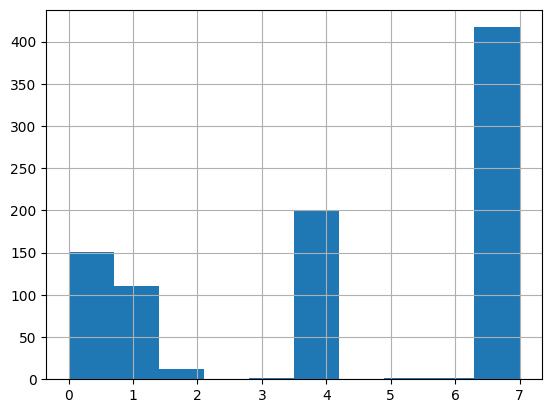

In [ ]:
df['ssd'].hist()

In [ ]:
df_원핫인코딩= pd.get_dummies(df)   # 원핫다했더니.. 칼럼이 23개에서 230개로 늘었다.... 일단 가자. 라벨인코딩으로 가야하는거아닌가...
corr= df_원핫인코딩.corr()

In [ ]:
corr
df['latest_price'].corr(['old_price'])

TypeError: unsupported type: <class 'list'>

어떤 인코딩 방법을 선택해야 할까요?

원-핫 인코딩: 범주 간에 순서 관계가 없는 경우 (예: 운영체제 종류) 사용하는 것이 좋습니다. `범주 수가 많을 경우 컬럼 수가 크게 증가할 수 있다는 단점이 있습니다.`:
라벨 인코딩: 범주 간에 순서 관계가 있는 경우 (예: 교육 수준) 사용하는 것이 좋습니다. 범주 수가 많더라도 컬럼 수가 증가하지 않는다는 장점이 있습니다. 하지만 OLS 모델에서 숫자 크기에 따라 가중치가 다르게 적용될 수 있다는 점에 유의해야 합니다.
결론:

OLS 모델을 사용할 때 숫자형 변수는 인코딩 없이 사용할 수 있지만, 범주형 변수는 반드시 인코딩을 해야 합니다. 어떤 인코딩 방법을 선택할지는 데이터의 특성과 분석 목적에 따라 결정해야 합니다.

주의:

라벨 인코딩을 사용할 때는 숫자 크기에 따른 가중치 문제를 고려해야 합니다.
범주 수가 매우 많은 경우 원-핫 인코딩으로 인해 컬럼 수가 과도하게 증가할 수 있습니다. 이 경우 차원 축소 기법을 고려해 볼 수 있습니다.

In [ ]:
램.SSD,HDD,그래픽카드 4개 칼럼을 독립변수로 하는, 다중선형회귀모형으로 다시 최근가격(latest_price)을 예측하고. 결정계수(R2)를 구하시오 (정답 : .graphic_card_gb 이고 T값은  13.886

In [ ]:
from statsmodels.formula.api import ols
formula = "latest_price ~ ram_gb + ssd + hdd+ os + graphic_card_gb "    # 종속변수 ~ 독립변수1+ 2  3
OLS학습모델 = ols(formula, data=df).fit()
print( OLS학습모델.summary()  ) # 학습된 모델

                            OLS Regression Results                            
Dep. Variable:           latest_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 11 May 2025   Prob (F-statistic):          2.64e-114
Time:                        12:05:33   Log-Likelihood:                -10632.
No. Observations:                 896   AIC:                         2.128e+04
Df Residuals:                     890   BIC:                         2.130e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.928e+05   7629.542     

## 7-1-2.잔차이탈도 (GLM 에서 찾을 것)
 gender를 종속변수로 하고 나머지 변수들(age, length, diameter, height, weight)을 독립변수로 사용하는 로지스틱 회귀 모델을 적합시킨 후, 잔차 이탈도(Residual Deviance)를 계산하시오.

In [ ]:
# 방법1
from statsmodels.formula.api import logit

# 1) 로지스틱 회귀 모델 생성 및 학습
model = logit("gender ~ age + length + diameter + height + weight", data=train).fit()
print(model.summary())

# 2) 잔차 이탈도 계산   # model.llf은 최대우도(log-Likelihood) 를 구하는 것인데. 이 수치의 -2배를 곱하면.. 잔차이탈도가 된다.
print(round(-2 * model.llf,2))  # LLF



In [ ]:
from statsmodels.formula.api import ols
formula = "latest_price ~ ram_gb[T.32 GB GB] + ram_gb[T.4 GB GB] +ram_gb[T.8 GB GB] +  ssd[T.1024 GB] +ssd[T.128 GB]+ssd[T.2048 GB]+ ssd[T.256 GB] +ssd[T.3072 GB]+ ssd[T.32 GB]+ ssd[T.512 GB] + os[T.Mac] + os[T.Windows] + graphic_card_gb "     # 종속변수 ~ 독립변수1+ 2 + 3
OLS모델 = ols(formula, data=df_인코딩).fit()            # 학습된 모델
OLS모델.summary()
## 원래 컬럼 이름 대신 원-핫 인코딩 후 생성된 컬럼 이름을 사용해야 합니다.
# pd.get_dummies() 함수를 사용하여 원-핫 인코딩을 수행하면 원래 컬럼 이름은 변경됩니다. 예를 들어, ram_gb 컬럼이 숫자형이라면 ram_gb 로 유지되지만, 범주형이라면 ram_gb_8GB, ram_gb_16GB 와 같이 새로운 컬럼들이 생성됩니다.
# 따라서 formula 변수에 지정된 컬럼 이름을 df_인코딩 데이터프레임의 실제 컬럼 이름으로 변경해야 합니다.
# formula = "latest_price ~ ram_gb + ssd + os + graphic_card_gb "  # 이전 코드
# formula = "latest_price ~ ram_gb[T.32 GB GB] + ram_gb[T.4 GB GB] +ram_gb[T.8 GB GB] + ssd + os + graphic_card_gb "    # 수정된 코드 (예시)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

In [ ]:
from statsmodels.formula.api import ols
formula = "latest_price ~ ram_gb_8GB + ram_gb_16GB + ssd + os + graphic_card_gb "    # 종속변수 ~ 독립변수1+ 2 + 3
OLS모델 = ols(formula, data=df_인코딩).fit()            # 학습된 모델
print(OLS모델.summary())

PatsyError: Error evaluating factor: NameError: name 'ram_gb_8GB' is not defined
    latest_price ~ ram_gb_8GB + ram_gb_16GB + ssd + os + graphic_card_gb
                   ^^^^^^^^^^

In [ ]:
# OLS 써머리 로 전체파악하면 간단
# 데이터를 새로 구성한다.  OLS 모델쓰면 인코딩 필요없다?
# 다중선형회귀 모델을 생성한다.
from statsmodels.formula.api import ols
formula = "latest_price ~ ram_gb + ssd + os + graphic_card_gb "    # 종속변수 ~ 독립변수1+ 2 + 3
OLS학습모델 = ols(formula, data=df).fit()            # 학습된 모델
print(OLS학습모델.summary())

                            OLS Regression Results                            
Dep. Variable:           latest_price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sun, 11 May 2025   Prob (F-statistic):           2.11e-97
Time:                        11:40:07   Log-Likelihood:                -10673.
No. Observations:                 896   AIC:                         2.136e+04
Df Residuals:                     891   BIC:                         2.138e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.513e+05   6495.197     

## 문제1-3.error rate(오류율)
독립변수 weight 만 사용해 학습한 로지스틱 회귀모델로 test데이터의 gender를 예측하고, error rate(오류율)를 구하시오. (1-정확도)
 하나도 맞지 않은 비율을 이야기하는 것임.
-----------------------------



In [ ]:
from statsmodels.formula.api import logit
formula ="gender ~ 무게 "
로짓학습모델 = logit(formula, data=train).fit()
pred = 로짓학습모델.predict(test)
pred  # test 테이블의 값을 예측한 값이다.

print( 로짓학습모델.summary() )

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                  210
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Oct 2024   Pseudo R-squ.:                0.003431
Time:                        11:29:31   Log-Likelihood:                -144.91
converged:                       True   LL-Null:                       -145.41
Covariance Type:            nonrobust   LLR p-value:                    0.3178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.276     -1.137      0.256      -0.855       0.227
무게             0.0047      0.

In [ ]:
# 오류율을 구하시오 ? 1- 성공률아닌가 성공율은 정확도로 보면 된다.
acc = accuracy_score(target, pred)  (실제값 , 예측값) 이건 공식이다.



# 7회 기출2번:


## 7회기출 2-1. ERP와 가장 높은 값의 상관계수를 가지는 인자는 무엇인가? (노트북가격에 영향이 높은  인자분석-실제 기출 7회)
- 방법1. 피어슨상관계수 (df.corr().칼럼명)에서 제일 높은 수치의 변수를 찾아라.   
- 방법2. 혹은 OLS회귀분석.로짓분석 summary에서 P값이 제일 낮은 것이 제일 영향력이 큰 변수임... (회귀계수가 아님에 주의)
-. --------------------------------------------------------------------------------------------------------------------
- 종속 변수에 가장 많은 영향력을 끼치는 "통계적으로 신뢰할 수 있는" 독립 변수를 찾으려면 p-값이 가장 낮은 변수를 확인하는 것이 핵심입니다. p-값이 낮을수록 해당 독립 변수가 종속 변수의 변동을 설명하는 데 기여하는 바가 통계적으로 더욱 확실하다고 볼 수 있습니다.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_3/system.csv")
print(df.head(3))
df.corr()['ERP'].abs().sort_values(ascending=False)
display( df.corr() . ERP. abs() . sort_values(ascending=False).head(5) )
print(" -----------------" )
print(df.corr().ERP)
# 1) ERP와 각 변수 사이의 피어슨상관계수 계산   df.corr()   # 0.434 Feature1 이 답이다. ERP' 칼럼과 데이터프레임 df의 다른 각 칼럼들 간의 피어슨 상관계수입니다.

          ERP    Feature1   Feature2   Feature3        CPU
0  135.281047  235.088034  44.462272 -36.532634  20.492369
1  108.003144   36.571914  46.409312 -21.709347  34.169811
2  119.574760   52.239055  66.494894 -30.590820  67.624248


,ERP
ERP,1.000000
Feature1,0.434442
CPU,0.201027
Feature2,0.076116
Feature3,0.059888


 -----------------
ERP         1.000000
Feature1    0.434442
Feature2    0.076116
Feature3   -0.059888
CPU        -0.201027
Name: ERP, dtype: float64


## 7회기출2-2:  선형회귀모델(OLS) 생성하고 적합한 결정계수(R2)와 허용오차금액(RMSE)를 찾아라
CPU 컬럼이 100미만인 것만 찾아 ERP를 종속 변수로, 나머지 변수들을 독립 변수로 설정해 OLS선형회귀 모델을 만들고 적합한 결정계수를 구하시오. (반올림하여 소수 셋째자리까지 계산)



In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_3/system.csv")
df.head()

,ERP,Feature1,Feature2,Feature3,CPU
0,135.281047,235.088034,44.462272,-36.532634,20.492369
1,108.003144,36.571914,46.409312,-21.709347,34.169811
2,119.574760,52.239055,66.494894,-30.590820,67.624248
3,144.817864,196.195890,59.828956,-33.400891,87.923476
4,137.351160,75.175619,59.601973,-26.668085,54.367805


In [ ]:
조건1 = df['CPU'] < 100
df2 = df[ 조건1 ] # 조건1을 충족하는 것만으로 새로운 DF2  를 생성함.
df2
#OLS함수만들기
from statsmodels.formula.api import ols
formula = "ERP ~  Feature1 + Feature2 + Feature3 + CPU"
OLS학습모델 = ols(formula, data=df2).fit()
print( OLS학습모델.summary() )

# 정답 : 결정계쑤 R2 = 0.226 에 불과한다.
print(" -------------------------------             ")
import numpy as np
오즈비=np.exp(0.1391)   # 정답 :  1.15
print("\n", "■ 오즈비(영향도) :  ", format(오즈비, '0.2f') )

# RMSE(허용오차금액) 구하기
from sklearn.metrics import root_mean_squared_error, r2_score
실제값 = df2['ERP']                            # 종속변수(ERP) 값이 그대로 나온다.
예측값 = OLS학습모델.predict(df2)  # 종속변수(ERP)에 대한 예측값이 시리즈로 나옵니다. 아예, 테이블에 추가칼럼화.
RMSE = root_mean_squared_error(실제값, 예측값)
print ("■ RMSE :    ", RMSE)

# 신규값 넣었을 때의 예측값(ERP) 및 신뢰구간 95% 을 구해라.
신규값 = [200,50,-40,30]
신규값df=pd.DataFrame([신규값], columns=[ 'Feature1','Feature2',   'Feature3', 'CPU'  ] )
display(신규값df)
예측값2 = OLS학습모델.get_prediction(신규값df)
예측값2.summary_frame ( alpha=0.05 )
#신규데이터에 대한 ERP예측값은 120.246이며. 신뢰구간은 110~130 입니다.

#   	  mean	       mean_se	   mean_ci_lower	   mean_ci_upper	     obs_ci_lower	   obs_ci_upper
# 	  120.246         	5.1	           110.12087	          130.372452	           82.7343          	157.759023
#OLS학습모델.pvalues()  # 틀리다.  () 빼야 한다.

OLS학습모델.pvalues.sort_values(ascending=False).sum()
print("■파람스;", abs( OLS학습모델.params).sort_values(ascending=False).sum())

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     6.937
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           6.07e-05
Time:                        00:29:25   Log-Likelihood:                -429.44
No. Observations:                 100   AIC:                             868.9
Df Residuals:                      95   BIC:                             881.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4348     15.094      4.932      0.0

,Feature1,Feature2,Feature3,CPU
0,200,50,-40,30


■파람스; 75.19654130145828


In [ ]:
import numpy as np
CPU오즈비= np.exp(OLS학습모델.params['CPU'])  # np.exp(-0.1125)
CPU오즈비2= np.exp(-0.1125)  # 회귀계수를 넣어주면 오즈비가 그냥 나온다.
print( "\n오즈비 : " , format(오즈비,'.15f') )   # \n한칸 내려서 표시해라.
print( "\n오즈비2 : " , format(오즈비2,'.15f') )
#오즈비 0.9 의 의미
#CPU 숫자증가는 ERP성능에 10%정도 마이너스 영향을 끼친다로 이해하면 될 듯 합니다.


오즈비 :  0.893610667838587

오즈비2 :  0.893597347108516



흡연과 폐암 발생의 관계를 연구한다고 가정해 봅시다. 흡연자 그룹의 폐암 발생 오즈가 비흡연자 그룹의 폐암 발생 오즈보다 0.9배 낮다면, 흡연은 폐암 발생 위험을 10% 감소시키는 것과 관련이 있다고 해석할 수 있습니다. (주의: 오즈비는 인과 관계를 증명하는 것은 아닙니다.)
 이건 카이제곱 교차표(독립성 검증에 나오는 건데???)

In [ ]:
# 신규값이 들어온다면? (문제 생성한 것임)
신규값 =[200,50,-40,30]
신규값df=pd.DataFrame([신규값], columns=[ 'Feature1','Feature2',   'Feature3', 'CPU'  ] )  # []를 한번 떠 감싸야 행으로 인정된다. 이렇게 안하면 열로 밑으로 떨어진다.
예측값 = OLS학습모델.get_prediction(신규값df)
예측값2= OLS학습모델.predict(신규값df)
예측값1

NameError: name '예측값1' is not defined

In [ ]:
신규값 =[200,50,-40,30]
신규값df=pd.DataFrame([신규값], columns=[ 'Feature1','Feature2',   'Feature3', 'CPU'  ] )  # []를 한번 떠 감싸야 행으로 인정된다. 이렇게 안하면 열로 밑으로 떨어진다.
예측값 = OLS학습모델.get_prediction(신규값df)
예측값2= OLS학습모델.predict(신규값df)
예측값2
예측값상세전환 = 예측값.summary_frame(alpha=0.05)   # 평균 및 신뢰구간을 구하는 함수
print(예측값상세전환)
예측성능 : 120.24
신뢰구간(95%) : 110.12 ~ 130.37 사이입니다. 정답입니다.


         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  120.246661  5.100509      110.12087     130.372452       82.7343   

   obs_ci_upper  
0    157.759023  


In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_3/system.csv")
df.head(5)

,ERP,Feature1,Feature2,Feature3,CPU
0,135.281047,235.088034,44.462272,-36.532634,20.492369
1,108.003144,36.571914,46.409312,-21.709347,34.169811
2,119.574760,52.239055,66.494894,-30.590820,67.624248
3,144.817864,196.195890,59.828956,-33.400891,87.923476
4,137.351160,75.175619,59.601973,-26.668085,54.367805


## 7회기출2-3. 에서 만든 모델에서 독립변수 중 p-value가 가장 높은값을 구하시오. (반올림하여 소수 셋째자리까지 계산)
가장 의미없다는 것으로 보인다.


In [ ]:
# pvalue
# 0.457
print(model.pvalues)
print(model.pvalues.Feature2)

Intercept        5.034241e-05
sex[T.male]      1.295844e-43
embarked[T.Q]    1.379433e-01
embarked[T.S]    2.838761e-02
deck[T.B]        8.378941e-01
deck[T.C]        4.278340e-02
deck[T.D]        5.554474e-01
deck[T.E]        2.520194e-01
deck[T.F]        5.016224e-01
deck[T.G]        1.425070e-01
sibsp            3.773549e-03
parch            1.564154e-01
fare             3.043400e-04
dtype: float64


AttributeError: 'Series' object has no attribute 'Feature2'

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/7_3/system.csv")
sum(df['CPU'] < 100)  # 조건에 sum을 연결하니 총 갯수가 나오는구나.
df

,ERP,Feature1,Feature2,Feature3,CPU
0,135.281047,235.088034,44.462272,-36.532634,20.492369
1,108.003144,36.571914,46.409312,-21.709347,34.169811
2,119.574760,52.239055,66.494894,-30.590820,67.624248
3,144.817864,196.195890,59.828956,-33.400891,87.923476
4,137.351160,75.175619,59.601973,-26.668085,54.367805
...,...,...,...,...,...
95,114.131463,105.039508,67.053370,-33.807461,33.747738
96,100.210000,141.114900,51.465875,-25.710380,97.049369
97,135.717410,179.363130,58.744305,-24.294491,13.343943
98,102.538242,217.189747,44.008265,-22.667106,9.680395


# ............................................................

# 6회기출

## 기출 1 : 항암제, 감기약 부작용 분포 차이여부 (카이제곱검정 - 빈도수 동일하게 맞출 것)

■Q1. 항암약 위약을 투여 받은 환자의 부작용은 감기약 위약을 투여 받은 환자의 부작용 분포와 차이가 있는가

- 1-1. 항암약을 투여 받은 환자 중 '무증상'의 비율을 0과 1사이로 구하시오.
- 1-2. 감기약의 예상 부작용 비율과 항암약의 부작용 관찰값이 통계적으로 유의미하게 차이가 있는지 확인하려 한다. 검정통계량 산출해라.
- 1-3. 위의 p-값을 구하시오
 - 귀무가설(H0): 감기약(위약)의 부작용과 항암약(위약)의 부작용은 동일하다.
 - 대립가설(H1): 감기약(위약)의 부작용과 항암약(위약)의 부작용은 다르다.

 ** 정답 : 검정통계량은 6.977 이고.  P값은 0.07 이어서 귀무가설로 가야함. ( 결론 : 유의미한 차이 없다) 가 정답임.

In [ ]:
# 감기약은 비율로만 제공되었다 → 빈도로 전환할 것.
# 1. 아픔: 10%             2번
# 2. 조금 아픔 5%       1번
# 3. 속 쓰림 15%         3번
# 4. 무증상: 70%         14번

님의 코드에서 이 오류가 발생하는 이유는 stats.chisquare(관찰값ob, 기대값ex)를 호출할 때 관찰값ob 리스트와 기대값ex 리스트의 전체 합계가 일치하지 않기 때문입니다. chisquare 함수는 단일 표본이 알려진 또는 이론적인 분포와 얼마나 잘 맞는지를 검정하는 "적합도 검정(goodness-of-fit test)"에 사용됩니다. 이 검정에서는 관찰된 총 빈도와 기대되는 총 빈도가 동일해야 합니다.

해결 방법:

chisquare 함수는 이 경우에 적합하지 않습니다. 항암약과 감기약 간의 부작용 분포 차이를 검정하려면 두 개의 범주형 변수(약 종류와 부작용 종류) 간의 독립성을 검정해야 합니다. 이를 위해서는 분할표(contingency table)를 만들고 scipy.stats.chi2_contingency 함수를 사용해야 합니다.

In [ ]:
# 교재 정답 풀이 --------------------

import pandas as pd
df = pd.DataFrame({ "항암약": [4,4,3,4,1,4,1,4,1,4,4,2,1,4,2,3,2,4,4,4] })
# 1: '아픔', 2: '조금 아픔', 3: '속쓰림', 4: '무증상'
display(df)
display ( df['항암약'].value_counts().sort_index()  )  # 밸류카운츠하되... 값의 역순배열이 아닌, 단순한 행번호를 유지해라.
현재값 = df['항암약'].value_counts().sort_index().to_list()
#감기약_전국평균 = [0.1 * 20, 0.05 * 20, 0.15 * 20, 0.7 * 20]
감기약_전국평균_분포 = [2,1,3,14]
from scipy import stats
stats.chisquare(현재값, 감기약_전국평균_분포)
stats.chisquare( [4,3,2,11],  [2,1,3,14]    )
# ower_divergenceResult(statistic=np.float64(6.976190476190476), pvalue=np.float64(0.07266054733847573))

,항암약
0,4
1,4
2,3
3,4
4,1
5,4
6,1
7,4
8,1
9,4


,count
항암약,
1,4
2,3
3,2
4,11


Power_divergenceResult(statistic=np.float64(6.976190476190476), pvalue=np.float64(0.07266054733847573))

In [ ]:
# 주제별 카운트 계산 각각 하고
import pandas as pd

항암제 = [4, 4, 3, 4, 1, 4, 1, 4, 1, 4, 4, 2, 1, 4, 2, 3, 2, 4, 4, 4]
감기 = [1, 1, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
df = pd.DataFrame({"칼럼1항암": 항암제, "칼럼2감기": 감기})

# Count values for each column
항암_counts = df['칼럼1항암'].value_counts().sort_index()
감기_counts = df['칼럼2감기'].value_counts().sort_index()

# Combine the counts into a single DataFrame
side_effect_counts = pd.concat([항암_counts, 감기_counts], axis=1)
side_effect_counts.columns = ['칼럼1항암', '칼럼2감기']  # 칼럼명 변경하기

print(side_effect_counts)

   칼럼1항암  칼럼2감기
1      4      2
2      3      1
3      2      3
4     11     14


In [ ]:
df2 = df.groupby(cending= True)

In [ ]:

# 부작용종류별로 그룹핑방법 중 제일 간단한  value_counts 를 사용함.
df2 = df.groupby(cending= True)    #  기본이 역순배열이라서 번호순차배열하라고 별도 지시함)
display( df2 )    #  4번이 무증상임.  시리즈입니다. (DF 아님)
#테이블화하면?
print( df2.to_frame())   # 인덱스없이 원래대로 테이블화됨
print( df2.reset_index() ) # 인덱스가 추가로 생김
df.columns = ['함암약', '감기']
#정답 4번의 비율은 ? 11/20  print(11/20)  0.55 입니다.
# 다른 방법도 있음

print(df.value_counts(normalize=True) )  #비율로 한번에 만들어주는 것도 있습니다.라고 안내해주심. 너무 좋은데# 무증상(4번) 비율 보여줌. 0.55

항암약  감기
1    3     1
3    2     1
     4     1
4    1     2
     3     2
1    4     3
2    4     3
4    4     7
Name: count, dtype: int64

        count
항암약 감기       
1   3       1
3   2       1
    4       1
4   1       2
    3       2
1   4       3
2   4       3
4   4       7
   항암약  감기  count
0    1   3      1
1    3   2      1
2    3   4      1
3    4   1      2
4    4   3      2
5    1   4      3
6    2   4      3
7    4   4      7
함암약  감기
4    4     0.35
1    4     0.15
2    4     0.15
4    1     0.10
     3     0.10
1    3     0.05
3    2     0.05
     4     0.05
Name: proportion, dtype: float64


In [ ]:
from scipy  import stats
stats.chisquare(항암제, 감기약)  # 원래는 실제관측값, 기대치(전국평균)으로 넣어야합니다.

1-1. 항암약을 투여 받은 환자 중 '무증상'의 비율을 0과 1사이로 구하시오.

In [ ]:
df['항암약'].value_counts()  # 밸류별로 카운트해주네..전체는 20개이고. 이중 상태4 는 11개 입니다.  비율은 아래와 같이 간단히
# 11 / 20     == 무증상 4번의 비율은 0.55 입니다.

,count
항암약,
4,11
1,4
2,3
3,2


In [ ]:
조건 = df['항암약'] == 4
sum(조건) / len(df['항암약'])

0.55

1-2. 감기약의 예상 부작용 비율과 항암약의 부작용 관찰값이 통계적으로 유의미하게 차이가 있는가?
* (검증: 카이제곱 적합도 검증으로 검정 통계량을 구해라)

In [ ]:
관찰값ob = df['항암약'].value_counts().sort_index().to_list()
관찰값ob.head()

AttributeError: 'list' object has no attribute 'head'

In [ ]:
관찰값ob = df['항암약'].value_counts().sort_index().to_list()
기대값ex = [0.1 * 20, 0.05 * 20, 0.15 * 20, 0.7 * 20]    # 동일하게 빈도로 변경해야 카이제곱검증 할 수 있다.

from scipy import stats

stats.chisquare(관찰값ob, 기대값ex)

Power_divergenceResult(statistic=6.976190476190476, pvalue=0.07266054733847573)

## 항암제. 감기약 부작용종류별 비율이 서로 의미있는 차이가 있다고  봐야하는가? (이것은 정규성,정합성 검증이다. 유사여부)
- 약 종류	....아픔	..조금아픔...	속쓰림..	무증상
- 감기약..........	5	......20............	10........	65
- 항암약.........	20.....	15............	30.........	35

In [ ]:
import scipy.stats as stats
import pandas as pd

# 예시 데이터
data = [[5, 20, 10, 65],     # 감기약   # 이건 시리즈아닌가?
          [20, 15, 30, 35]]    # 항암약
df = pd.DataFrame(data, columns=["아픔", "조금 아픔", "속쓰림", "무증상"], index=["감기약", "항암약"])
print(df)
# 카이제곱 독립성 검정
chi2, p, dof, expected = stats.chi2_contingency(data)

# 결과 출력
print("카이제곱 통계량:", chi2)
print("p-값:", p)
print("자유도:", dof);
print("기대값:\n", pd.DataFrame(expected, columns=["아픔", "조금 아픔", "속쓰림", "무증상"], index=["감기약", "항암약"]))

     아픔  조금 아픔  속쓰림  무증상
감기약   5     20   10   65
항암약  20     15   30   35
카이제곱 통계량: 28.714285714285715
p-값: 2.571371561038785e-06
자유도: 3
기대값:
        아픔  조금 아픔   속쓰림   무증상
감기약  12.5   17.5  20.0  50.0
항암약  12.5   17.5  20.0  50.0


In [ ]:
pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)

In [ ]:
df_melted = df.melt(id_vars="뭐지", value_vars=None, var_name="유형", value_name='숫자')
df_melted

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['뭐지']"

In [ ]:
df.unstack()

아픔     감기약     5
       항암약    20
조금 아픔  감기약    20
       항암약    15
속쓰림    감기약    10
       항암약    30
무증상    감기약    65
       항암약    35
dtype: int64

1-3. 위의 p-값을 구하시오

## 6회기출2.(솔라.오존.온도) 다중선형회귀. 회귀계수. P값. 예측값과 95%신뢰구간
- 2-1. OLS다중 선형 회귀 모델을 구축하고, 온도를 종속변수로 하고, 독립변수 o3(오존)의 회귀계수를 구하시오. (정답: 0.0749)
- 2-2. 데이터에서 'solar'와 '오존o3' 값을 고정한 상태에서, 'wind'의 세기가 증가함에 따라 'temperature'가 감소하는지를 검증하기 위해 다중 선형 회귀 분석을 수행하고, 이 때'wind'의 회귀 계수에 대한 p-value 값을 구하시오. (유의수준: 0.05) 정답: 0.78
- 2-3. solar:100, wind:5, o3:30일 때 예측값과 그에 대한 95% 신뢰구간을 구하시오."
(정답 : 21.56이며, 95%신뢰구간 21.21~	21.91 이다.)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/choi4490/AAA/refs/heads/main/data6-3-2.csv")
df.rename( columns={'temperature' : "온도"},inplace=True)
display(df.head())

,solar,wind,o3,온도
0,89.14,6.28,33.52,23.0
1,109.97,1.04,27.01,20.7
2,102.83,6.42,41.00,20.5
3,84.94,10.20,33.44,22.2
4,94.21,4.95,29.97,21.4


In [ ]:
#LS분석합니다.  결과는 써머리하면 됩니다.
from statsmodels.formula.api import ols
formula = "온도~ solar +  wind+ o3"  # 문자열은 C()로 감싸기도 하지만. stats는 알아서 다 해결한다.(pd.get_dummies 처럼 인코딩처리함)
OLS학습모델 = ols(formula, data=df).fit()
print( OLS학습모델.summary() )
print("-----------------------------------------------------------------------------------")
OLS학습모델.summary()

                            OLS Regression Results                            
Dep. Variable:                     온도   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.229
Time:                        11:04:22   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     온도   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.229
Time:                        11:04:22   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.000      15.093      23.008
solar          0.0039      0.015      0.251      0.802      -0.027       0.035
wind          -0.0252      0.090     -0.280      0.780      -0.204       0.153
o3             0.0749      0.036      2.079      0.040       0.003       0.146
==============================================================================
Omnibus:                        0.654   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.672
Skew:                           0.187   Prob(JB):                        0.715
Kurtosis:                       2.855   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------------------------------------------------------
2-2. 데이터에서 'solar'와 '오존o3' 값을 고정한 상태에서, 'wind'의 세기가 증가함에 따라 'temperature'가 감소하는지를 검증하기 위해 다중 선형 회귀 분석을 수행하고, 이 때'wind'의 회귀 계수에 대한 p-value 값을 구하시오. (유의수준: 0.05) 정답: 0.816

2-3. solar:100, wind:5, o3:30일 때 예측값과 그에 대한 95% 신뢰구간을 구하시오."

In [ ]:
formula2= "온도~  wind"  # 모두 숫자라서 C() 필요없음
OLS학습모델2 = ols(formula2, data=df).fit()         # 선형회귀모델로 학습모델인 것이다. 신규값예측에 모두 사용된다.
print( OLS학습모델2.summary() )
print("-----------------------------------------------------------------------------------")
OLS학습모델2.summary()

                            OLS Regression Results                            
Dep. Variable:                     온도   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05455
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.816
Time:                        11:05:55   Log-Likelihood:                -197.66
No. Observations:                 100   AIC:                             399.3
Df Residuals:                      98   BIC:                             404.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6334      0.484     44.652      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     온도   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05455
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.816
Time:                        11:05:55   Log-Likelihood:                -197.66
No. Observations:                 100   AIC:                             399.3
Df Residuals:                      98   BIC:                             404.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6334      0.484     44.652      0.000      20.672      22.595
wind          -0.0212      0.091     -0.234      0.816      -0.202       0.159
==============================================================================
Omnibus:                        0.791   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.584
Skew:                           0.187   Prob(JB):                        0.747
Kurtosis:                       3.025   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------------------------------
2-3. solar:100, wind:5, o3:30일 때 예측값과 그에 대한 95% 신뢰구간을 구하시오."
-  OLS학습모델.get_prediction(새값df)
-  신규예측값_신뢰구간용.summary_frame(alpha=0.05)

- 95% 신뢰 구간의 하한: mean_ci_lower 컬럼의 값
- 예측 결과 (평균 예측값): mean 컬럼의 값
- 95% 신뢰 구간의 상한: mean_ci_upper 컬럼의 값

In [ ]:
새값2 =[[100,5,30]]   # 이중대괄호해야 행으로 인식합니다.
새값df =pd.DataFrame(새값2, columns=["solar", "wind", "o3"])

신규예측값 = OLS학습모델.predict(새값df)
print("신규값예측결과 : " , 신규예측값)   # 21.56163

# 신뢰구간파악하기( OLS를 새로할 수가 없네.....새로운 방법 2개를 알아야 한다.
신규예측값_신뢰구간용 = OLS학습모델.get_prediction(새값df)  # 이 함수를 알아야 만점가능하다. 신뢰구간까지 추출가능한 버전임
print('---------------------------------')
print('신규예측값_신뢰구간용')
print('---------------------------------')

# summary_frame을 사용하여 예측 결과 요약 DataFrame 생성 (95% 신뢰/예측 수준)
예측값상세전환 = 신규예측값_신뢰구간용.summary_frame(alpha=0.05)
신규예측값_신뢰구간용.summary_frame(alpha=0.05)

#mean 평균이 예측결과 기본값이구나....

# 추가 사항:
# get_prediction()의 출력은 단순한 예측값 하나가 아닙니다. 신뢰 구간 및 예측 구간과 같은 추가 정보가 포함된 특수 객체입니다.
#문제에서 95% 신뢰 구간을 요구했다면 mean_ci_lower와 mean_ci_upper 값을 사용하면 됩니다.

신규값예측결과 :  0    21.56163
dtype: float64
<class 'pandas.core.series.Series'>
Index: 1 entries, 0 to 0
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 16.0 bytes
None
---------------------------------
신규예측값_신뢰구간용
---------------------------------


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.56163,0.175263,21.213737,21.909524,18.082985,25.040276


위의 .summary_frame(alpha=0.05) 다시 설명해봐

네, .summary_frame(alpha=0.05) 함수에 대해 다시 한글로 자세히 설명해 드리겠습니다.

이 함수는 statsmodels 라이브러리에서 회귀 모델(OLS와 같은)의 .get_prediction() 메서드가 반환하는 결과 객체에서 사용할 수 있는 메서드입니다.

이 함수가 하는 일:

-예측 결과 요약: 예측 결과를 포함하는 pandas DataFrame을 생성합니다.

-신뢰 수준 설정: alpha=0.05는 신뢰 구간(confidence interval)과 예측 구간(prediction interval)을 계산하는 데 사용되는 유의 수준(alpha level)을 지정합니다. 0.05는 일반적으로 사용되는 값으로, 이는 95% 신뢰/예측 구간(1 - 0.05 = 0.95)에 해당합니다.

-생성되는 DataFrame의 주요 열: 일반적으로 다음 열을 포함합니다.

mean: 새로운 데이터에 대한 종속 변수의 예측값입니다. 이는 주어진 독립 변수 값에 대한 종속 변수 평균의 점 추정치입니다.
mean_se: 예측된 평균의 표준 오차입니다. 이는 추정된 평균의 정밀도를 측정합니다.
-mean_ci_lower: 예측된 평균에 대한 신뢰 구간의 하한입니다.
-mean_ci_upper: 예측된 평균에 대한 신뢰 구간의 상한입니다.
-obs_ci_lower: 새로운 관측치에 대한 예측 구간의 하한입니다.
-obs_ci_upper: 새로운 관측치에 대한 예측 구간의 상한입니다.
왜 유용한가:

점 예측 이상의 정보 제공: .predict()는 종속 변수에 대한 가장 좋은 단일 예측값을 제공하지만, .summary_frame()은 참 평균(신뢰 구간) 또는 새로운 개별 관측치(예측 구간)가 포함될 것으로 확신할 수 있는 값의 범위를 제공합니다.
불확실성 정량화: 표준 오차와 신뢰/예측 구간은 예측과 관련된 불확실성을 이해하는 데 도움이 됩니다. 구간이 넓을수록 불확실성이 크다는 것을 나타냅니다.
결과 해석:
신뢰 구간은 주어진 독립 변수 값 세트에 대한 종속 변수의 평균 값의 가능한 범위에 대해 알려줍니다.
예측 구간은 단일 새로운 관측치의 가능한 범위에 대해 알려줍니다. 예측 구간은 평균 추정치의 불확실성과 개별 데이터 포인트의 내재된 변동성을 모두 고려하므로 항상 신뢰 구간보다 넓습니다.
정형화된 출력: 출력 결과가 구조화된 DataFrame이므로, 예측 결과를 명확한 형식으로 쉽게 확인하고 작업할 수 있습니다.
노트북 코드 맥락에서의 사용:

노트북에서 OLS 모델(OLS학습모델)을 적합시킨 후 새로운 데이터(새값df)에 대한 예측을 얻을 때 .summary_frame(alpha=0.05)을 사용했습니다. 이를 통해 예측된 온도(mean)뿐만 아니라, 주어진 solar, wind, o3 값에 대한 예측된 평균 온도의 95% 신뢰 구간 및 새로운 온도 관측치에 대한 95% 예측 구간을 확인할 수 있었습니다. 이는 예측의 신뢰성을 이해하는 데 유용한 정보입니다.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/choi4490/AAA/refs/heads/main/data6-3-2.csv")
df.head()

,solar,wind,o3,temperature
0,89.14,6.28,33.52,23.0
1,109.97,1.04,27.01,20.7
2,102.83,6.42,41.00,20.5
3,84.94,10.20,33.44,22.2
4,94.21,4.95,29.97,21.4


1. 다중 선형 회귀 모델(OLS)을 구축하고, 독립변수 o3의 회귀계수를 구하시오.
- 독립변수: solar(태양 에너지), wind(바람의 세기), o3(오존 농도)
- 종속변수: temperature(온도)

In [ ]:
from statsmodels.formula.api import ols
formula = "temperature ~ solar + wind + o3"    # 종속변수 ~ 독립변수1+ 2 + 3
model = ols(formula, data=df).fit()            # 학습된 모델
print(model.summary())                         # 리포트를 보는 것  OLS Regression Results
# 0.0749
# model.params['o3']   # 회계계수는 매개변수이므로  params['변수이름'] 으로 하면 된다.

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Thu, 03 Oct 2024   Prob (F-statistic):              0.229
Time:                        07:33:41   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.0

2. 데이터에서 'solar'와 'o3' 값을 고정한 상태에서, 'wind'의 세기가 증가함에 따라 'temperature'가 감소하는지를 검증하기 위해 다중 선형 회귀 분석을 수행하고, 이 때'wind'의 회귀 계수에 대한 p-value 값을 구하시오. (유의수준: 0.05)

In [ ]:
0.78  # 상단분석표에 P값 나온다.
model.pvalues['wind']   # 상단분석표에 P값 나온다. 이렇게 해도 되네...

3.solar:100, wind:5, o3:30일 때(새로운 데이터) 예측값과 그에 대한 95% 신뢰구간을 구하시오."

In [ ]:
new_data = pd.DataFrame({
                       'solar':[100],
                        'wind':[5],
                          'o3':[30]
})
pred = model.get_prediction(new_data)    # predict은 예측값만 나오고, get_prediction은 예측값 외에 신뢰 구간(confidence interval)과 관찰 구간(observation interval)을 확인할 수 있어요~!
print(pred.summary_frame(alpha=0.05))


NameError: name 'model' is not defined

In [ ]:
# 예측값 21.56163
# 예측값에 대한 95% 신뢰구간 21.213737      21.909524

## 6회기출2-2: 나이+ 콜레스테롤 = 몸무게 예측 OLS모델 생성 및 각각의 상관계수.신뢰구간(장은진 기출 6-작업형3)
- 다중선형회귀분석임. (10.06 일)
1. 몸무게 예측하는 OLS선형회귀모델을 생성하고 age의 회귀계수를 구하시오
2. age 가 45세이고, 콜레스테롤 67.8 인 새 환자의 몸무게를 예측하시오           (정답: 78.825)
3. 선형회귀모델에서 유의수준 0.05일 때, 콜레스테롤의 회귀계수의 신뢰구간을 적으시오

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JEunJin/BigData_python/refs/heads/master/bigdata_csvfile/cholesterol_data.csv")
print(df.head())


   age  Cholesterol  weight
0   65         69.0   111.0
1   54        117.0    81.0
2   61         86.2    72.0
3   57         76.0    78.0
4   62        160.0    61.0


In [ ]:
#선형회귀모델 생성하기
from statsmodels.formula.api import ols
OLS학습모델 = ols('weight ~ age + Cholesterol', data=df).fit()
print(OLS학습모델.summary())
# 결론 : R2(결정계수) : 0.044
#잔차이탈도 : Log-Likelihood * (-2) = 2749.8
#정답 :OLS학습모델.params['age']


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.574
Date:                Tue, 20 May 2025   Prob (F-statistic):           0.000608
Time:                        14:27:36   Log-Likelihood:                -1374.9
No. Observations:                 333   AIC:                             2756.
Df Residuals:                     330   BIC:                             2767.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      74.8953      4.455     16.813      

-2749.8

In [ ]:
## age 의 회계계수  : -0.0361
OLS학습모델.params['age']


-0.03610166914386496

In [ ]:
# 예측해야할 때
신규=[[45,67.8]]
신규df = pd.DataFrame(신규, columns=[ 'age' ,  'Cholesterol' ] )
print( 신규df)
신규예측값 = OLS학습모델.predict(신규df)
print(신규예측값)
#신규 = pd.DataFrame({'age':[45], 'Cholesterol':[67.8]})
# 신규
#신규 = np.array( [45,67.8] )
#신규df=pd.DataFrame([신규], columns=['age', 'Cholesterol'])
#신규df


   age  Cholesterol
0   45         67.8
0    78.825469
dtype: float64


In [ ]:
■ 콜레스테롤 회귀 계수의 신뢰 구간 찾기:
 OLS학습모델.summary()의 출력 결과 표에서 '콜레스테롤' 행을 찾습니다. 이 행에 해당 독립변수에 대한 통계량들이 나열되어 있으며, '0.025'와 '0.975' 또는 비슷한 이름으로 표시된 두 개의 열이 있습니다. 이 두 값이 각각 95% 신뢰 구간의 하한과 상한을 나타냅니다. (유의수준 0.05는 1 - 0.05 = 0.95, 즉 95% 신뢰 수준에 해당합니다.)

In [ ]:
# 예측해야할 때. 방법2    --- 퇴근후 딴짓에서 알려준 값(예측값 78.2 외에도 편차. )


신규값예측 = model.get_prediction(new_data)
print(신규값예측.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  78.825469  1.484478      75.905236      81.745702     48.985371   

   obs_ci_upper  
0    108.665568  


#-------------- 가설검증 ----------------

# F검정인가 분산분석인가? stats.f_oneway ( , ) 검정 ( 모집단 2개의 분산비교) - 2개 자동차 판매점의 월 매출은 별 차이가 없는가 10월22일
- 검정통계량 및 P-value 통해. 검정하시오
- 특징 : 2개그룹 비교 / 두 매출총액 불일치함.(범주형은 아니고. 매출총액 불일치로 합계를 맞추던거해야. 카이제곱 검증을 할 수 있다)


In [ ]:
# 자동차 판매점 데이터 생성 (양쪽의 전체 합계는 불일치하네...) 카이제곱검정 사용불가
import pandas as pd
df = pd.DataFrame ( { '월': [1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11, 12],   # 숫자로 간주된다. 문자가 아니다.   이렇게 하면 칼럼을 지정하고. 수직으로 테이블을  만드는 방법이다.
                      '판매점1': [40,30, 75, 13,15,20,55,28,37,45,72,100] ,
                      '판매점2': [ 22,45,32,11,20,33,80,72,68, 55,80,90]  }
                   )
df['판매점1'].sum()   # 530
df['판매점2'].sum()   # 608


np.int64(608)

In [ ]:
# 정규성 검사
# 등분산성 검사 (2개그룹이상)  - 독립T검정 구문에 equal =True, False 결정해줘야 함.
# 2개그룹이므로 독립T검정시도한다.
# 맞습니다! 분산분석도 2개 그룹에 사용할 수 있어요. 실제로 2개 그룹 ANOVA = 독립T검정과 수학적으로 동일한 결과가 나옵니다.
from scipy import stats
stats.shapiro(df['판매점1'])
stats.shapiro(df['판매점2'])
stats.levene(df['판매점1'], df['판매점2'])
# LeveneResult (statistic=np.float64(0.27745947456679726), pvalue=np.float64(0.6036423454566606))  .→ P값이 0.05 넘었으므로 기존 귀무가설 인증( 등분산성 인정)

#독립T검정, 분산분석(F검정) 둘 다 해보면?
독립T검정= stats.ttest_ind( df['판매점1'], df['판매점1'], equal_var = True/False )
일원분산분석 = stats.f_oneway(df['판매점1'], df['판매점2'])
print(독립T검정)
print(일원분산분석)

#비모수검정(중위수)이라고 하면? 서로 다른 그룹이므로
맨휘트니유비모수검정= stats.mannwhitneyu(df['판매점1'], df['판매점2'])
크루스칼비모수검정 = stats.kruskal(df['판매점1'], df['판매점2'])
print(맨휘트니유비모수검정)
print(크루스칼비모수검정)



TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.float64(22.0))
F_onewayResult(statistic=np.float64(0.34925373134328336), pvalue=np.float64(0.5605591324549977))
MannwhitneyuResult(statistic=np.float64(61.0), pvalue=np.float64(0.5439320176852463))
KruskalResult(statistic=np.float64(0.40421205519245), pvalue=np.float64(0.5249219541174035))


In [ ]:
df['판매점1'].sum()   # 530
df['판매점1'].describe()  # 월평균은 44, 최소 13, 최대100을 알 수 있다.
# 근데, 합계가 틀리다는 것은 카이제곱검정을 사용할 수 없다는 것을 반증합니다.


,판매점1
count,12.000000
mean,44.166667
std,26.794957
min,13.000000
25%,26.000000
50%,38.500000
75%,59.250000
max,100.000000


In [ ]:
# F 검정을 함.  근데 이건, 일원분산분석과 동일한데?  2개인데. 왜 분산분석을 하지???
from scipy import stats
stats.f_oneway(df['판매점1'], df['판매점2'])

# 분석결과 F-통계량은 0.349로 확인되며. P값은 0.56으로 유의수준0.05(5%) 신뢰도 95%를 초과하므로, 귀무가설이 맞다. (별 차이 없다고 봐야 함)

F_onewayResult(statistic=0.34925373134328336, pvalue=0.5605591324549977)

# ★ 일원 분산 분석 (무작위 4개그룹에 특수 교육방법을 무작위로 각각 적용)

주어진 데이터는 4가지 다른 교육 방법을 적용한 대학생들의 학점 결과이다. 이 실험에서는 비슷한 실력을 가진 학생 40명을 무작위로 4개(A, B, C, D)그룹으로 나누었고, 각 그룹은 다른 교육 방법을 적용했다. 학생들의 학점 결과에는 교육 방법에 따른 차이가 있는지 유의수준 0.05하에서 검정하시오.
- 귀무가설(H0): 네 가지 교육 방법에 의한 학생들의 학점 평균은 동일하다.
- 대립가설(H1): 적어도 두 그룹의 학점 평균은 다르다.

3개이상 집단은 무조건 분산분석(f_oneway)과 크루스칼-왈리스 검정 밖에 없다.
(1개집단이라고 정규성실패하면.. 비모수검정으로 가야한다(비모수검정은 평균이 아닌, 중앙값을 사용합니다)


In [ ]:
# 분산분석의 핵심은 정규성을 통과해야한다는 거다...
그럼 해보면 되잖아.
from scipy import stats
stats.shapiro(df['A교육법'])

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'A교육법': [3.5, 4.3, 3.8, 3.6, 4.1, 3.2, 3.9, 4.4, 3.5, 3.3],
    'B교육법': [3.9, 4.4, 4.1, 4.2, 4.5, 3.8, 4.2, 3.9, 4.4, 4.3],
    'C교육법': [3.2, 3.7, 3.6, 3.9, 4.3, 4.1, 3.8, 3.5, 4.4, 4.0],
    'D교육법': [3.8, 3.4, 3.1, 3.5, 3.6, 3.9, 3.2, 3.7, 3.3, 3.4]
})
df['A교육법'].describe()

,A교육법
count,10.000000
mean,3.760000
std,0.411501
min,3.200000
25%,3.500000
50%,3.700000
75%,4.050000
max,4.400000


In [ ]:
stats.kruskal(df['A교육법'], df['B교육법'], df['C교육법'], df['D교육법'])

# 크루스칼 왈리스 검정을 해보니, 4개교육법에는 큰 차이가 없다(귀무가설)이다....

KruskalResult(statistic=14.977252124645888, pvalue=0.0018361921379863122)

In [ ]:
from scipy import stats
stats.shapiro(df['A교육법'])
stats.shapiro(df['B교육법'])
stats.shapiro(df['C교육법'])
stats.shapiro(df['D교육법'])




ShapiroResult(statistic=0.9752339025839639, pvalue=0.9346854448707619)

- 정규성 검증 - 샤피로 검증
- 등분산성 검증  - 레빈 검증

In [ ]:
# 일원 분산 분석
from scipy import stats
stats.f_oneway(df['A교육법'], df['B교육법'], df['C교육법'], df['D교육법'])

F_onewayResult(statistic=7.2969837587007, pvalue=0.0006053225519892207)

In [ ]:
# 정규성, 등분산, 일원 분산 분석

# Shapiro-Wilk(샤피로-윌크) 정규성 검정
print(stats.shapiro(df['A교육법']))
print(stats.shapiro(df['B교육법']))
print(stats.shapiro(df['C교육법']))
print(stats.shapiro(df['D교육법']))

# Levene(레빈) 등분산 검정
print(stats.levene(df['A교육법'], df['B교육법'], df['C교육법'], df['D교육법']))

# 일원 분산 분석
print('\n', stats.f_oneway(df['A교육법'], df['B교육법'], df['C교육법'], df['D교육법']))

# Kruskal-Wallis 비모수 검정(중위값으로 진행한다)
stats.kruskal(df['A교육법'], df['B교육법'], df['C교육법'], df['D교육법'])

ShapiroResult(statistic=0.9498823422157768, pvalue=0.667108682193412)
ShapiroResult(statistic=0.9346447100990081, pvalue=0.495096931740429)
ShapiroResult(statistic=0.9871342658078467, pvalue=0.9919546177620264)
ShapiroResult(statistic=0.9752339025839639, pvalue=0.9346854448707619)
LeveneResult(statistic=1.5433829973707245, pvalue=0.22000894224209636)

 F_onewayResult(statistic=7.2969837587007, pvalue=0.0006053225519892207)


KruskalResult(statistic=14.977252124645888, pvalue=0.0018361921379863122)

2. 심화




In [ ]:
# 데이터 재구조화 (긴 형태)
df_melt = df.melt()
df_melt.head()

분산분석 테이블

In [ ]:
# ANOVA 테이블
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('value ~ variable', data=df_melt).fit()
anova_lm(model)

### 사후검정
- 목적: 어떤 그룹들 간에 통계적으로 유의미한 차이가 있는지 구체적으로 파악하는 것

In [ ]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Tukey HSD (투키)
tukey_result = pairwise_tukeyhsd(df_melt['value'], df_melt['variable'], alpha=0.05)
print(tukey_result.summary())

# Bonferroni(본페로니)
mc = MultiComparison(df_melt['value'], df_melt['variable'])
bon_result = mc.allpairtest(stats.ttest_ind, method='bonf')
print(bon_result[0])

In [ ]:
#한 회사에서 세 개의 지점(A, B, C)이 각각 직원들의 근무 만족도를 설문조사한 데이터가 있습니다. 이 데이터를 바탕으로 세 지점 간 만족도 차이가 있는지 검정하려 합니다.

import pandas as pd
from scipy import stats
A지점 = [3, 6, 7, 4, 5, 6]
B지점 = [10, 8, 7, 5, 6, 6]
C지점 = [4, 5, 4, 2, 3,2]

print(  stats.shapiro(A지점) )  #모두 정상분포로 간주함.
print(  stats.shapiro(B지점) )
print(  stats.shapiro(C지점) )

# 크루스칼-왈리스 검정 수행
stats.kruskal(A지점, B지점, C지점)

ShapiroResult(statistic=0.958012063580149, pvalue=0.8042960168946052)
ShapiroResult(statistic=0.933413740521255, pvalue=0.606710438496429)
ShapiroResult(statistic=0.9066998456422513, pvalue=0.41504353135769123)


KruskalResult(statistic=9.746308016877638, pvalue=0.007649201555362755)

### 크루스칼-왈리스 검정 (비모수 검정)
- 3집단이상 간의 분포비교에 사용하는 비모수 검정방법.(모집단의 분포를 모르거나. 각 집단의 분산이 다른 경우에 사용.평균이 아닌.순서상의 단순 중앙값을 사용함.
- 크루스칼 왈리스 검정결과 유의미한 차이가 있다고 확인되면, 본페로니 검정으로 사후분석을 하면 좋다.

In [ ]:
import pandas as pd
from scipy import stats

# 데이터
df = pd.DataFrame({
    'A': [10.5, 11.3, 10.8, 10.6, 11.1, 10.2, 10.9, 11.4, 10.5, 10.3],
    'B': [10.9, 11.4, 11.1, 11.2, 11.5, 10.8, 11.2, 10.9, 11.4, 11.3],
    'C': [10.2, 10.7, 10.6, 10.9, 11.3, 11.1, 10.8, 10.5, 11.4, 11.0],
    'D': [13.8, 10.4, 10.1, 10.5, 10.6, 10.9, 10.2, 10.7, 10.3, 10.4]
})

# 정규성 검정
print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))
print(stats.shapiro(df['D']))

# Kruskal-Wallis 검정
stats.kruskal(df['A'], df['B'], df['C'], df['D'])

ShapiroResult(statistic=0.9498823422157767, pvalue=0.6671086821934112)
ShapiroResult(statistic=0.9346447100990083, pvalue=0.49509693174043135)
ShapiroResult(statistic=0.9871342658078467, pvalue=0.9919546177620264)
ShapiroResult(statistic=0.5759975003447693, pvalue=2.8656624682936833e-05)


KruskalResult(statistic=11.183607021517561, pvalue=0.010773365310213669)

# 이원 분산 분석 (4가지토마토 vs 비료3가지) 토마토종자 와 비료종류간의 토마토 수확수가 차이있는건가?

두 개의 독립변수가 한 종속변수에 미치는 영향을 분석하는 방법입니다. ( CLUDE)

가정에서 재배하고 있는 네 가지 토마토 종자(A, B, C, D)에 대해 세 가지 종류의 비료 (11, 12, 13)를 사용하여 재배된 토마토 수를 조사하였다. 종자 및 비료 종류 간의 토마토 수의 차이가 있는지 유의수준 0.05하에서 검정하시오.
(단, 정규성, 등분산성에 만족한 데이터) = 샤피로윌크검정 불필요, 레빈의 등분산성 검증할 필요없음)
- 종자 (주 효과)
    - 귀무가설(H0): 종자 간의 토마토 수에 차이가 없다.
    - 대립가설(H1): 적어도 하나의 종자에서 토마토 수에 차이가 있다.
- 비료 (주 효과)
    - 귀무가설(H0): 비료 종류 간의 토마토 수에 차이가 없다.
    - 대립가설(H1): 적어도 하나의 비료 종류에서 토마토 수에 차이가 있다.
- 상호작용 효과:
    - 귀무가설(H0): 종자와 비료 간의 상호작용은 토마토 수에 영향을 미치지 않는다.
    - 대립가설(H1): 종자와 비료 간의 상호작용은 토마토 수에 영향을 미친다.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p3/tomato.csv")
# df = pd.read_csv("tomato.csv")
print(df.head(5))
print('\n',df.info())
print('\n',df.shape)
# 각 유형별로 많은 사례가 있구나.. 통계치가 아니고. 사례를 모았다.


  종자  비료  토마토수
0  A  11    54
1  A  11    48
2  A  11    56
3  A  11    65
4  A  11    47
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종자      120 non-null    object
 1   비료      120 non-null    int64 
 2   토마토수    120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB

 None

 (120, 3)


In [ ]:
# 아래처럼 하면..  from scipy import stats     이거할필요없나?
# anova 테이블
# from scipy import stats  이거 필요없다. 그냥 잘 된다.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = '토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)'
분석모델 = ols(formula, data=df).fit()
anova_lm(분석모델)

# anova_lm은 Python의 statsmodels 라이브러리에서 제공하는 함수로,
# 두 그룹간의 평균차이를 분석하기 위해, 분산(ANOVA, Analysis of Variance)을 활용합니다.
# ■ 주요 기능
# ① 다중 그룹 비교: 여러 그룹의 평균이 통계적으로 유의미하게 다른지를 검정합니다.
# ② 모델 비교: 회귀 모델을 비교하여 설명력의 차이를 평가할 수 있습니다.
# ③ 결과 해석: F-통계량과 p-값을 제공하여 가설 검정 결과를 해석할 수 있습니다

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


- C( )는 Python의 statsmodels 라이브러리에서 범주형 변수(categorical variable)를 지정할 때 사용하는 함수입니다. 이 함수는 주로 회귀 모델이나 ANOVA 분석에서 사용됩니다.

- 주요 기능
범주형 변수 인식: C( )를 사용하면 해당 변수를 범주형으로 처리하겠다고 명시할 수 있습니다. 이는 연속형 변수와 구분하여, 모델이 적절히 해석할 수 있도록 도와줍니다.


- C( )를 사용하지 않으면 해당 변수들이 연속형으로 해석되어 잘못된 분석 결과를 초래할 수 있습니다.

In [ ]:
# 범주형 데이터 처리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


In [ ]:
# 일반표기법 format(지수표기법, '.10f')
print(format(7.254117e-10,'.10f'))
print(format(1.835039e-03,'.10f'))
print(format(2.146636e-01,'.10f'))

0.0000000007
0.0018350390
0.2146636000


In [ ]:
# formula * 활용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
model = ols('토마토수 ~ C(종자) * C(비료)', data=df).fit()
anova_lm(model)

심화-사후검정

In [ ]:
# 이원 분산 분석 수행
model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD
tukey_summary1 = pairwise_tukeyhsd(df['토마토수'], df['종자'], alpha=0.05)
tukey_summary2 = pairwise_tukeyhsd(df['토마토수'], df['비료'].astype(str), alpha=0.05)
print(tukey_summary1)
print(tukey_summary2)

# 영상에 나온 .astype(str)은 삭제해도 됩니다. Tukey HSD 검정이 내부적으로 그룹을 구별하기 위한 목적으로만 범주형 변수를 사용하기 때문입니다.

In [ ]:
# Bonferroni
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['토마토수'], df['종자'])
bon_result = mc.allpairtest(stats.ttest_ind, method="bonf", alpha=0.05)
print(bon_result[0])

mc = MultiComparison(df['토마토수'], df['비료'])
bon_result = mc.allpairtest(stats.ttest_ind, method="bonf")
print(bon_result[0])

# 영상에 나온 .astype(str)은 삭제해도 됩니다.

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     A      B -2.3457 0.0224    0.1346  False
     A      C -4.9096    0.0       0.0   True
     A      D -7.0162    0.0       0.0   True
     B      C -2.3944 0.0199    0.1194  False
     B      D -4.2491 0.0001    0.0005   True
     C      D -1.7691 0.0821    0.4928  False
---------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    11     12 -0.0691 0.9451       1.0  False
    11     13 -2.8722 0.0052    0.0157   True
    12     13  -2.411 0.0183    0.0548  False
---------------------------------------------


### [참고] 정규성, 등분산

In [ ]:
from scipy.stats import shapiro

cond_tree_A = df['종자'] == 'A'
cond_tree_B = df['종자'] == 'B'
cond_tree_C = df['종자'] == 'C'
cond_tree_D = df['종자'] == 'D'

cond_fert_1 = df['비료'] == 11
cond_fert_2 = df['비료'] == 12
cond_fert_3 = df['비료'] == 13

print(shapiro(df[cond_tree_A & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_A & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_A & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_B & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_B & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_B & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_C & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_C & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_C & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_D & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_D & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_D & cond_fert_3]['토마토수']))

ShapiroResult(statistic=0.897816553535449, pvalue=0.20729402301632316)
ShapiroResult(statistic=0.9525045795563034, pvalue=0.6981772706403775)
ShapiroResult(statistic=0.9625476904883782, pvalue=0.8144872716038309)
ShapiroResult(statistic=0.9678788472402255, pvalue=0.8705118004375336)
ShapiroResult(statistic=0.9723742113682119, pvalue=0.9119427430913412)
ShapiroResult(statistic=0.9000301149374218, pvalue=0.219263211589448)
ShapiroResult(statistic=0.9434703107703121, pvalue=0.5922336421612504)
ShapiroResult(statistic=0.8953344131173363, pvalue=0.1945690919149648)
ShapiroResult(statistic=0.9231229200955566, pvalue=0.38373908869822115)
ShapiroResult(statistic=0.9585067948704918, pvalue=0.7687207995864245)
ShapiroResult(statistic=0.9392850171805608, pvalue=0.5450853525584016)
ShapiroResult(statistic=0.9591977167835856, pvalue=0.7766866300366541)


In [ ]:
from scipy.stats import levene
print(levene(df[cond_tree_A]['토마토수'],
             df[cond_tree_B]['토마토수'],
             df[cond_tree_C]['토마토수'],
             df[cond_tree_D]['토마토수']))
print(levene(df[cond_fert_1]['토마토수'],
             df[cond_fert_2]['토마토수'],
             df[cond_fert_3]['토마토수']))

LeveneResult(statistic=0.29736371082729113, pvalue=0.827239106138081)
LeveneResult(statistic=1.7801628913209462, pvalue=0.17314691537302473)


In [ ]:
# 시험 환경을 위한 데이터 생성 코드 (환경에 따라 생성된 데이터가 같지 않을 수도 있음)
import pandas as pd
import numpy as np
np.random.seed(42)
n = 10
trees = ['A', 'B', 'C', 'D']
fertilizers = [11, 12, 13]
data = []
for tree in trees:
    for fertilizer in fertilizers:
        growth_rates = np.random.normal(50, 10, n) + (trees.index(tree) * 5) + (fertilizers.index(fertilizer) * 3)
        for rate in growth_rates:
            data.append([tree, fertilizer, rate])
df = pd.DataFrame(data, columns=['종자', '비료', '토마토수'])
df['토마토수'] = df['토마토수'].astype(int)
df.to_csv("tomato.csv", index=False)
df.head()

,종자,비료,토마토수
0,A,11,54
1,A,11,48
2,A,11,56
3,A,11,65
4,A,11,47


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 읽기
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p3/tomato.csv")

# 데이터 확인
print(df.head())
print(f"\n데이터프레임 shape: {df.shape}")

  종자  비료  토마토수
0  A  11    54
1  A  11    48
2  A  11    56
3  A  11    65
4  A  11    47

데이터프레임 shape: (120, 3)


In [ ]:
# 기술 통계량
print(df.groupby(['종자', '비료']) ['토마토수'].describe())

       count  mean        std   min    25%   50%    75%   max
종자 비료                                                        
A  11   10.0  53.9   7.233410  45.0  47.25  54.5  56.75  65.0
   12   10.0  44.5   7.792446  33.0  39.00  45.0  48.00  56.0
   13   10.0  53.2   8.162244  41.0  49.25  53.0  56.75  70.0
B  11   10.0  51.3  11.508934  35.0  42.50  51.0  56.75  73.0
   12   10.0  54.9   8.949860  40.0  50.75  55.0  60.50  68.0
   13   10.0  62.6   7.089899  52.0  57.00  64.0  69.25  71.0
C  11   10.0  59.5   8.860023  48.0  53.50  58.5  66.75  73.0
   12   10.0  62.0  13.548268  36.0  60.50  63.0  69.75  78.0
   13   10.0  66.4   7.574812  57.0  60.00  66.0  70.50  80.0
D  11   10.0  62.9   6.454112  50.0  61.00  63.5  66.50  74.0
   12   10.0  66.9   8.723531  53.0  63.25  66.5  69.75  86.0
   13   10.0  71.9  12.004166  51.0  69.25  70.5  77.00  95.0


In [ ]:
# 코딩 작업 영역 전체의 소수점 3자리까지 출력하도록 설정
import numpy as np
np.set_printoptions(precision=3)  # 넘파이.셋_포인트옵션(정밀도=3)

In [ ]:
# 코딩 작업 영역 전체의 소수점 3자리까지 출력하도록 설정
import numpy as np
np.set_printoptions(precision=3)  # 넘파이.셋_포인트옵션(정밀도=3)

# 이원분산분석 수행
model = ols('토마토수 ~ C(종자) + C(비료)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)   #  type=1: 변수의 순서에 따른 분석(기본)  타입2: 각 변수의 독립적인 효과분석
                                                 # 타입 3 = 모든 변수와 상호작용을 동시에 고려하여 분석
print(" ■ 이원분산분석 결과:" )
print(anova_table)
anova_table

 ■ 이원분산분석 결과:
               sum_sq     df          F        PR(>F)
C(종자)     4801.000000    3.0  18.355124  8.743012e-10
C(비료)     1140.316667    2.0   6.539467  2.048252e-03
Residual  9939.350000  114.0        NaN           NaN


,sum_sq,df,F,PR(>F)
C(종자),4801.000000,3.0,18.355124,8.743012e-10
C(비료),1140.316667,2.0,6.539467,2.048252e-03
Residual,9939.350000,114.0,NaN,NaN


In [ ]:
# 이 모델에 특정 비료와 종자 조합을 입력하면 예상되는 토마토 수확량(예측값)이 나옵니다. 그래 ?
# 성과가 좋은 조합을 나열해봐라. (성과좋은 순서로)
# 결과 해석
print("\n결과 해석:")
for effect in anova_table.index:
    f_value = anova_table.loc[effect, 'F']
    p_value = anova_table.loc[effect, 'PR(>F)']
    if p_value < 0.05:
        print(f"{effect}는 수확량에 유의미한 영향을 미칩니다 (F={f_value:.2f}, p={p_value :.6f})")
    else:
        print(f"{effect}는 수확량에 유의미한 영향을 미치지 않습니다 (F={f_value:.2f}, p={p_value :.6f})")



결과 해석:
C(종자)는 수확량에 유의미한 영향을 미칩니다 (F=18.36, p=0.000000)
C(비료)는 수확량에 유의미한 영향을 미칩니다 (F=6.54, p=0.002048)
Residual는 수확량에 유의미한 영향을 미치지 않습니다 (F=nan, p=nan)


In [ ]:
??
# 사후 분석: Tukey's HSD 테스트
print("\n비료 종류에 대한 Tukey's HSD 테스트 결과:")
print(pairwise_tukeyhsd(df['yield'], df['fertilizer']))

print("\n관개 방식에 대한 Tukey's HSD 테스트 결과:")
print(pairwise_tukeyhsd(df['yield'], df['irrigation']))

# 최적 조합 찾기
best_combination = df.groupby(['fertilizer', 'irrigation'])['yield'].mean().idxmax()
print(f"\n가장 높은 평균 수확량을 보인 조합: {best_combination}")

# 클로드 : 이원분산분석(Two-way ANOVA)의 사례를 설명해 드리겠습니다. 이원분산분석은 두 개의 독립변수가 하나의 종속변수에 미치는 영향을 분석하는 통계적 방법입니다.
다음과 같은 사례를 생각해 볼 수 있습니다:
농작물 수확량 연구:
독립변수 1: 비료 종류 (A, B, C)
독립변수 2: 관개 방식 (점적, 스프링클러, 홍수)
종속변수: 작물 수확량 (kg/㎡)
이 연구에서는 다음과 같은 질문들에 답하고자 합니다:

비료 종류가 수확량에 유의미한 영향을 미치는가?
관개 방식이 수확량에 유의미한 영향을 미치는가?
비료 종류와 관개 방식 사이에 상호작용 효과가 있는가?

이런 분석을 통해 우리는 어떤 비료와 관개 방식의 조합이 가장 높은 수확량을 가져오는지 알 수 있습니다.

이 코드는 다음과 같은 단계로 이원분산분석을 수행합니다:

1. 필요한 라이브러리를 임포트합니다.
2. 가상의 데이터를 생성합니다 (실제 연구에서는 실제 데이터를 사용할 것입니다).
3. 데이터프레임을 만듭니다.
4. LS(Ordinary Least Squares) 모델을 사용하여 이원분산분석 모델을 생성합니다.
5. 분산분석표를 출력합니다.
6. 결과를 해석합니다.

이 코드를 실행하면 분산분석표가 출력되고, 각 요인(비료 종류, 관개 방식, 그리고 이들의 상호작용)이 수확량에 유의미한 영향을 미치는지 여부를 알려줍니다.
이 예제를 실행해보시고, 결과에 대해 궁금한 점이 있으시면 물어보세요.

In [ ]:
# 가상의 데이터 생성
# 가상의 데이터 생성
# 가상의 데이터 생성
np.random.seed(0)
# Adjust the number of repetitions to match the DataFrame length
fertilizer = np.repeat(['A', 'B', 'C'], 40)  # Changed from 30 to 40
irrigation = np.tile(np.repeat(['drip', 'sprinkler', 'flood'], 10), 3)[:120]

# Create an empty array to store the yield data with the correct length
yield_data = np.empty(120)  # Changed from 90 to 120
df['tomato_yield'] = yield_data

# Define the means for each combination of fertilizer and irrigation
means = [50, 45, 40, 55, 50, 45, 60, 55, 50]

# Create a mapping between (fertilizer, irrigation) combinations and means
mapping = {
    ('A', 'drip'): means[0],
    ('A', 'sprinkler'): means[1],
    ('A', 'flood'): means[2],
    ('B', 'drip'): means[3],
    ('B', 'sprinkler'): means[4],
    ('B', 'flood'): means[5],
    ('C', 'drip'): means[6],
    ('C', 'sprinkler'): means[7],
    ('C', 'flood'): means[8],
}

# Generate yield data based on the mapping
for i in range(120):  # Changed from 90 to 120
    yield_data[i] = np.random.normal(loc=mapping[(fertilizer[i], irrigation[i])], scale=5)

# 이원분산분석 모델 생성
model = ols('tomato_yield ~ C(fertilizer) + C(irrigation) + C(fertilizer):C(irrigation)', data=df).fit()

# 분산분석표 출력
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 결과 해석
print("\n결과 해석:")
for effect in anova_table.index:
    p_value = anova_table.loc[effect, 'PR(>F)']
    if p_value < 0.05:
        print(f"{effect}는 수확량에 유의미한 영향을 미칩니다 (p-value: {p_value:.4f})")
    else:
        print(f"{effect}는 수확량에 유의미한 영향을 미치지 않습니다 (p-value: {p_value:.4f})")

IndexError: index 90 is out of bounds for axis 0 with size 90

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터 생성
np.random.seed(0)

fertilizer = np.repeat(['A', 'B', 'C'], 50)
irrigation = np.tile(np.repeat(['점적', '스프링클러', '홍수'], 50), 3)

# 평균 수확량 설정 (비료 종류와 관개 방식에 따라)
means = {
    ('A', '점적'): 5.5, ('A', '스프링클러'): 5.0, ('A', '홍수'): 4.5,
    ('B', '점적'): 6.0, ('B', '스프링클러'): 5.5, ('B', '홍수'): 5.0,
    ('C', '점적'): 6.5, ('C', '스프링클러'): 6.0, ('C', '홍수'): 5.5
}

# 수확량 데이터 생성
yield_data = [np.random.normal(means[(f, i)], 0.5) for f, i in zip(fertilizer, irrigation)]

# 데이터프레임 생성
df = pd.DataFrame({
    '비료': fertilizer,
    '관개': irrigation,
    '수확량': yield_data
})

# 데이터 확인
print(df.head())
print(f"\n데이터프레임 shape: {df.shape}")

# 기술 통계량
print("\n기술 통계량:")
print(df.groupby(['비료', '관개'])['수확량'].describe())

# 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(x='비료', y='수확량', hue='관개', data=df)
plt.title('비료 종류와 관개 방식에 따른 수확량')
plt.show()

# 이원분산분석 수행
model = ols('수확량 ~ C(비료) + C(관개) + C(비료):C(관개)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n이원분산분석 결과:")
print(anova_table)

# 결과 해석
print("\n결과 해석:")
for effect in anova_table.index:
    f_value = anova_table.loc[effect, 'F']
    p_value = anova_table.loc[effect, 'PR(>F)']
    if p_value < 0.05:
        print(f"{effect}는 수확량에 유의미한 영향을 미칩니다 (F={f_value:.2f}, p={p_value:.4f})")
    else:
        print(f"{effect}는 수확량에 유의미한 영향을 미치지 않습니다 (F={f_value:.2f}, p={p_value:.4f})")

# 사후 분석: Tukey's HSD 테스트
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print("\n비료 종류에 대한 Tukey's HSD 테스트 결과:")
print(pairwise_tukeyhsd(df['수확량'], df['비료']))

print("\n관개 방식에 대한 Tukey's HSD 테스트 결과:")
print(pairwise_tukeyhsd(df['수확량'], df['관개']))

# 최적 조합 찾기
best_combination = df.groupby(['비료', '관개'])['수확량'].mean().idxmax()
print(f"\n가장 높은 평균 수확량을 보인 조합: {best_combination}")


ValueError: All arrays must be of the same length

# ............................................................

# ★가설검증

#1.단일표본검정 : LG 그램은 정말 1kg인가?






나커피 유튜버는 최근 판매되는 "합격 원두(dark)" 상품의 실제 무게를 조사하였다. 제조사는 "합격 원두(dark)"의 무게를 120g라고 표기하였다. 나커피 유튜버는 이 주장이 사실인지 확인하기 위해 상품의 무게를 측정하였다. 다음은 30개의 상품 샘플의 무게 측정 결과다. 이 측정 결과를 바탕으로 제조사의 주장인 상품의 무게(120g)가 사실인지 검정해보시오. (데이터는 정규분포를 따른다고 가정한다.)
- 귀무가설: μ = μ0, "합격 원두(dark)" 상품의 평균 무게는 120g이다.(제품광고에 문제없다는 입장을 귀무가설로 한다.)
- 대립가설: μ ≠ μ0, "합격 원두(dark)" 상품의 평균 무게는 120g 아니다.

- μ(뮤): 현재 조사하려는 상품의 실제 평균 무게
- μ0(뮤 제로): 제조사가 주장하는 상품의 평균 무게(120g)

pandas DataFrame을 생성할 때 columns 매개변수에 set을 사용했기 때문에 발생합니다. pandas는 columns에 set 대신 list 또는 tuple을 기대합니다. 코드에서 columns={'무게'}로 지정했는데, 이는 set을 의미합니다.

제안된 변경 사항
columns 매개변수에 list를 사용하도록 코드를 수정해야 합니다. 즉, 중괄호 {} 대신 대괄호 []를 사용해야 합니다.

In [ ]:
import pandas as pd
data = [119, 121, 121, 119, 125, 115, 121, 118, 117, 127,
         123, 129, 119, 124, 114, 126, 122, 124, 121, 116,
           123, 123, 127, 118, 122, 117, 124, 125, 123, 121]
df = pd.DataFrame(data, columns=['무게'])
df.head()

,무게
0,119
1,121
2,121
3,119
4,125


In [ ]:
# 제품광고처럼 진짜로 120g 인가?
import pandas as pd
df = pd.DataFrame({
                  '무게':[119, 121, 121, 119, 125, 115, 121, 118, 117, 127,
                           123, 129, 119, 124, 114, 126, 122, 124, 121, 116,
                            123, 123, 127, 118, 122, 117, 124, 125, 123, 121],
})
df.mean()

,0
무게,121.466667


In [ ]:
# 단일표본검정
from scipy import stats
단일표본T검정결과=stats.ttest_1samp(df['무게'], 120)
print( 단일표본T검정결과   )
# 답변 : TtestResult(statistic=2.153709967150663, pvalue=0.03970987897788578, df=29)
# print(결과1,결과2)
# T통계량 2.15   P값- 0.039 의미는? 0.05보다 작네? 그럼 귀무가설을 기각하는거잖아.? 120g 평균이 아니다.오차가 심하다....  자유도 = 29(N-1)

TtestResult(statistic=2.153709967150663, pvalue=0.03970987897788578, df=29)


단일표본검증 - 정규성 통과해야 T-test 가능함에 유의할 것.
-. stats.ttest.1samp( df['무게'], 120)

In [ ]:
stats.shapiro(df['무게'])

ShapiroResult(statistic=0.9831695440376552, pvalue=0.9020825084089065)

In [ ]:
# 대립가설: 합격 원두(dark)" 상품의 평균 무게는 120g 아니다.
print(stats.ttest_1samp(df['무게'], 120, alternative='two-sided'))  # 양측검정일때는 삭제가능

TtestResult(statistic=2.153709967150663, pvalue=0.03970987897788578, df=29)


In [ ]:
P값이 0.0397 나왔다구? 그럼 귀무가설 기각은 하는데.. 작은쪽이야. 큰 쪽이냐...

In [ ]:
# 대립가설: 합격 원두(dark)" 상품의 평균 무게는 120g 보다 크다
print(stats.ttest_1samp(df['무게'], 120, alternative='greater'))   # 이거네. !!!!

TtestResult(statistic=2.153709967150663, pvalue=0.01985493948894289, df=29)


In [ ]:
# 대립가설: 합격 원두(dark)" 상품의 평균 무게는 120g 보다 적다
print(stats.ttest_1samp(df['무게'], 120, alternative='less'))      # 이 대립가설은 기각된다. (P값이 0.05를 엄청 초과해버리네)

TtestResult(statistic=2.153709967150663, pvalue=0.9801450605110571, df=29)


심화

In [ ]:
# 데이터 (정규성에 만족하지 않게 일부 변경)
import pandas as pd
df = pd.DataFrame({
    '무게':[219, 121, 121, 119, 125, 115, 121, 118, 117, 127,
           123, 129, 119, 124, 114, 126, 122, 124, 121, 116,
           123, 123, 127, 118, 122, 117, 124, 125, 123, 121],
})

### Shapiro-Wilk 검정 : 정규성 검정 (P값 보여줌)
- 귀무가설 (H0): 주어진 데이터 샘플은 정규 분포를 따른다.
- 대립가설(H1): 주어진 데이터 샘플은 정규 분포를 따르지 않는다.

In [ ]:
# Shapiro-Wilk(샤피로-윌크) 정규성 검정   P값을 보여준다.
from scipy import stats
stats.shapiro (df['무게'])  # 0.9 이다.. 그냥 [정규분포를 따른다:제품 평균에 문제없다] 귀무가설을 따라야 함을 의미함.

ShapiroResult(statistic=0.9831695440376552, pvalue=0.9020825084089065)

In [ ]:
 "{:.15f}".format(2.2139254318709334e-10)

'0.000000000221393'

지수표기법  --> 일반숫자로 변환

In [ ]:
format(2.2139254318709334e-10, '.15f')

'0.000000000221393'

소숫점의 지수표기법 분명히 이해할 것.

In [ ]:
# 부동 소수점 숫자를 소수점 이하 5자리까지 형식을 지정하는 올바른 방법은 다음과 같습니다.
"{:.5f}".format(2.2139254318709334e-10)

# 또는 f-string을 사용하는 방법:
f"{2.2139254318709334e-10:.5f}"

In [ ]:
f"{         : .5f } "

### Wilcoxon 검정 (비모수 검정) - 정규분포 가정 실패시 (P값 0.05미만)
* 이때는 평균이 아닌, **중앙값(median)**을 써야 합니다.!!!
- 귀무가설 (H0): μ = μ0, "합격 원두(dark)" 상품의 중앙값(평균아님) 무게는 120g이다.
- 대립가설(H1): μ < μ0, "합격 원두(dark)" 상품의 중앙값 무게는 120g 보다 작다 / 크다 다 가능함.

(추가) 비모수 검정: 평균 -> 중앙값으로 변경 (중앙값도 평균값이라 동일하다고 하겠습니다.)

In [ ]:
# Wilcoxon(윌콕슨)의 부호 순위 검정 수행
# 합격 원두(dark)" 상품의 중앙값 무게는 120g 보다 작다
월콕슨부호순위검정값= stats.wilcoxon(df['무게'] - 120, alternative='two-sided')  # alternative 없어도 된다. 양측검정일때는 삭제가능함.
print(월콕슨부호순위검정값)   # P값이 0.05보다 작다 --> 대립가설 채택능함.

print( stats.wilcoxon(df['무게'] - 120, alternative='less') )
# # 해보니.. P값이 터무니없이 크다.. 기각됨. 120보다 작다는 것은 거절됨.

print( stats.wilcoxon(df['무게'] - 120, alternative='greater') )
# P값 엄청 작다. 그럼 대립가설 채택가능하다. 120보다 크다는 것임에 틀림없다.

WilcoxonResult(statistic=136.5, pvalue=0.049710121005773544)
WilcoxonResult(statistic=328.5, pvalue=0.9763704752549529)
WilcoxonResult(statistic=328.5, pvalue=0.024855060502886772)


# 2.대응표본검정 (동일그룹 복용전후 비교)

 *  stats.TTEST_REL( df['변경전'],df['변경후'] )
 *  stats.WILLCOXON ( df['변경전'],df['변경후'] ,alternative = 'two-sided') )


퇴근후딴짓 크리에이터는 수험생의 점수 향상을 위해 새로운 교육 프로그램을 도입했다. 도입 전/도입 후의 점수 차이를 확인하기 위해 동일한 수험생의 점수를 비교하였습니다. 다음은 교육 전과 후의 점수 데이터이다. 새로운 교육 프로그램이 효과가 있는지 검정하시오.(데이터는 정규분포를 따른다고 가정한다.)

μ<sub>d</sub> = (before – after)의 평균

- 귀무가설: μ<sub>d</sub> ≥ 0, 새로운 교육 프로그램은 효과가 없다.
- 대립가설: μ<sub>d</sub> < 0, 새로운 교육 프로그램은 효과가 있다.

In [ ]:
# 데이터
import pandas as pd
자료 = {'기존':[85,90,92,88,86,89,83,87,65,50],
          '변경후':[88,89,96,89,85,88,85,89,78,61] }
df = pd.DataFrame(자료)
df

,기존,변경후
0,85,88
1,90,89
2,92,96
3,88,89
4,86,85
5,89,88
6,83,85
7,87,89
8,65,78
9,50,61


In [ ]:
교육전= [85,90,92,88,86,89,83,87,65,50]
교육후= [88,89,96,89,85,88,85,89,78,61]
from scipy import stats
stats.ttest_rel (교육전, 교육후, alternative = "less")

print( stats.shapiro(교육전) )
print(stats.shapiro(교육후)  )
print(stats.wilcoxon(교육전, 교육후, alternative='less'))

ShapiroResult(statistic=0.7184155356784532, pvalue=0.0014734482511422604)
ShapiroResult(statistic=0.7729970712889528, pvalue=0.0068023306787723115)
WilcoxonResult(statistic=7.5, pvalue=0.0185546875)


In [ ]:
# 대응표본검정
from scipy import stats    # 싸이파이 라이브러리 에서 ..  stats
stats.ttest_rel (df['기존'], df['변경후'])
# P값 = 0.063 임. 유의수준 0.05를 넘기때문에 귀무가설로 그냥 가야 함.(새로운프로그램 효과없다)

TtestResult(statistic=-2.119860886666164, pvalue=0.06305183343389079, df=9)

In [ ]:
stats.ttest_rel (df['기존'], df['변경후'], alternative='less')    #기존 is less than 교육후 !!!!
# 오히려 효과가 떨어지는가? 헉.. 맞다는 건가????

TtestResult(statistic=-2.119860886666164, pvalue=0.03152591671694539, df=9)

μ<sub>d</sub> = (after - before)의 평균
- 귀무가설: μ<sub>d</sub> ≤ 0  성적이 오히려 떨어졌다.
- 대립가설: μ<sub>d</sub> > 0   성적이 조금이라도 좋아진 것.

In [ ]:
# 대응표본검정
stats.ttest_rel(df['after'], df['before'], alternative='greater')

 심화


In [ ]:
# 데이터
import pandas as pd
df = pd.DataFrame({
    'before':[85,90,92,88,86,89,83,87,65,50],
    'after':[88,89,96,89,85,88,85,89,78,61]
})

In [ ]:
# Shapiro-Wilk(샤피로-윌크) 정규성 검정
df['diff'] = df['after'] - df['before']
from scipy import stats
stats.shapiro(df['diff'])

KeyError: 'after'

In [ ]:
# Wilcoxon(윌콕슨)의 부호 순위 검정 수행
stats.wilcoxon(df['after'], df['before'], alternative='greater')

In [ ]:
# Wilcoxon(윌콕슨)의 부호 순위 검정 수행 (diff)
stats.wilcoxon(df['diff'], alternative='greater')

## 2.대응표본(비모수-윌콕슨 부호검정)

# 3.독립표본검정 (2그룹간의 변경전후 비교)

다음은 빅데이터 분석기사 실기 시험 점수이다. A그룹과 B그룹의 평균 점수가 차이가 있는지 유의수준 0.05하에서 가설 검정하시오.
(데이터는 정규분포를 따르고 분산이 동일하다고 가정한다.) 정규성검증(샤피로 검증 필요없다는 의미)
- 귀무가설(H0): 그룹별 시험 평균 점수는 차이가 없다. (μ1 = μ2)
- 대립가설(H1): 그룹별 시험 평균 점수는 차이가 있다. (μ1 ≠ μ2)
* 시험방법 변경 전후의 2개 그룹의 평균차이도 독립표본검증인가?
* 항암제 투여 전후의 서로 다른 2개 그룹의 평균차이에도 이거 써야 한다.


In [ ]:

A그룹 = [85, 90, 92, 88, 86, 89, 83, 87, 84, 50, 20, 39, 38, 48, 38, 28]
B그룹 = [82, 82, 88, 85, 84, 74, 79, 75, 78, 76, 85, 84, 79, 89]
# 샤피로검정(정규분포라는 귀무가설) ※ P-값이 엉망으로 나와야 좋은 것
from scipy import stats
print( stats.shapiro(A그룹) )  # 정규분포라는 귀무가설을 뒤집는 P값
print( stats.shapiro(B그룹) )


ShapiroResult(statistic=0.8092833000648583, pvalue=0.0036271835429592812)
ShapiroResult(statistic=0.9577175215592147, pvalue=0.6853858016606347)


AttributeError: 'list' object has no attribute 'mean'

In [ ]:
from scipy import stats    # P-값이 엉망으로 나와야 좋은 것
stats.levene(A, B)
# 레빈 등분산성도 기각하네???? P값 왜 이러니?

LeveneResult(statistic=4.204423010753565, pvalue=0.04978513802312694)

In [ ]:
# 독립표본검정
from scipy import stats
#stats.ttest_ind(A, B)
stats.ttest_ind(A, B, equal_var=False)   # 동일한 값.
#정답 : P값이 0.0496으로 매우 높다. 따라서 그냥 귀무가설을 따라야 함.(서로 평균은 같다)
#equal_var=True   TtestResult(statistic=-2.051813915505951,   pvalue=0.04964542271174967, df=28.0)
#equal_var=False  TtestResult(statistic=-2.1837307810153024, pvalue=0.04352730399590312, df=16.729279968729678)

TtestResult(statistic=-1.4708979180645705, pvalue=0.16058248501840441, df=16.10888786280186)

In [ ]:
# 등분산성을 충족 못해서 비모수로 가야한다고 해서 맨휘트니  U 검정으로 해본다.
stats.mannwhitneyu(A, B, alternative='two-sided')
## 역시 P값이 장난아니게 높다.. 따라서 그냥 귀무가설 인정 (서로 차이없다.)

MannwhitneyuResult(statistic=132.5, pvalue=0.4049041396873412)

In [ ]:
# 두 집단의 분산이 다르다면 (equal_var=False)  TRUE가 기본값이다. 서로 분산이 같다.
stats.ttest_ind(A, B, equal_var=False)

- 귀무가설(H0): 그룹별 시험 평균 점수는 차이가 없다. (μ1 = μ2)
- 대립가설(H1): B그룹 시험 평균 점수가 더 높다. (μ1 < μ2)

In [ ]:
# 독립표본검정(less)
stats.ttest_ind(A, B, equal_var=True, alternative='less')

- 귀무가설(H0): 그룹별 시험 평균 점수는 차이가 없다. (μ1 = μ2)
- 대립가설(H1): A그룹 시험 평균 점수가 더 높다. (μ1 > μ2)

In [ ]:
# 독립표본검정(greater)
stats.ttest_ind(A, B, equal_var=True, alternative='greater')

2.심화

■ 레빈의 등분산성이 뭔가?
* 레빈의 등분산성 검정은 두 개 이상의 그룹에서 분산이 같은지 여부를 검정하는 통계적 방법입니다.
* 목적: 독립표본 t-검정이나 분산분석과 같은 통계적 검정을 수행하기 전에, 그룹 간의 분산이 동일하다는 가정을 만족하는지 확인하기 위해 사용됩니다.
* 이 가정이 충족되지 않으면 검정 결과의 신뢰성이 떨어질 수 있습니다.


In [ ]:
# 레빈의 등분산성 검증
from scipy import stats

# 데이터
group1 = [1, 2, 3, 4, 5, 7]
group2 = [2, 3, 4, 5, 6, 8]
group3 = [3, 4, 5, 6, 7, 15]

# 레빈의 등분산성 검정
stats.levene(group1, group2, group3)
#LeveneResult(statistic=0.028248587570621417, pvalue=0.9721982621371691)
# 3개 그래프가 거의 동일하다는 의미. P값은 1에 거의 근접한다..

LeveneResult(statistic=0.4137931034482757, pvalue=0.6684582468950243)

In [ ]:
# 결과 출력
statistic, pvalue = stats.levene(group1, group2, group3)
print(f"검정 통계량: {statistic}")    # f-스트링 표현법이다...
print(f"p-value: {pvalue}")

# p-value가 유의수준(일반적으로 0.05)보다 작으면 등분산성 가정이 기각됩니다. 기각되면 ??? 독립표본검증 양식에.. equal_var  = False 를 넣어주면 된다.
# 이것 넣어주면... 1. Welch's t-test (Welch의 t-검정) 이 된다. 등분산성을 충족시키지 않아도.. 두 그룹의 평균비교할 수 있다.
# 그러나.. 비모수 검정 방법 사용하기도 한다.
# Mann-Whitney U 검정과 같은 비모수 검정 방법을 사용합니다. 비모수 검정은 데이터의 분포에 대한 가정이 적기 때문에 등분산성 가정이 충족되지 않아도 사용할 수 있습니다.
# scipy.stats.mannwhitneyu() 함수를 사용하여 Mann-Whitney U 검정을 수행할 수 있습니다.

분산분석 대신 다른 방법 사용:

분산분석 대신 Kruskal-Wallis H 검정과 같은 비모수 검정 방법을 사용합니다. Kruskal-Wallis H 검정은 등분산성 가정이 충족되지 않아도 세 개 이상의 그룹의 평균을 비교할 수 있는 방법입니다.
scipy.stats.kruskal() 함수를 사용하여 Kruskal-Wallis H 검정을 수행할 수 있습니다.

■ . Welch's t-test (Welch의 t-검정) 사용:

독립표본 t-검정 대신 Welch의 t-검정을 사용합니다. Welch의 t-검정은 등분산성 가정을 충족하지 않아도 두 그룹의 평균을 비교할 수 있는 방법입니다.
scipy.stats.ttest_ind() 함수에서 equal_var=False 옵션을 설정하여 Welch의 t-검정을 수행할 수 있습니다.




---



# 3.Mann-Whitney U 검정(2개그룹 변경전후비교)  10월 9일(수-한글날)
-. 모집단의 분포,형태를 가정하지 않고. 사용하는 통계방법.(분포데이터가 없을 때 사용)

정규성통과못하면. 독립표본 T검정 사용불가
비모수방식의(평균아닌, 중위수 사용) 맨휘트니 유 방식으로 가야함.

- 귀무가설(H0): 그룹별 시험 중앙값 점수는 차이가 없다. (μ1 = μ2)
- 대립가설(H1): B그룹 시험 중앙값 점수가 더 높다. (μ1 < μ2)

(추가) 비모수 검정: 평균 -> 중앙값으로 변경 (중앙값도 평균값이라 동일하다고 하겠습니다.)

In [ ]:
# 데이터
A = [85, 90, 92, 88, 86, 89, 83, 87]
B = [80, 82, 88, 85,130]

#샤피로-윌크 검정 (정규성)
from scipy import stats
print ( stats.shapiro(A)  )   # pvalue=0.999
print ( stats.shapiro(B) )    # pvalue=0.007151 정 규분포라는 귀무가설을 뒤집는 P값
# 둘 중에 한개라도 정규성을 만족하지 못하면.비모수방법인 Mann-Whitney U 검정으로 가야 합니다.


# 등분산성 검증(레빈)
등분산성검증 = stats.levene(A,B)
print('등분산성검증:', 등분산성검증)
# Mann-Whitney U(만-휘트니 유) 검정
맨휘트니_유검정=stats.mannwhitneyu(A, B, alternative='less')
print('맨휘트니_유검정:', 맨휘트니_유검정)

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.6880497349322277, pvalue=0.007151570728885509)
등분산성검증: LeveneResult(statistic=1.859124692080874, pvalue=0.19997955046766525)
맨휘트니_유검정: MannwhitneyuResult(statistic=26.0, pvalue=0.8299904236851448)


# 자료별 모수법. 비모수법

| 분석목적 | 모수법(Parametric)  | 비모수법  |
|---|---|---|
| 단일표본의 평균 | TTEST_1SAMP | Wilcoxon(data - 특정값 |
| 대응표본의 평균 | TTEST_REL(A,B)  | Wilcoxon (A,B) |
| 두 독립표본의 평균 | TTEST_ind(A,B)| Mannwhitney_u (A,B) |
| 3집단 이상의 평균 | One Way ANOVA(F-test) | stats.cruskal(A,B) |
| 상관분석 | Pearson 상관 | Spearman 순위상관, Kendall서열상관계수             |



# ............................................................

---



# ★ 회귀분석 검증

## 상관관계  피어슨 / 스피어맨 / 켄달타우

In [ ]:
# 데이터
import pandas as pd
df = pd.DataFrame({
                   '키': [150, 160, 170, 175, 165],
               '몸무게': [42, 52, 75, 67, 56]
})
df

,키,몸무게
0,150,42
1,160,52
2,170,75
3,175,67
4,165,56


In [ ]:
# 상관계수
df.corr()

,키,몸무게
키,1.000000,0.901012
몸무게,0.901012,1.000000


In [ ]:
print(df['키'].corr(df['몸무게']))  # 뭘로 해도 같은 값이라는 의미
print(df['몸무게'].corr(df['키']))

0.901011928876437
0.9010119288764369


In [ ]:
# 피어슨
print(df.corr())
# 스피어맨
print(df.corr(method='spearman'))
# 켄달타우
print(df.corr(method='kendall'))

            키       몸무게
키    1.000000  0.901012
몸무게  0.901012  1.000000
       키  몸무게
키    1.0  0.9
몸무게  0.9  1.0
       키  몸무게
키    1.0  0.8
몸무게  0.8  1.0


In [ ]:
# t검정
from scipy import stats
# 피어슨
print(stats.pearsonr(df['몸무게'], df['키']))

# 스피어맨
print(stats.spearmanr(df['몸무게'], df['키']))

# 켄달타우
print(stats.kendalltau(df['몸무게'], df['키']))

PearsonRResult(statistic=0.9010119288764369, pvalue=0.03682580945087895)
SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849874)
SignificanceResult(statistic=0.7999999999999999, pvalue=0.08333333333333333)


## 단순 선형 회귀 분석
주어진 키와 몸무게 데이터로 회귀모델을 구축하고 각 소문제의 값을 구하시오.
- 키: 종속변수
- 몸무게: 독립변수

In [ ]:
import pandas as pd

df = pd.DataFrame({
        '몸무게': [74, 50, 70, 64, 56, 48, 68, 60, 65, 52,54, 67, 49, 51, 58, 55, 69, 61, 66, 53],
        '키':     [150, 160, 170, 175, 165, 155, 172, 168, 174, 158,162, 173, 156, 159, 167, 163, 171, 169, 176, 161]
})
df.head()


,몸무게,키
0,74,150
1,50,160
2,70,170
3,64,175
4,56,165


In [ ]:
# 선형회귀모델(OLS) 학습 summary 출력
from statsmodels.formula.api import ols
학습모델 = ols('키 ~ 몸무게', data=df).fit()
print(학습모델.summary())

# 최대우도(Log-Likelihood)가 -64.701 이면... -*2 한 값이 잔차이탈도 라고?
# RMSE = MSE **0.5  이게 제곱근 표현방식이다. 무지 쉽네
# R2 값도.. OLS 써머리에서 다 구할 수 있다. 쉽게..

                            OLS Regression Results                            
Dep. Variable:                      키   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6.984
Date:                Fri, 04 Oct 2024   Prob (F-statistic):             0.0165
Time:                        15:44:33   Log-Likelihood:                -64.701
No. Observations:                  20   AIC:                             133.4
Df Residuals:                      18   BIC:                             135.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.8209     11.211     12.115      0.0

In [ ]:
# 결정계수
# 0.28
학습모델.rsquared

0.27954323113299584

In [ ]:
# 기울기(회귀계수)
# 0.4938
학습모델.params['몸무게']

In [ ]:
# 절편(회귀계수)
# 135.8209
학습모델.params['Intercept']

In [ ]:
# 몸무게의 회귀계수가 통계적으로 유의한지 pvalue
# 0.017
학습모델.pvalues['몸무게']

In [ ]:
# 몸무게가 50 일때 예측키
newdata = pd.DataFrame({'몸무게':[50]})
학습모델.predict(newdata)  #  예측값은 160.5 가 최종예측값이다.... 이거 좋네... 몸무게로 키를 예측할 수 있구나.

,0
0,160.509227


In [ ]:
# 잔차 제곱합
# 잔차 = 관측(실제)값 - 예측값
df['잔차'] = df['키'] - 학습모델.predict(df['몸무게'])
sum(df['잔차'] ** 2)

In [ ]:
# MSE
(df['잔차'] ** 2).mean()

In [ ]:
# 사이킷런 MSE
from sklearn.metrics import mean_squared_error
pred = 학습모델.predict(df)
mean_squared_error(df['키'], pred)

In [ ]:
# 신뢰구간
# 0.101   0.886

In [ ]:
# 몸무게가 50일 때 예측키에 대한 신뢰구간, 예측구간
newdata = pd.DataFrame({'몸무게':[50]})
pred = model.get_prediction(newdata)
pred.summary_frame(alpha=0.05)

In [ ]:
# 신뢰구간: 155.695318	165.323136
# 예측구간: 146.068566	174.949888

## 다중선형회귀 OLS 분석(장은진예제-심혈관질환 유무 예측) 근데ㅣ이거 로짓분류아닌가?
-  (인자:나이.콜레스테롤,흡연.음주,운동.키,혈압 등으로 심혈관 질환 유무(분류아냐?) 예측) p.168
-  로지스틱회귀(분류)로 해도 되는거아닌가?   스켈링은 언제하는거야?
-  새로운데이터가 들어왔을 때...(새 환자)  --> 심혈관 위험성을 바로 확인가능함.
-  문제1 : 몸무게,콜레스테롤, 흡연여부만 가지고 심혈관질환 추정하는 모델생성해라.
-  문제2 : 심혈관 발병에 가장 큰 영향이 큰 인자는 무엇인가? (상관계수 분석)


In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/refs/heads/master/bigdata_csvfile/cardiovascular_heart_disease_data.csv')
# delimiter=';' 구분자가 , 가 아닌 ; 라는 의미임. 교재내용.(p.170)
df.head()
df=df.drop( ["index", "id"], axis=1)
df.head()
로직분류인데. 예측확률이 있다 1이 될 확률



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#로직으로 해보자
from statsmodels.formula.api import logit
formula= "cardio ~ weight + cholesterol + smoke"
로직학습모델 = logit(formula, data=df).fit(method='bfgs', maxiter=1000   )     #maxiter = 최대반복횟수
print( 로직학습모델.summary()   )

예측값=로직학습모델.predict(df) # 사용불가라고 함.

print(예측값) ## 01이 아닌,각각의 분류 확률을 가져오는구나....

Optimization terminated successfully.
         Current function value: 0.654936
         Iterations: 24
         Function evaluations: 28
         Gradient evaluations: 28
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69996
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Nov 2024   Pseudo R-squ.:                 0.05513
Time:                        11:59:00   Log-Likelihood:                -45846.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.6205      0.046   

In [ ]:
# [문제1] 다중선형회귀 OLS모델 생성 (몸무게)
# 예측모델 만들어야 한다고해서.. 예전처럼 타겟설정하고 Train, Test 나누거나. 결측치 고민할 필요없이 OLS 함수 좋은데?+
from statsmodels.formula.api import ols
함수 = "cardio ~ weight + cholesterol + smoke"
OLS회귀모델 = ols(함수, data=df).fit()
print(  OLS회귀모델.summary()   )
#  콜레스테롤 회계계수(coef)     0.1466

                            OLS Regression Results                            
Dep. Variable:                 cardio   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1830.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:52:57   Log-Likelihood:                -48162.
No. Observations:               70000   AIC:                         9.633e+04
Df Residuals:                   69996   BIC:                         9.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0965      0.010     -9.810      

In [ ]:
# 최소제곱법 , 결정계수, 자유도3, F통계량 , Prob coef , Durbin-Watson , Cond. No (10이상이면 다중공선성 문제 있음.헉. 410이야?)

In [ ]:
# [문제2] 심혈관 발병의 가장 큰 상관계수를 가진 변수는 무엇이고. 예방하기 위한 방법은 ?
# 나이가 가장 영향이 크고.. 운동을 하면 예방가능하다.
df.corr().to_csv('상관계수.csv')  # 뭐야 이런 희한한 방법이 있는거야??? 상관계수값으로 테이블을 만드네...
df2=pd.read_csv('상관계수.csv')
# df2[cardio] 칼럼의 분포를 보려면?
df2.sort_values ( by='cardio', ascending=False )  ### 역시 난 머리좋아.. 소팅하고 역순처리하니까.딱  나온다.

,Unnamed: 0,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13,cardio,0.003800,0.003799,0.238159,0.008109,-0.010821,0.181660,0.054475,0.065719,0.221147,0.089307,-0.015486,-0.007330,-0.035653,1.000000
2,age,0.003455,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
8,cholesterol,0.006114,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
5,weight,-0.001828,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
9,gluc,0.002470,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
7,ap_lo,-0.002533,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
6,ap_hi,0.003359,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
3,gender,0.003506,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
0,index,1.000000,0.999999,0.003455,0.003506,-0.003038,-0.001828,0.003359,-0.002533,0.006114,0.002470,-0.003697,0.001214,0.003766,0.003800
1,id,0.999999,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799


## 다중 선형 회귀 분석
주어진 매출액, 광고비, 플랫폼 데이터로 회귀모델을 구축하고 각 소문제의 값을 구하시오.
- 매출액: 종속변수
- 광고비, 플랫폼(유통 플랫폼 수), 투자: 독립변수

In [ ]:
import pandas as pd
df = pd.DataFrame({
    '매출액': [300, 320, 250, 360, 315, 328, 310, 335, 326, 280,
            290, 300, 315, 328, 310, 335, 300, 400, 500, 600],
    '광고비': [70, 75, 30, 80, 72, 77, 70, 82, 70, 80,
            68, 90, 72, 77, 70, 82, 40, 20, 75, 80],
    '플랫폼': [15, 16, 14, 20, 19, 17, 16, 19, 15, 20,
            14, 5, 16, 17, 16, 14, 30, 40, 10, 50],
    '투자':[100, 0, 200, 0, 10, 0, 5, 0, 20, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    })
df.head(3)

,매출액,광고비,플랫폼,투자
0,300,70,15,100
1,320,75,16,0
2,250,30,14,200


In [ ]:
# 모델 학습 summary 출력 (종속변수: 매출액, 독립변수: 광고비, 플랫폼)
from statsmodels.formula.api import ols
model = ols('매출액 ~ 광고비 + 플랫폼', data=df).fit()
print(model.summary())

In [ ]:
# 결정계수(R-squared)
# 0.512
model.rsquared

In [ ]:
# 회귀계수(광고비)
# 1.8194
model.params['광고비']

In [ ]:
# 회귀계수(플랫폼)
# 5.9288
model.params['플랫폼']

In [ ]:
# 회귀계수(절편)
# 101.0239
model.params['Intercept']

In [ ]:
# 광고비의 회귀계수가 통계적으로 유의한지 pvalue
# 0.038
model.pvalues['광고비']

In [ ]:
# 광고비 50, 플랫폼 20일 때 매출액 예측
newdata = pd.DataFrame({
    '광고비':[50],
    '플랫폼':[20]
})
model.predict(newdata)

In [ ]:
# 잔차 제곱합
(model.resid ** 2).sum()

In [ ]:
# MSE
(model.resid ** 2).mean()

In [ ]:
# 광고비 50, 플랫폼 20일 때 매출액에 대한 95% 신뢰구간과 예측구간
newdata = pd.DataFrame({
    '광고비':[50],
    '플랫폼':[20]
})
pred = model.get_prediction(newdata)
pred.summary_frame(alpha=0.05)
# 신뢰구간 268.612221	352.52844
# 예측구간 179.700104	441.440556

# 시험환경에서는 컬럼을 모두 보기 위해서 pd.set_option('display.max_columns', None) 설정이 필요함

## 범주형 변수

In [ ]:
import pandas as pd
df = pd.DataFrame({
    '매출액': [300, 320, 250, 360, 315, 328, 310, 335, 326, 280,
            290, 300, 315, 328, 310, 335, 300, 400, 500, 600],
    '광고비': [70, 75, 30, 80, 72, 77, 70, 82, 70, 80,
            68, 90, 72, 77, 70, 82, 40, 20, 75, 80],
    '플랫폼': [15, 16, 14, 20, 19, 17, 16, 19, 15, 20,
            14, 5, 16, 17, 16, 14, 30, 40, 10, 50],
    '투자':[100, 0, 200, 0, 10, 0, 5, 0, 20, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    '유형':['B','B','C','A','B','B','B','B','B','B'
        ,'C','B','B','B','B','B','B','A','A','A']
    })
df.head(3)

,매출액,광고비,플랫폼,투자,유형
0,300,70,15,100,B
1,320,75,16,0,B
2,250,30,14,200,C


In [ ]:
from statsmodels.formula.api import ols
model = ols('매출액 ~ 광고비 + 유형', data=df).fit()
print(model.summary())

In [ ]:
 원핫인코딩
df2 = pd.get_dummies(df)
df2.head()

In [ ]:
# drop_first=True
df = pd.get_dummies(df, drop_first=True)
df.head()

In [ ]:
# 회귀 모델 학습 & summary (독립변수로 광고비와 유형만 활용)
from statsmodels.formula.api import ols
model = ols('매출액 ~ 광고비 + 유형_B + 유형_C', data=df).fit()
print(model.summary())

In [ ]:
# 한글폰트 설치여부를 어떻게 확인할까....


# 이항분포(베르누이)   
동전을 10번 던져 앞면이 3번 나올 확률을 구해봅시다. (11.72%)

1. 필요한 라이브러리 임포트:numpy, matplotlib.pyplot 및 scipy.stats의 binom을 임포트하여 사용합니다.

2. 한글 폰트 설정:한글 폰트 경로를 설정하고, matplotlib에서 사용할 FontProperties 객체를 생성합니다.

3. 이항분포 설정:동전을 던지는 횟수(n)를 10으로 설정하고, 앞면이 나올 확률(p)를 0.5로 설정합니다.

4. k의 범위 설정:이항분포의 가능한 결과 값인 k의 범위를 설정합니다. 여기서는 동전 던지기의 경우 0부터 10까지 앞면이 나올 수 있으므로, 이 범위를 사용합니다.

5. 확률질량함수(PMF) 계산:scipy.stats의  binom.pmf  함수를 사용하여 각 k 값에 대한 확률을 계산합니다.

6. 결과 출력 및 시각화:계산된 이항분포 결과를 출력하고, 이를 막대그래프로 시각화합니다. x축에는 앞면이 나온 횟수 k를 나타내고, y축에는 해당 k 값에 대한 확률 P(X=k)를 표시합니다.

https://blog.naver.com/femold/223084104517

이 그래프는 동전 던지기 예제를 통해 이항분포를 시각화한 것입니다. 여기서 동전을 던지는 횟수(n)는 10번이고, 앞면이 나올 확률(p)은 0.5로 설정했습니다.

​

x축에는 앞면이 나온 횟수 k를 나타냅니다. 이 값은 0부터 10까지 변할 수 있습니다. y축에는 각 k값에 대한 확률 P(X=k)를 표시했습니다. 이 값은 이항분포의 확률질량함수(PMF)를 사용하여 계산했습니다.

​

그래프를 살펴보면, 앞면이 5번 나올 확률이 가장 높다는 것을 알 수 있습니다. 이는 동전 던지기에서 앞면과 뒷면이 나올 확률이 동일하기 때문입니다. 앞면이 나온 횟수가 적거나 많을수록 확률이 낮아지는 것을 볼 수 있습니다. 이처럼 이항분포 그래프는 주어진 조건(n과 p)에 따라 어떤 값이 나타날 확률이 얼마나 되는지를 시각적으로 보여줍니다.

이항분포(binomial distribution)는 독립적인 베르누이 시행에서 성공 횟수의 확률분포로, 주어진 횟수(n)와 성공 확률(p)에

따라 결정되며 이산확률분포 중 하나입니다.

# ------------------------------

이항분포 결과: [0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


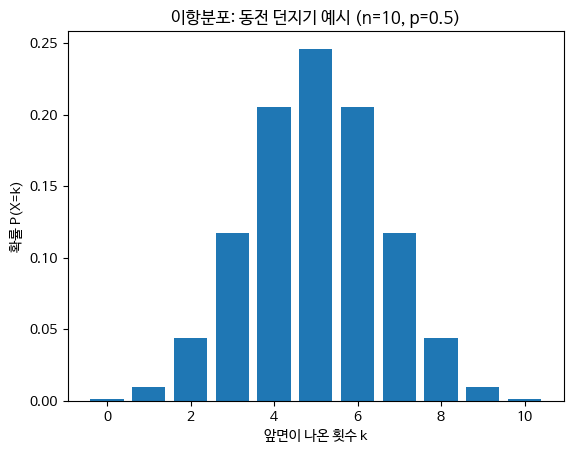

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

# 3. matplotlib에 폰트 설정
# mpl.font_manager._rebuild()  # _rebuild is not a public API, try using findSystemFonts instead.
import matplotlib.font_manager as fm  # font_manager 모듈을 fm으로 import
fm.findSystemFonts(fontpaths=None, fontext='ttf') # 시스템 폰트 검색 및 폰트 캐시 재구축
plt.rc('font', family='NanumBarunGothic')
#### ----------------------------------------------------------------

# 이항분포 설정
n = 10  # 동전을 던지는 횟수
p = 0.5  # 앞면이 나올 확률 (동전 던지기에서는 0.5)

# 이항분포에서 k의 범위 설정 (0부터 n까지)
k_values = np.arange(0, n+1)

# 이항분포의 확률질량함수(PMF) 계산
binom_pmf = binom.pmf(k_values, n, p)

# 결과 출력 및 시각화
print("이항분포 결과:", binom_pmf)

plt.bar(k_values, binom_pmf)
plt.xlabel("앞면이 나온 횟수 k")
plt.ylabel("확률 P(X=k)")
plt.title("이항분포: 동전 던지기 예시 (n=10, p=0.5)")
plt.show()

코랩에서 한글이 나오게 하려면 matplotlib에 한글 폰트를 설정해야 합니다. 코랩 환경은 Linux 기반이므로, Windows에서 사용하는 폰트와는 호환되지 않습니다. 따라서 코랩에서 한글을 표시하려면 나눔 폰트와 같은 한글 폰트를 설치하고 matplotlib에 적용해야 합니다.

In [ ]:
# 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작 (필수)

# 3. matplotlib에 폰트 설정
mpl.font_manager._rebuild()
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

이 키보드 너무 좋다.. 이제야 편하게 타이핑 되는구나.. 이거면 된다.
       

| 제목1 | 제목2 | 제목3 |
|---|---|---|
| 단순선형회귀 | 몸무게.키 자료로 몸무게 예측 | 내용3 |
| 다중선형회귀 | 침실수.지하철거리.층수,평수 --> 임대료 예측 | LinearRegression 는 회계계수 파악불가 --> From statsmodels.formula.api import ols 추천 |
| 로지스틱회위(분류) | 내용2 | 내용3 |
| 이항분포 | 동전던지기  10번 던져서 앞면이 3번 나올 확률 | binom.pmk(k,N, 확률P), 이때. from scipy.stats import binom |
| 베르누이분포 | 동전던지기 1번 던져서 앞면이 나올 확률 | 일반상식의 비율을 의미함 |

In [ ]:
제목   |    내용   | 비고

3. Coursera Lite 및 Coursera Plus
일반 환불
Coursera Plus 구독 결제에 대한 전액 환불을 받으려면 결제일로부터 14일 이내에 Learner Help Center 를 통해 환불 요청을 제출하세요. 이 14일 기간 이후에 요청하면 환불이 제공되지 않습니다.

환불 자격
원래 결제일로부터 2주 이내에 환불을 요청할 수 있습니다. 내 구매 페이지 의 환불 마감일 열 에서 환불 자격이 있는지 확인할 수 있습니다 .

다음과 같은 경우 환불을 받을 수 없습니다.

원래 결제일로부터 2주(14일)가 지났습니다.
귀하는 이미 자격증을 취득하셨습니다(수강료 결제용)
맨 위로 돌아가기

In [ ]:
환불을 요청하는 경우
환불 요청을 받으면 확인 이메일을 받게 됩니다. 또한 코스에서 등록이 취소됩니다.
코스의 무료 버전을 계속하려면 다시 등록해야 합니다.
환불 요청 후 자금이 귀하의 계좌로 반환되는 데 최대 7-10 영업일이 걸릴 수 있습니다.
 10 영업일이 넘은 경우 저희에게 연락하여 도움을 요청하세요.


# ---------------------------------------------------

# 김태헌 교재 -------------------------

## 일원 분산분석 (P.356)

* 주어진 데이터는 4종류의 비료를 사용한 식물성장에 대한 실험결과이다.
* 이 실험에서 비슷한 조건의 40개를 무작위로 10개씩 분리하여, 화학비료 A,B,C,D를 일정기간 사용 후 성장길이를 측정했다.
* 비료에 따른 성장의 차이가 있는지 검정하시오.(식물종류는 무시된다)
* 귀무가설 : 네 가지 비료의 효과는 동일하다. 차이없다.
* 근데... 어떤 비료가 제일 효과가 좋은지도 파악해야하는거 아닌가?


In [ ]:
# 구글 제미나이가 제공한 코딩
import pandas as pd  # 주어진 데데이터는
import statsmodels.formula.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming your data is in a DataFrame called 'df' with columns '비료' and '성장길이'

# 1. Perform ANOVA
model = sm.ols('성장길이 ~ 비료', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 2.  If ANOVA shows significant difference, perform Tukey's HSD post-hoc test
if anova_table['PR(>F)'][0] < 0.05:  # Check if p-value is less than significance level (0.05)
    print("\n비료에 따른 성장 차이가 유의미합니다.")
    # Perform Tukey's HSD post-hoc test
    m_comp = pairwise_tukeyhsd(df['성장길이'], df['비료'], alpha=0.05)
    print(m_comp)

    # 3. Find the most effective fertilizer
    # Get the group with the highest mean growth
    best_fertilizer = df.groupby('비료')['성장길이'].mean().idxmax()
    print(f"\n가장 효과적인 비료: {best_fertilizer}")
else:
    print("\n비료에 따른 성장 차이가 유의미하지 않습니다.")

비료 효과 분석 및 최적 비료 찾기 코드 설명 (한글)
이 코드는 주어진 데이터를 사용하여 비료 종류에 따른 식물 성장의 차이를 검정하고, 가장 효과적인 비료를 찾는 데 사용됩니다.

1. 필요한 라이브러리 import:

pandas: 데이터를 다루기 위한 라이브러리입니다.
statsmodels.formula.api: ANOVA (분산 분석)을 수행하기 위한 라이브러리입니다.
statsmodels.stats.multicomp: Tukey's HSD 사후 검정을 수행하기 위한 라이브러리입니다.
2. ANOVA (분산 분석) 수행:

model = sm.ols('성장길이 ~ 비료', data=df).fit():
식물의 '성장길이'를 '비료' 종류에 따라 예측하는 OLS (Ordinary Least Squares) 모델을 생성합니다.
데이터 프레임 df에서 '성장길이' 열은 종속 변수, '비료' 열은 독립 변수로 사용됩니다.
anova_table = sm.stats.anova_lm(model, typ=2): 생성된 모델을 사용하여 ANOVA를 수행하고 결과를 anova_table에 저장합니다.
print(anova_table): ANOVA 결과를 표 형태로 출력합니다. 이 표에는 F-통계량, p-값 등이 포함되어 비료 종류에 따른 성장 차이가 유의미한지 판단하는 데 사용됩니다.
3. 유의성 검정 및 사후 검정:

if anova_table['PR(>F)'][0] < 0.05::
ANOVA 결과에서 p-값이 0.05보다 작은지 확인합니다.
p-값이 0.05보다 작으면 비료 종류에 따른 성장 차이가 통계적으로 유의미하다는 것을 의미합니다.
m_comp = pairwise_tukeyhsd(df['성장길이'], df['비료'], alpha=0.05):
ANOVA에서 유의미한 차이가 발견되면, Tukey's HSD 사후 검정을 수행합니다.
이 검정은 모든 비료 쌍을 비교하여 어떤 쌍에서 유의미한 차이가 있는지 확인합니다.
print(m_comp): Tukey's HSD 검정 결과를 출력합니다.
4. 가장 효과적인 비료 찾기:

best_fertilizer = df.groupby('비료')['성장길이'].mean().idxmax():
각 비료 종류별로 평균 성장 길이를 계산합니다.
idxmax() 함수를 사용하여 평균 성장 길이가 가장 큰 비료 종류를 찾고 best_fertilizer 변수에 저장합니다.
print(f"\n가장 효과적인 비료: {best_fertilizer}"): 가장 효과적인 비료 종류를 출력합니다.
5. 유의미한 차이가 없는 경우:

else: print("\n비료에 따른 성장 차이가 유의미하지 않습니다."):
ANOVA에서 p-값이 0.05보다 크면, 비료 종류에 따른 성장 차이가 통계적으로 유의미하지 않다는 메시지를 출력합니다.
요약:

이 코드는 ANOVA를 사용하여 비료 종류에 따른 식물 성장의 차이를 검정하고, Tukey's HSD 사후 검정을 통해 어떤 비료 쌍에서 유의미한 차이가 있는지 확인합니다. 또한, 각 비료 종류별 평균 성장 길이를 계산하여 가장 효과적인 비료를 찾아줍니다.

In [ ]:
import pandas as pd
df = pd.DataFrame({
                    'A비료': [10.5, 11.3, 10.8, 9.6, 11.1, 10.2, 10.9, 11.4, 10.5, 10.3],
                    'B비료': [11.9, 12.4, 12.1, 13.2, 12.5, 11.8, 12.2, 12.9, 12.4, 12.3],
                    'C비료': [11.2, 11.7, 11.6, 10.9, 11.3, 11.1, 10.8, 11.5, 11.4, 11.0],
                    'D비료': [9.8, 9.4, 9.1, 9.5, 9.6, 9.9, 9.2, 9.7, 9.3, 9.4]
                  })
df.head(10)
 # 비료 종류별 성장길이 데이터 입니다. 4종류이므로 분산분석갑니다.
 # 분산분석은 정규성(정합성), 등분산 검증 필수입니다.

,A비료,B비료,C비료,D비료
0,10.5,11.9,11.2,9.8
1,11.3,12.4,11.7,9.4
2,10.8,12.1,11.6,9.1
3,9.6,13.2,10.9,9.5
4,11.1,12.5,11.3,9.6
5,10.2,11.8,11.1,9.9
6,10.9,12.2,10.8,9.2
7,11.4,12.9,11.5,9.7
8,10.5,12.4,11.4,9.3
9,10.3,12.3,11.0,9.4


In [ ]:
# 정규성(샤피로 윌크 검정), 등분산성 검증(레빈) 등분산성 검증
# 소수점 정리합니다. 4자리정도까지  (이건 안 먹는구나... 통계치에서는)
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)   # 넘파이.셋_프린트옵션즈 (정밀도=4)

from scipy import stats

print("=== 정규성 검정 ===")  # 정규성 검정은 각 칼럼별로 다 해야하는구나....
print(stats.shapiro(df['A비료']))
print(stats.shapiro(df['B비료']))
print(stats.shapiro(df['C비료']))
print(stats.shapiro(df['D비료']))

### abcd 모든 P값이 0.84로 엄청높다. 따라서 정규분포라는 귀무가설은 그대로 유지되고. 기각불가하다.

print("\n === 등분산 검정 ===")      # \n - 줄바꿈을 의미합니다. 영어에서는 역슬래시가 된다.
print(stats.levene(df['A비료'], df['B비료'], df['C비료'], df['D비료']))

### 등분산검정 P값이 0.14로 엄청높다. 따라서 비료끼리는 등분산이다. 라는 귀무가설은 그대로 유지되고. 기각불가하다.

print("\n === 일원 분산 분석 ===")

stats.f_oneway( df['A비료'], df['B비료'], df['C비료'], df['D비료'] )

# 아노바 분산분석결과의 P값 - 0.05보다 엄청 작다... 따라서 성장길이에 비료효과에 차이가 없다는 귀무가설 기각된다.
# pvalue=1.001838152252373e-16)
#지수표기법 전화하면,
format(1.001838152252373e-16, ".25f")

=== 정규성 검정 ===
ShapiroResult(statistic=0.9649054066073813, pvalue=0.8400161543468654)
ShapiroResult(statistic=0.9468040874196029, pvalue=0.6308700692815115)
ShapiroResult(statistic=0.9701646110856055, pvalue=0.892367306190296)
ShapiroResult(statistic=0.9752339025839644, pvalue=0.9346854448707653)

 === 등분산 검정 ===
LeveneResult(statistic=1.9355354288758708, pvalue=0.14127835331346628)

 === 일원 분산 분석 ===


'0.0000000000000001001838152'

⏰⏰⏰ 일원 분산분석(OLS 활용)  ⏰

inplace 인자: .rename() 메서드를 사용할 때, 기존 DataFrame을 직접 수정하려면 inplace=True 인자를 지정해야 합니다. 그렇지 않으면 변경된 내용이 적용된 새로운 DataFrame이 반환됩니다.

df.rename(columns={'성장': '성장길이'})  # 새로운 DataFrame 신규생성

df.rename(columns={'성장': '성장길이'}, inplace=True)  # 기존 DataFrame 수정

In [ ]:
import pandas as pd
# df = pd.read_csv("fertilizer.csv")
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part3/ch2/fertilizer.csv")

df.rename(columns={'성장': '성장길이'}, inplace=True)
df.head(10)
df.hist()

In [ ]:
from statsmodels.formula.api import ols    # 왜 다중선형회귀 모델을 불러와서 분산을 분석하는구나..
from statsmodels.stats.anova import anova_lm
model = ols('성장길이 ~ C(비료)', df).fit()   # statsmodels의 OLS는 문자형 변수를 자동으로 숫자로 인코딩합니다. (더미 변수로)
print(anova_lm(model))

            df    sum_sq    mean_sq          F        PR(>F)
C(비료)      3.0  43.21875  14.406250  89.126139  1.001838e-16
Residual  36.0   5.81900   0.161639        NaN           NaN


## 이원 분산분석

In [ ]:
import pandas as pd
# df = pd.read_csv("tree.csv")
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part3/ch2/tree.csv")
print(df.sample(10))

    나무  비료        성장률
119  D   3  78.519330
115  D   3  74.015473
2    A   1  56.476885
52   B   3  54.230780
96   D   1  67.961203
38   B   1  41.718140
47   B   2  68.571222
31   B   1  73.522782
82   C   3  80.778940
40   B   2  65.384666


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = '성장률 ~ 나무 + 비료 + 나무:비료'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df       sum_sq      mean_sq          F        PR(>F)
나무          3.0  4783.353938  1594.451313  18.391274  9.016693e-10
비료          1.0   873.322002   873.322002  10.073374  1.942421e-03
나무:비료       3.0   394.801585   131.600528   1.517952  2.137666e-01
Residual  112.0  9709.960792    86.696078        NaN           NaN


*⚓⚓⚓ statsmodels의 OLS는 문자형 변수를 자동으로 숫자로 인코딩합니다. ⚓*

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = '성장률 ~ C(나무) + C(비료) + C(나무):C(비료)' # 문자열인 나무 칼럼은 C(나무)로 안해도 자동으로 인코딩함
model = ols(formula, data=df).fit()           # 범주형은 C로 감싸는 것을 추천.(더 잘나옴 수치형 숫자가 아닌 범주형 숫자)
anova_table = sm.stats.anova_lm(model)
print(anova_table)
anova_table
### 비료를 숫자로 인식하고 있는 것 같다. C(비료)로 해서 숫자이지만 범주형숫자로 제대로 인식하게 해라.


                df       sum_sq      mean_sq          F        PR(>F)
C(나무)          3.0  4783.353938  1594.451313  18.855528  6.600012e-10
C(비료)          2.0  1127.924259   563.962129   6.669256  1.857612e-03
C(나무):C(비료)    6.0   717.520672   119.586779   1.414199  2.157357e-01
Residual     108.0  9132.639448    84.561476        NaN           NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(나무),3.0,4783.353938,1594.451313,18.855528,6.600012e-10
C(비료),2.0,1127.924259,563.962129,6.669256,1.857612e-03
C(나무):C(비료),6.0,717.520672,119.586779,1.414199,2.157357e-01
Residual,108.0,9132.639448,84.561476,NaN,NaN


In [ ]:
# ■ 결 론
# 1. 나무종류에 대한 효과 : P값 - 유의수준 0.05보다 작으므로(귀무가설 기각됨), 나무종류에 따른 차이가 매우 크다고 할 수 있음.
# 2. 비료종류에 대한 효과 : P값 - 유의수준 0.05보다 작으므로(귀무가설 기각됨), 나무종류에 따른 차이가 매우 크다고 할 수 있음.
# 3. 나무.비료 상호작용에 대한 효과 : P값 - 유의수준 0.05보다 크다(귀무가설 유지), 상호작용은 의미없다고 할 수 있다.

⏰⏰⏰지수표기법  --> 고정소수점 표기법으로 바꾼다. ⏰

In [ ]:
print(format(6.600012e-10, '.11f'))
print(format(1.857612e-03, '.11f'))
print(format(2.157357e-01, '.11f'))

# -------------------------------
format(1.857612e-03, '.11f')

0.00000000066
0.00185761200
0.21573570000


'0.00185761200'

In [ ]:
model = ols('성장률 ~ C(나무) * C(비료)', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                df       sum_sq      mean_sq          F        PR(>F)
C(나무)          3.0  4783.353938  1594.451313  18.855528  6.600012e-10
C(비료)          2.0  1127.924259   563.962129   6.669256  1.857612e-03
C(나무):C(비료)    6.0   717.520672   119.586779   1.414199  2.157357e-01
Residual     108.0  9132.639448    84.561476        NaN           NaN


# 데이터마님 연습문제


https://www.datamanim.com/dataset/03_dataq/typethree.html